# Capstone Project

## About the Dataset(Forest Cover type prediction)

**Business_context:**The study area includes four wilderness areas located in the Roosevelt National Forest of northern Colorado. Each observation is a 30m x 30m patch. You are asked to predict an integer classification for the forest cover type. The seven types are:

1 - Spruce/Fir

2 - Lodgepole Pine

3 - Ponderosa Pine

4 - Cottonwood/Willow

5 - Aspen

6 - Douglas-fir

7 - Krummholz

## Data Description

**Elevation** - Elevation in meters

**Aspect** - Aspect in degrees azimuth

**Slope** - Slope in degrees

**Horizontal_Distance_To_Hydrology** - Horz Dist to nearest surface water features

**Vertical_Distance_To_Hydrology** - Vert Dist to nearest surface water features

**Horizontal_Distance_To_Roadways** - Horz Dist to nearest roadway

**Hillshade_9am (0 to 255 index)** - Hillshade index at 9am, summer solstice

**Hillshade_Noon (0 to 255 index)** - Hillshade index at noon, summer solstice

**Hillshade_3pm (0 to 255 index)** - Hillshade index at 3pm, summer solstice

**Horizontal_Distance_To_Fire_Points** - Horz Dist to nearest wildfire ignition points

**Wilderness_Area (4 binary columns, 0 = absence or 1 = presence)** - Wilderness area designation

**Soil_Type (40 binary columns, 0 = absence or 1 = presence)** - Soil Type designation

**Cover_Type (7 types, integers 1 to 7)** - Forest Cover Type designation

**The wilderness areas are:**

1 - Rawah Wilderness Area

2 - Neota Wilderness Area

3 - Comanche Peak Wilderness Area

4 - Cache la Poudre Wilderness Area

**The soil types are:**

1 Cathedral family - Rock outcrop complex, extremely stony.

2 Vanet - Ratake families complex, very stony.

3 Haploborolis - Rock outcrop complex, rubbly.

4 Ratake family - Rock outcrop complex, rubbly.

5 Vanet family - Rock outcrop complex complex, rubbly.

6 Vanet - Wetmore families - Rock outcrop complex, stony.

7 Gothic family.

8 Supervisor - Limber families complex.

9 Troutville family, very stony.

10 Bullwark - Catamount families - Rock outcrop complex, rubbly.

11 Bullwark - Catamount families - Rock land complex, rubbly.

12 Legault family - Rock land complex, stony.

13 Catamount family - Rock land - Bullwark family complex, rubbly.

14 Pachic Argiborolis - Aquolis complex.

15 unspecified in the USFS Soil and ELU Survey.

16 Cryaquolis - Cryoborolis complex.

17 Gateview family - Cryaquolis complex.

18 Rogert family, very stony.

19 Typic Cryaquolis - Borohemists complex.

20 Typic Cryaquepts - Typic Cryaquolls complex.

21 Typic Cryaquolls - Leighcan family, till substratum complex.

22 Leighcan family, till substratum, extremely bouldery.

23 Leighcan family, till substratum - Typic Cryaquolls complex.

24 Leighcan family, extremely stony.

25 Leighcan family, warm, extremely stony.

26 Granile - Catamount families complex, very stony.

27 Leighcan family, warm - Rock outcrop complex, extremely stony.

28 Leighcan family - Rock outcrop complex, extremely stony.

29 Como - Legault families complex, extremely stony.

30 Como family - Rock land - Legault family complex, extremely stony.

31 Leighcan - Catamount families complex, extremely stony.

32 Catamount family - Rock outcrop - Leighcan family complex, extremely stony.

33 Leighcan - Catamount families - Rock outcrop complex, extremely stony.

34 Cryorthents - Rock land complex, extremely stony.

35 Cryumbrepts - Rock outcrop - Cryaquepts complex.

36 Bross family - Rock land - Cryumbrepts complex, extremely stony.

37 Rock outcrop - Cryumbrepts - Cryorthents complex, extremely stony.

38 Leighcan - Moran families - Cryaquolls complex, extremely stony.

39 Moran family - Cryorthents - Leighcan family complex, extremely stony.

40 Moran family - Cryorthents - Rock land complex, extremely stony.

### Import Libraries

In [425]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore') 
plt.rcParams['figure.figsize']=[15,8]
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier,BaggingClassifier, AdaBoostClassifier, GradientBoostingClassifier,StackingClassifier,VotingClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split,GridSearchCV,KFold,cross_val_score
from sklearn.preprocessing import StandardScaler,MinMaxScaler
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix,roc_auc_score,roc_curve, precision_score, recall_score, f1_score, cohen_kappa_score

#### Import the dataset

In [2]:
df_ctype = pd.read_csv('covtype.data')
df_ctype.head()

2596   51   3  258    0   510  221  232  148  6279  ...  0.34  0.35  0.36  \
0  2590   56   2  212   -6   390  220  235  151  6225  ...     0     0     0   
1  2804  139   9  268   65  3180  234  238  135  6121  ...     0     0     0   
2  2785  155  18  242  118  3090  238  238  122  6211  ...     0     0     0   
3  2595   45   2  153   -1   391  220  234  150  6172  ...     0     0     0   
4  2579  132   6  300  -15    67  230  237  140  6031  ...     0     0     0   

   0.37  0.38  0.39  0.40  0.41  0.42  5  
0     0     0     0     0     0     0  5  
1     0     0     0     0     0     0  2  
2     0     0     0     0     0     0  2  
3     0     0     0     0     0     0  5  
4     0     0     0     0     0     0  2  

[5 rows x 55 columns]

In [3]:
feature_names = ['Elevation', 'Aspect', 'Slope', 'Horizontal_Distance_To_Hydrology', 'Vertical_Distance_To_Hydrology', 'Horizontal_Distance_To_Roadways', 
                 'Hillshade_9am', 'Hillshade_Noon', 'Hillshade_3pm', 'Horizontal_Distance_To_Fire_Points', 'Wilderness_Area1', 'Wilderness_Area2', 
                'Wilderness_Area3', 'Wilderness_Area4', 'Soil_Type1', 'Soil_Type2', 'Soil_Type3', 'Soil_Type4', 'Soil_Type5', 'Soil_Type6', 'Soil_Type7',
                'Soil_Type8', 'Soil_Type9', 'Soil_Type10', 'Soil_Type11', 'Soil_Type12', 'Soil_Type13', 'Soil_Type14', 'Soil_Type15', 'Soil_Type16', 
                 'Soil_Type17', 'Soil_Type18', 'Soil_Type19', 'Soil_Type20', 'Soil_Type21', 'Soil_Type22', 'Soil_Type23', 'Soil_Type24', 'Soil_Type25', 
                 'Soil_Type26', 'Soil_Type27', 'Soil_Type28', 'Soil_Type29', 'Soil_Type30', 'Soil_Type31', 'Soil_Type32', 'Soil_Type33', 'Soil_Type34', 
                 'Soil_Type35', 'Soil_Type36', 'Soil_Type37', 'Soil_Type38', 'Soil_Type39', 'Soil_Type40', 'Cover_Type']

These Feature names are obtained from Kaggle.

In [4]:
df_ctype.columns = feature_names

In [5]:
# Printing first observations
df_ctype.head()

Elevation  Aspect  Slope  Horizontal_Distance_To_Hydrology  \
0       2590      56      2                               212   
1       2804     139      9                               268   
2       2785     155     18                               242   
3       2595      45      2                               153   
4       2579     132      6                               300   

   Vertical_Distance_To_Hydrology  Horizontal_Distance_To_Roadways  \
0                              -6                              390   
1                              65                             3180   
2                             118                             3090   
3                              -1                              391   
4                             -15                               67   

   Hillshade_9am  Hillshade_Noon  Hillshade_3pm  \
0            220             235            151   
1            234             238            135   
2            238             238            122   
3            220             234            150   
4            230             237            140   

   Horizontal_Distance_To_Fire_Points  ...  Soil_Type32  Soil_Type33  \
0                                6225  ...            0            0   
1                                6121  ...            0            0   
2                                6211  ...            0            0   
3                                6172  ...            0            0   
4                                6031  ...            0            0   

   Soil_Type34  Soil_Type35  Soil_Type36  Soil_Type37  Soil_Type38  \
0            0            0            0            0            0   
1            0            0            0            0            0   
2            0            0            0            0            0   
3            0            0            0            0            0   
4            0            0            0            0            0   

   Soil_Type39  Soil_Type40  Cover_Type  
0            0            0           5  
1            0            0           2  
2            0            0           2  
3            0            0           5  
4            0            0           2  

[5 rows x 55 columns]

### Info of the data

In [6]:
#Lets Check the info.
df_ctype.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 581011 entries, 0 to 581010
Data columns (total 55 columns):
 #   Column                              Non-Null Count   Dtype
---  ------                              --------------   -----
 0   Elevation                           581011 non-null  int64
 1   Aspect                              581011 non-null  int64
 2   Slope                               581011 non-null  int64
 3   Horizontal_Distance_To_Hydrology    581011 non-null  int64
 4   Vertical_Distance_To_Hydrology      581011 non-null  int64
 5   Horizontal_Distance_To_Roadways     581011 non-null  int64
 6   Hillshade_9am                       581011 non-null  int64
 7   Hillshade_Noon                      581011 non-null  int64
 8   Hillshade_3pm                       581011 non-null  int64
 9   Horizontal_Distance_To_Fire_Points  581011 non-null  int64
 10  Wilderness_Area1                    581011 non-null  int64
 11  Wilderness_Area2                    581011 non-null 

In [7]:
# Lets check the shape of the data
df_ctype.shape

(581011, 55)

**Interpretation:** We have 581011 observations and 55 features.

### Datatypes

In [8]:
# Lets check the Datatypes
df_ctype.dtypes

Elevation                             int64
Aspect                                int64
Slope                                 int64
Horizontal_Distance_To_Hydrology      int64
Vertical_Distance_To_Hydrology        int64
Horizontal_Distance_To_Roadways       int64
Hillshade_9am                         int64
Hillshade_Noon                        int64
Hillshade_3pm                         int64
Horizontal_Distance_To_Fire_Points    int64
Wilderness_Area1                      int64
Wilderness_Area2                      int64
Wilderness_Area3                      int64
Wilderness_Area4                      int64
Soil_Type1                            int64
Soil_Type2                            int64
Soil_Type3                            int64
Soil_Type4                            int64
Soil_Type5                            int64
Soil_Type6                            int64
Soil_Type7                            int64
Soil_Type8                            int64
Soil_Type9                      

**Interpretation:** Our dataset has 54 features and 1 target variable 'Cover_Type'. From 54 features, 10 are numeric and 44 are catrgorical. From 44 categorical, 40 are of Soil_Type and 4 of Wilderness_Area.

Here, the categorical variable we have here is 2. And these alone have 44 features. But an observation can only have presence of any 2 feature from 44, 1 for Soil and 1 for Wilderness. So if an observation has '1' in Wilderness_Area4 and '1' in Soil_Type12, it means that it's respective Soil and Wilderness is present, while all other 42 features will have '0' hence its absence. And this is what a categorical feature means. And also these are one-hot encoded for us.

Talking about numeric features, Aspect and Slope have measurement in degrees while 3 Hillshade.. features have values range from 0 to 255 index, describing summer solstice. Remaining 5 out of 10 numeric features have measurement in Meters.

## Summary Statistics

### Numerical data

In [9]:
#Lets describe the numeric and categorical data separetely.
df_ctype_num = df_ctype.iloc[:, 0:10]
df_ctype_num.describe()

Elevation         Aspect          Slope  \
count  581011.000000  581011.000000  581011.000000   
mean     2959.365926     155.656988      14.103723   
std       279.984569     111.913733       7.488234   
min      1859.000000       0.000000       0.000000   
25%      2809.000000      58.000000       9.000000   
50%      2996.000000     127.000000      13.000000   
75%      3163.000000     260.000000      18.000000   
max      3858.000000     360.000000      66.000000   

       Horizontal_Distance_To_Hydrology  Vertical_Distance_To_Hydrology  \
count                     581011.000000                   581011.000000   
mean                         269.428236                       46.418935   
std                          212.549538                       58.295250   
min                            0.000000                     -173.000000   
25%                          108.000000                        7.000000   
50%                          218.000000                       30.000000   
75%                          384.000000                       69.000000   
max                         1397.000000                      601.000000   

       Horizontal_Distance_To_Roadways  Hillshade_9am  Hillshade_Noon  \
count                    581011.000000  581011.000000   581011.000000   
mean                       2350.149779     212.146033      223.318701   
std                        1559.254343      26.769909       19.768711   
min                           0.000000       0.000000        0.000000   
25%                        1106.000000     198.000000      213.000000   
50%                        1997.000000     218.000000      226.000000   
75%                        3328.000000     231.000000      237.000000   
max                        7117.000000     254.000000      254.000000   

       Hillshade_3pm  Horizontal_Distance_To_Fire_Points  
count  581011.000000                       581011.000000  
mean      142.528253                         1980.283828  
std        38.274561                         1324.184340  
min         0.000000                            0.000000  
25%       119.000000                         1024.000000  
50%       143.000000                         1710.000000  
75%       168.000000                         2550.000000  
max       254.000000                         7173.000000

**Interpretation:** Mean of the feature vary from as low as 14 to as high as 2959. Different features taking on different ranges of values.

Standard deviation tells us how spread the data is from the mean, here we can see Horizontal_Distance_To_Roadways is the most spread out data followed by Horizontal_Distance_To_Fire_Points and Elevation. The most densed and near to mean is Slope followed by all 3 features of Hillshade.

All the features have minimum value of 0 except Elevation and Vertical_Distance_To_Hydrology features. Where Elevation has the highest minimum value and Vertical_Distance_To_Hydrology has the lowest, being negative.

We will document and visualize in detail later for each feature of how spread or dense the data value is between min-25%, 25%-50%, 50%-75% and 75%--max. These are called the percentile. 25% percentile denotes first quaritle, 50% percentile is the median and 75% percentile is the third quartile.

Hillshades features have similar maximum value of 254 while Horizontal_Distance_To_Fire_Points has the highest followed by Horizontal_Distance_To_Roadways feature and they also have the highest ranges of all features. Slope having lowest maximum value and also being lowest in range followed by Apsect feature.

### Categorical data

In [10]:
df_ctype_cat = df_ctype.iloc[:, 10:]
df_ctype_cat.describe()

Wilderness_Area1  Wilderness_Area2  Wilderness_Area3  Wilderness_Area4  \
count     581011.000000     581011.000000     581011.000000     581011.000000   
mean           0.448864          0.051434          0.436074          0.063627   
std            0.497379          0.220882          0.495897          0.244088   
min            0.000000          0.000000          0.000000          0.000000   
25%            0.000000          0.000000          0.000000          0.000000   
50%            0.000000          0.000000          0.000000          0.000000   
75%            1.000000          0.000000          1.000000          0.000000   
max            1.000000          1.000000          1.000000          1.000000   

          Soil_Type1     Soil_Type2     Soil_Type3     Soil_Type4  \
count  581011.000000  581011.000000  581011.000000  581011.000000   
mean        0.005217       0.012952       0.008301       0.021335   
std         0.072039       0.113066       0.090731       0.144499   
min         0.000000       0.000000       0.000000       0.000000   
25%         0.000000       0.000000       0.000000       0.000000   
50%         0.000000       0.000000       0.000000       0.000000   
75%         0.000000       0.000000       0.000000       0.000000   
max         1.000000       1.000000       1.000000       1.000000   

          Soil_Type5     Soil_Type6  ...    Soil_Type32    Soil_Type33  \
count  581011.000000  581011.000000  ...  581011.000000  581011.000000   
mean        0.002749       0.011316  ...       0.090392       0.077716   
std         0.052356       0.105775  ...       0.286743       0.267725   
min         0.000000       0.000000  ...       0.000000       0.000000   
25%         0.000000       0.000000  ...       0.000000       0.000000   
50%         0.000000       0.000000  ...       0.000000       0.000000   
75%         0.000000       0.000000  ...       0.000000       0.000000   
max         1.000000       1.000000  ...       1.000000       1.000000   

         Soil_Type34    Soil_Type35    Soil_Type36    Soil_Type37  \
count  581011.000000  581011.000000  581011.000000  581011.000000   
mean        0.002773       0.003255       0.000205       0.000513   
std         0.052584       0.056957       0.014310       0.022641   
min         0.000000       0.000000       0.000000       0.000000   
25%         0.000000       0.000000       0.000000       0.000000   
50%         0.000000       0.000000       0.000000       0.000000   
75%         0.000000       0.000000       0.000000       0.000000   
max         1.000000       1.000000       1.000000       1.000000   

         Soil_Type38    Soil_Type39    Soil_Type40     Cover_Type  
count  581011.000000  581011.000000  581011.000000  581011.000000  
mean        0.026803       0.023762       0.015060       2.051465  
std         0.161508       0.152307       0.121792       1.396500  
min         0.000000       0.000000       0.000000       1.000000  
25%         0.000000       0.000000       0.000000       1.000000  
50%         0.000000       0.000000       0.000000       2.000000  
75%         0.000000       0.000000       0.000000       2.000000  
max         1.000000       1.000000       1.000000       7.000000  

[8 rows x 45 columns]

**Interpretation:** Since here all the values can only be either 0 and 1. The mean can tell us useful information here. Wilderness_Area1 has the highest mean followed by Wilderness_Area3, this means that Wilderness_Area1 has the most presence in the data compared to other Wilderness Areas. In other words, most observation have features either Wilderness_Area1 or Wilderness_Area3. The least amount of observation will be seen from Wilderness_Area2. We will visualize this and Soil_Type features later for better understanding these data.

One more thing to notice here is that when we add all the mean of Wildernesss_Areas 0.448864 + 0.051434 + 0.436074 + 0.063627 we get result 0.999999 which is approximately 1. This actually makes sense because all the observations can be from any one Wilderness area. Crosschecking, I have also programmed to check whether any obsevation has 2 Wilderness Area and Soil type presence at the same time or None for assurance that our data is in appropriate form in Observation Cleaning section.

Hence if we look at this in the probability perspective we can say that, the next observation that we get has 44.8% probability that its been taken from Wilderness_Area1, 43.6% probability that it's taken from Wilderness_Area3 and so on for others.

## Missing Values

In [11]:
# Checking missing values
Total = df_ctype.isnull().sum().sort_values(ascending=False)          
Percent = (df_ctype.isnull().sum()*100/df_ctype.isnull().count()).sort_values(ascending=False) 
missing_data = pd.concat([Total, Percent], axis = 1, keys = ['Total', 'Percentage of Missing Values'])    
missing_data

Total  Percentage of Missing Values
Elevation                               0                           0.0
Soil_Type28                             0                           0.0
Soil_Type17                             0                           0.0
Soil_Type18                             0                           0.0
Soil_Type19                             0                           0.0
Soil_Type20                             0                           0.0
Soil_Type21                             0                           0.0
Soil_Type22                             0                           0.0
Soil_Type23                             0                           0.0
Soil_Type24                             0                           0.0
Soil_Type25                             0                           0.0
Soil_Type26                             0                           0.0
Soil_Type27                             0                           0.0
Soil_Type29                             0                           0.0
Soil_Type15                             0                           0.0
Soil_Type30                             0                           0.0
Soil_Type31                             0                           0.0
Soil_Type32                             0                           0.0
Soil_Type33                             0                           0.0
Soil_Type34                             0                           0.0
Soil_Type35                             0                           0.0
Soil_Type36                             0                           0.0
Soil_Type37                             0                           0.0
Soil_Type38                             0                           0.0
Soil_Type39                             0                           0.0
Soil_Type40                             0                           0.0
Soil_Type16                             0                           0.0
Soil_Type14                             0                           0.0
Aspect                                  0                           0.0
Wilderness_Area4                        0                           0.0
Slope                                   0                           0.0
Horizontal_Distance_To_Hydrology        0                           0.0
Vertical_Distance_To_Hydrology          0                           0.0
Horizontal_Distance_To_Roadways         0                           0.0
Hillshade_9am                           0                           0.0
Hillshade_Noon                          0                           0.0
Hillshade_3pm                           0                           0.0
Horizontal_Distance_To_Fire_Points      0                           0.0
Wilderness_Area1                        0                           0.0
Wilderness_Area2                        0                           0.0
Wilderness_Area3                        0                           0.0
Soil_Type1                              0                           0.0
Soil_Type13                             0                           0.0
Soil_Type2                              0                           0.0
Soil_Type3                              0                           0.0
Soil_Type4                              0                           0.0
Soil_Type5                              0                           0.0
Soil_Type6                              0                           0.0
Soil_Type7                              0                           0.0
Soil_Type8                              0                           0.0
Soil_Type9                              0                           0.0
Soil_Type10                             0                           0.0
Soil_Type11                             0                           0.0
Soil_Type12                             0                           0.0
Cover_Type                              0                           0.0

**Interpretation:** We can see that there are no missing values in the dataset. We can also visualize this using a heatmap.

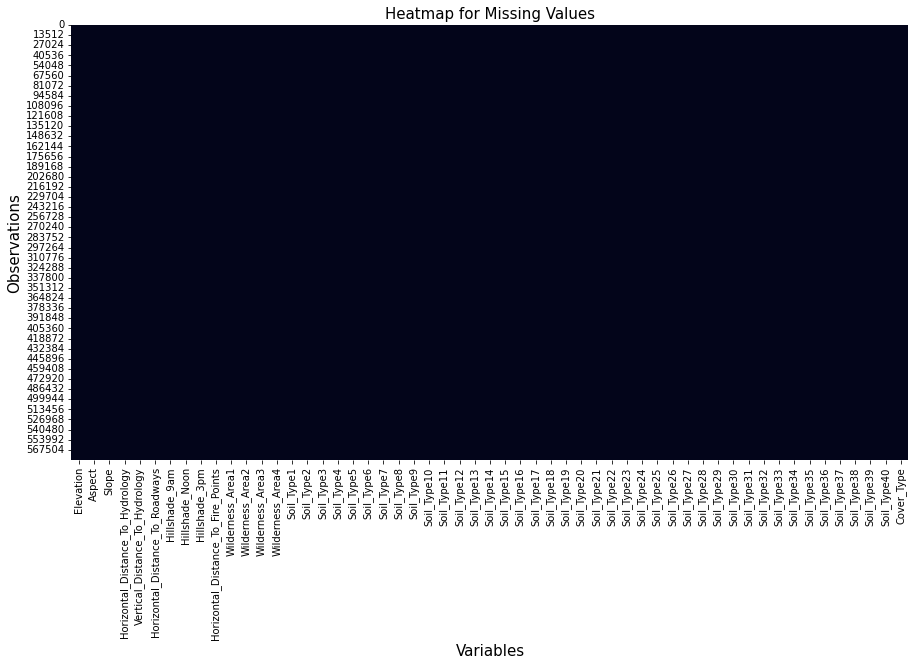

In [12]:
sns.heatmap(df_ctype.isnull(), cbar=False)
plt.title('Heatmap for Missing Values', fontsize = 15)
plt.xlabel('Variables', fontsize = 15)
plt.ylabel('Observations', fontsize = 15)
plt.show()

### Duplicates

In [13]:
# Checking duplicate values
print('Number of duplicates present in the data: ', df_ctype.duplicated().sum())

Number of duplicates present in the data:  0


**Interpretation:** We can see that there are no duplicate values in the dataset.

## Checking Skewness of the data

In [14]:
df_ctype.skew()

Elevation                              -0.817602
Aspect                                  0.402625
Slope                                   0.789274
Horizontal_Distance_To_Hydrology        1.140436
Vertical_Distance_To_Hydrology          1.790248
Horizontal_Distance_To_Roadways         0.713678
Hillshade_9am                          -1.181144
Hillshade_Noon                         -1.063054
Hillshade_3pm                          -0.277052
Horizontal_Distance_To_Fire_Points      1.288636
Wilderness_Area1                        0.205622
Wilderness_Area2                        4.061591
Wilderness_Area3                        0.257819
Wilderness_Area4                        3.575557
Soil_Type1                             13.736658
Soil_Type2                              8.615351
Soil_Type3                             10.838621
Soil_Type4                              6.625170
Soil_Type5                             18.995227
Soil_Type6                              9.240053
Soil_Type7          

**Interpretation:**

- `Elevation` and `Hillshade's` having negatively skewed distibution and all the remaining variables are positively skewed.


- We can see that `Soil_Type15` has the highest positive skewness meaning the mass of the distribution is concentrated to the left and has long tail to the right followed by `Soil_Type7 , 36, 38`. This is also called `right skewed distribution`. 

## Outlier Treatment

In [170]:
def outlier_function(df_ctype_num, col_name):
    
    first_quartile = np.percentile(np.array(df_ctype_num[col_name].tolist()), 25)
    third_quartile = np.percentile(np.array(df_ctype_num[col_name].tolist()), 75)
    IQR = third_quartile - first_quartile
                      
    upper_limit = third_quartile+(3*IQR)
    lower_limit = first_quartile-(3*IQR)
    outlier_count = 0
    
    for value in df_ctype_num[col_name].tolist():
        if (value < lower_limit) | (value > upper_limit):
            outlier_count +=1
    return lower_limit, upper_limit, outlier_count

In [171]:
for column in df_ctype_num.columns:
    if outlier_function(df_ctype_num, column)[2] > 0:
        print("There are {} outliers in {}".format(outlier_function(df_ctype_num, column)[2], column))

There are 275 outliers in Slope
There are 414 outliers in Horizontal_Distance_To_Hydrology
There are 5339 outliers in Vertical_Distance_To_Hydrology
There are 1027 outliers in Hillshade_9am
There are 1191 outliers in Hillshade_Noon
There are 10 outliers in Horizontal_Distance_To_Fire_Points


### Visualizing the outliers

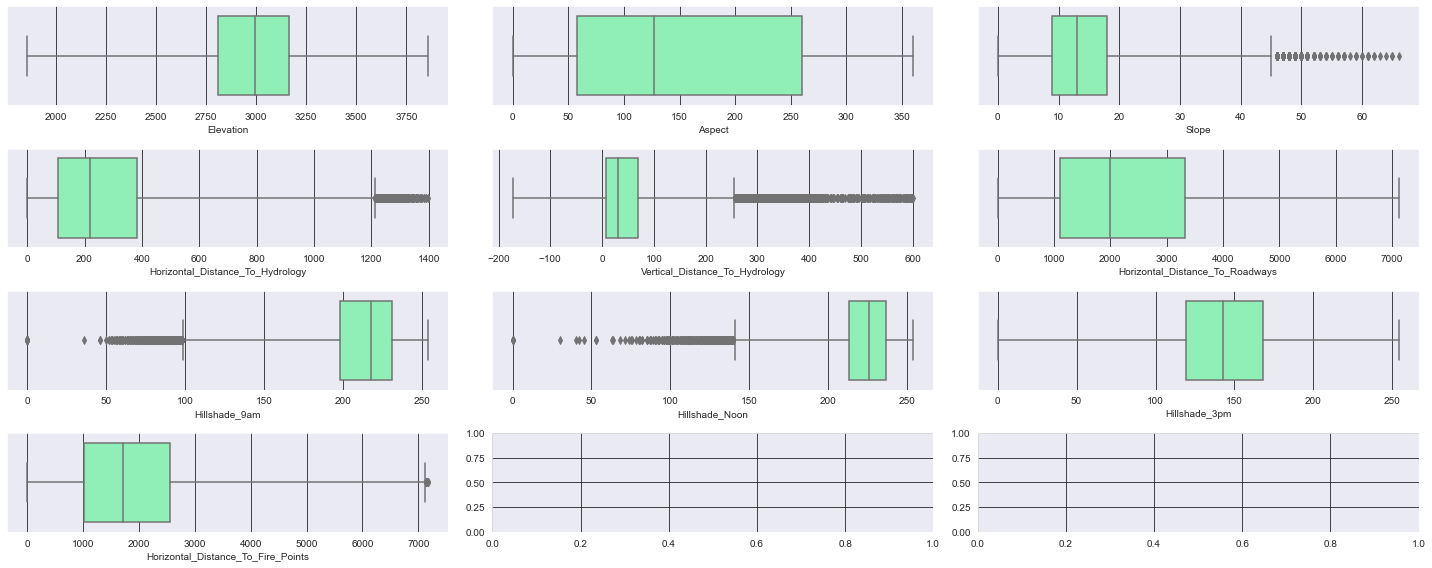

In [172]:
fig, ax = plt.subplots(nrows=4,ncols=3,figsize=(20,8))

for variable,subplot in zip(df_ctype_num.columns,ax.flatten()):
    
    sns.boxplot(df_ctype_num[variable],ax=subplot,palette='rainbow_r', whis = 3)
    
plt.tight_layout()

plt.show()

**Interpretation :**

- `Elevation` is not having any outliers.

- `Aspect` is not having any outliers.

- `Slope` is having outliers near upper limit and the median is at 13.

- `Horizontal_Distance_To_Hydrology` is having outliers starting from 1250 to 1400.

- `Vertical_Distance_To_Hydrology` is having outliers at upper limit from 250 to 600.

- `Horizontal_Distance_To_Roadways` is not having any outliers.

- `Hillshade_9am` is having outliers at the lower limit.

- `Hillshade_noon` is having ouliers at the lower limit.

- `Hillshade_3pm` is is not having any outliers.

- `Horizontal_Distance_To_Fire_Points` is having only 10 outliers at the upper limit

**We are not performing outlier treatment over here .Since, we have Categorical data which is One Hot Encoded and if we try to perform the Outlier treatment it might results in loosing the data.**

## Feature Spread

### Spread of Numerical Data

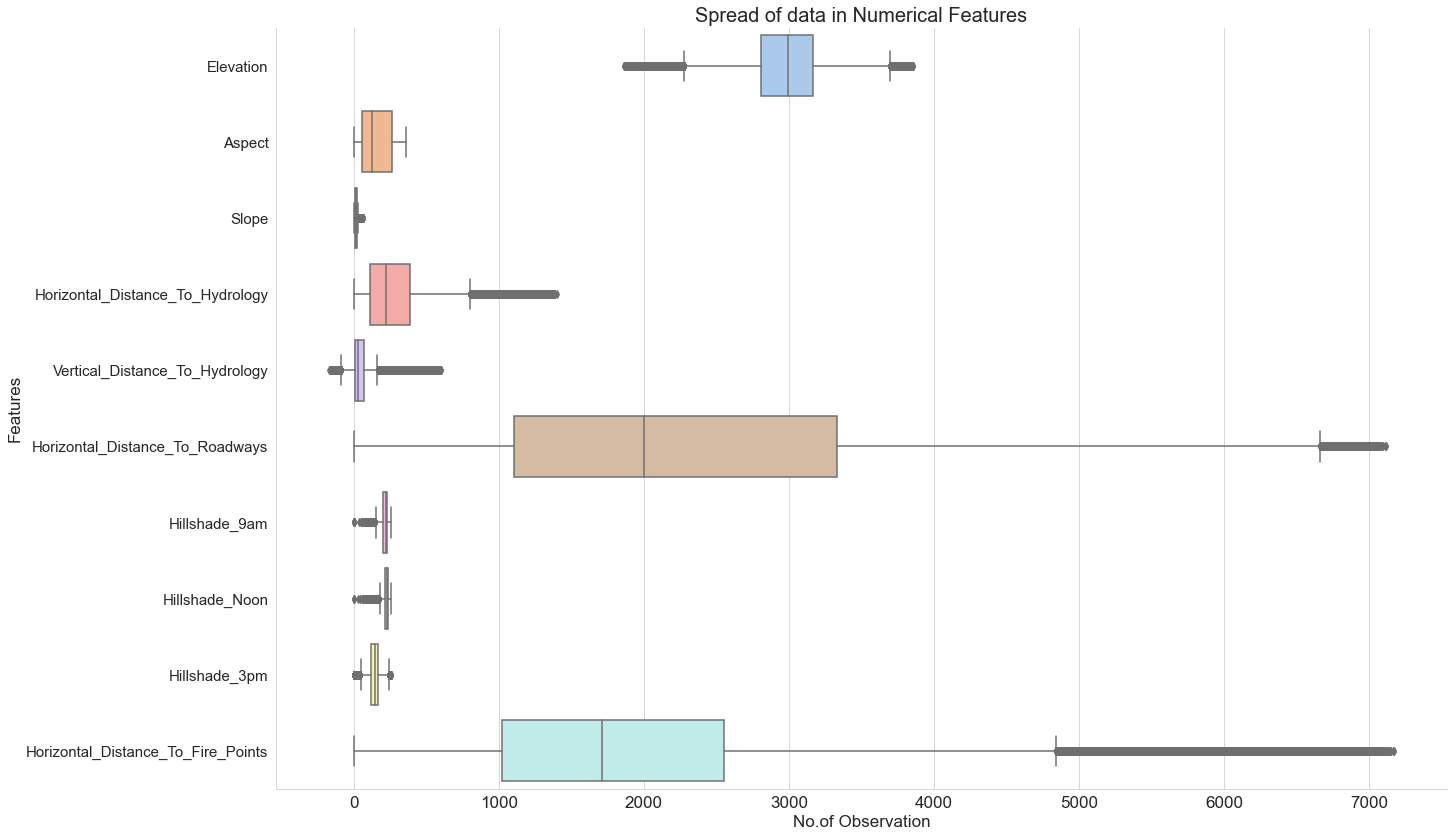

In [15]:
sns.set_style("whitegrid")
plt.subplots(figsize=(21, 14))
color = sns.color_palette('pastel')

sns.boxplot(data = df_ctype_num, orient='h', palette=color)

plt.title('Spread of data in Numerical Features', size = 20)

plt.xlabel('No.of Observation', size = 17)

plt.ylabel('Features', size = 17)

plt.xticks(size = 17)

plt.yticks(size = 15)

sns.despine()

plt.show()

**Interpretation:**

- `Slope` is the most squeezed box plot feature! It's densely packed taking on least range compared to all features. Having little range means `mean` and `median` will be quite close.


- `Aspect` feature is the only one which do not have any outliers having a range of 360. Since both `Aspect` and `Slope` are measured in degrees, `Aspect` takes on much bigger range than `Slope` because it has lowest max score, hence `Aspect` is much less densed than `Slope`. The `first 50%` of the data, from `min to meadian` is more densed than the `last 50%`, its more spread out.


- `Hillshade`s feature also having similar plot like `Slope` including many outliers and taking on smaller range. Similiar plot is for `Vertical_Distance_To_Hydrology` except here the minimum value is negative as we had seen in the table.


- `Elevation` and `Horizontal_Distance_To_Hydrology` are the only features that doesn't have minimum value of 0. `Elevation` instead is plotted in middle having many outliers too.


- `Horizontal_Distance_To_Roadways` is the most spread data of all features because it has the highest standard deviation score followed by `Horizontal_Distance_To_Fire_Points` though this feature has the maximum value. We can see visually only how spread these are and which one is most. `Horizontal_Distance_To_Fire_Points` may be having largest number of outliers. If we compare these two features, the last 50% of the data of `Horizontal_Distance_To_Roadways` is much more spread and less dense compared to `Horizontal_Distance_To_Fire_Points` , hence having high standard deviation score.

### Spread of Categorical Data (Wilderness Area)

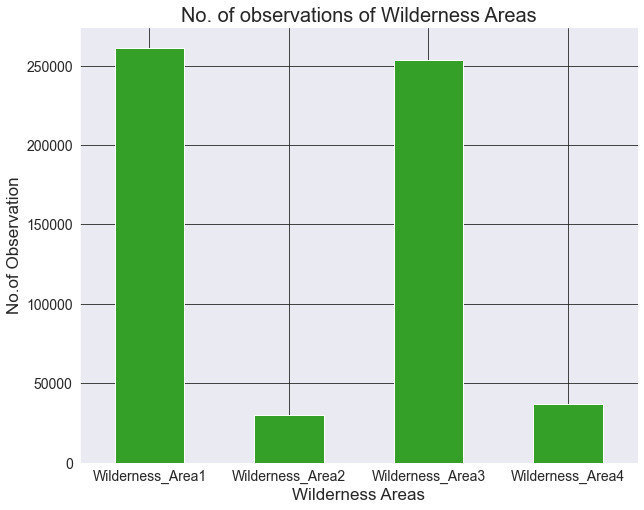

In [16]:
Wild_data, Soil_data = df_ctype.iloc[:,10:14], df_ctype.iloc[:,14:54]

sns.set_style("darkgrid", {'grid.color': '.1'})

flatui = ["#e74c3c", "#34495e", "#2ecc71","#3498db"]

color = sns.color_palette(flatui)

Wild_data.sum().plot(kind='bar', figsize=(10, 8), color='#34a028')

plt.title('No. of observations of Wilderness Areas', size = 20)

plt.xlabel('Wilderness Areas', size = 17)

plt.ylabel('No.of Observation', size = 17)

plt.xticks(rotation = 'horizontal', size = 14)

plt.yticks(size = 14)

sns.despine()

plt.show()

And here's the visual proof, `Wilderness_Area1` has the most presence followed by `Wilderness_Area3`, both have quite close observations and so were their mean value. `Wilderness_Area2` having the least observation. Lets see their exact values for precision.

In [17]:
Wild_data.sum()

Wilderness_Area1    260795
Wilderness_Area2     29884
Wilderness_Area3    253364
Wilderness_Area4     36968
dtype: int64

### Spread of Categorical Data (Soil Type)

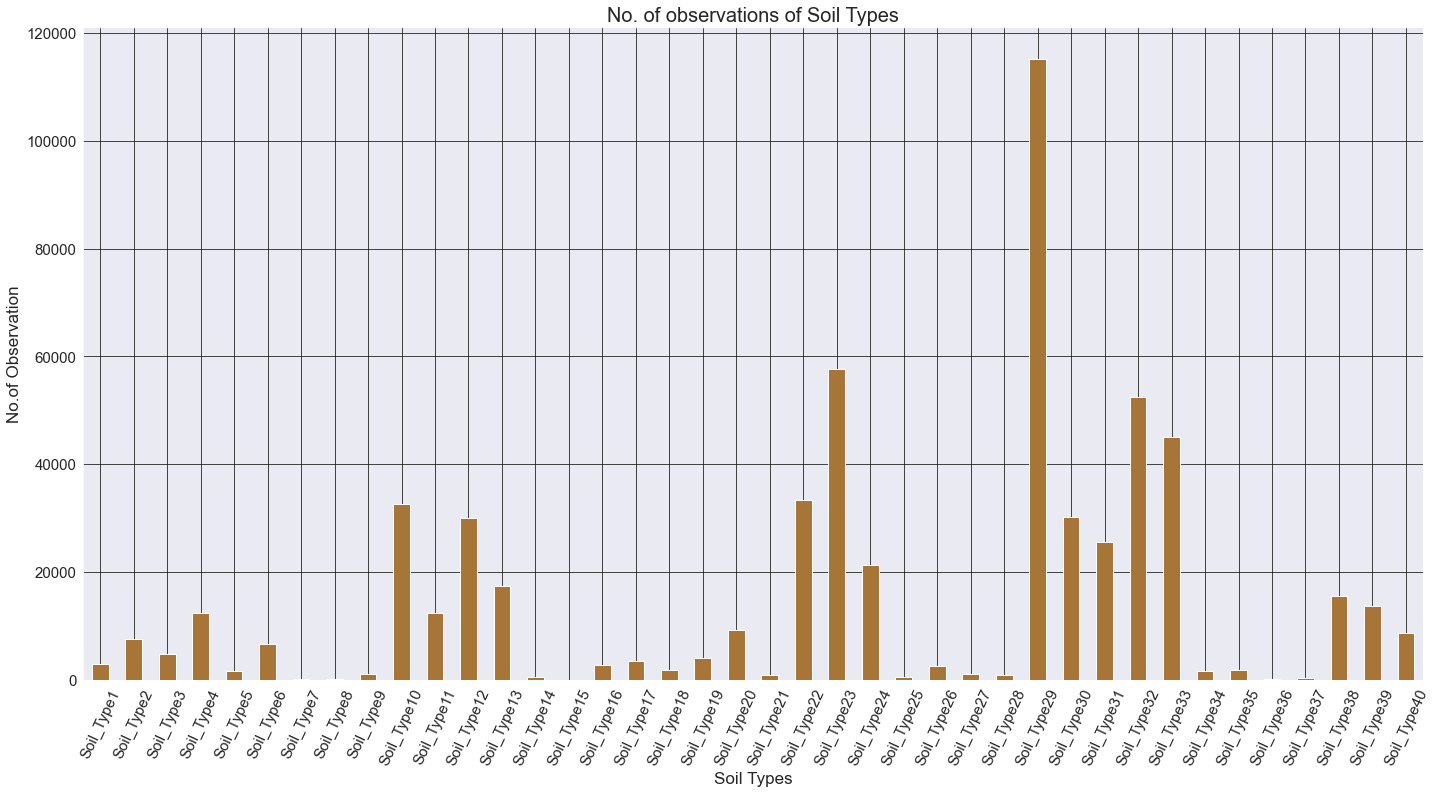

In [18]:
sns.set_style("darkgrid", {'grid.color': '.1'})

Soil_data.sum().plot(kind='bar', figsize=(24, 12), color = '#a87539')

plt.title('No. of observations of Soil Types', size = 20)

plt.xlabel('Soil Types', size = 17)

plt.ylabel('No.of Observation', size = 17)

plt.xticks(rotation = 65, size = 15)

plt.yticks(size = 15)

sns.despine()

plt.show()

**Let's see the exact number of observations of `Soil Types` in descending order.**

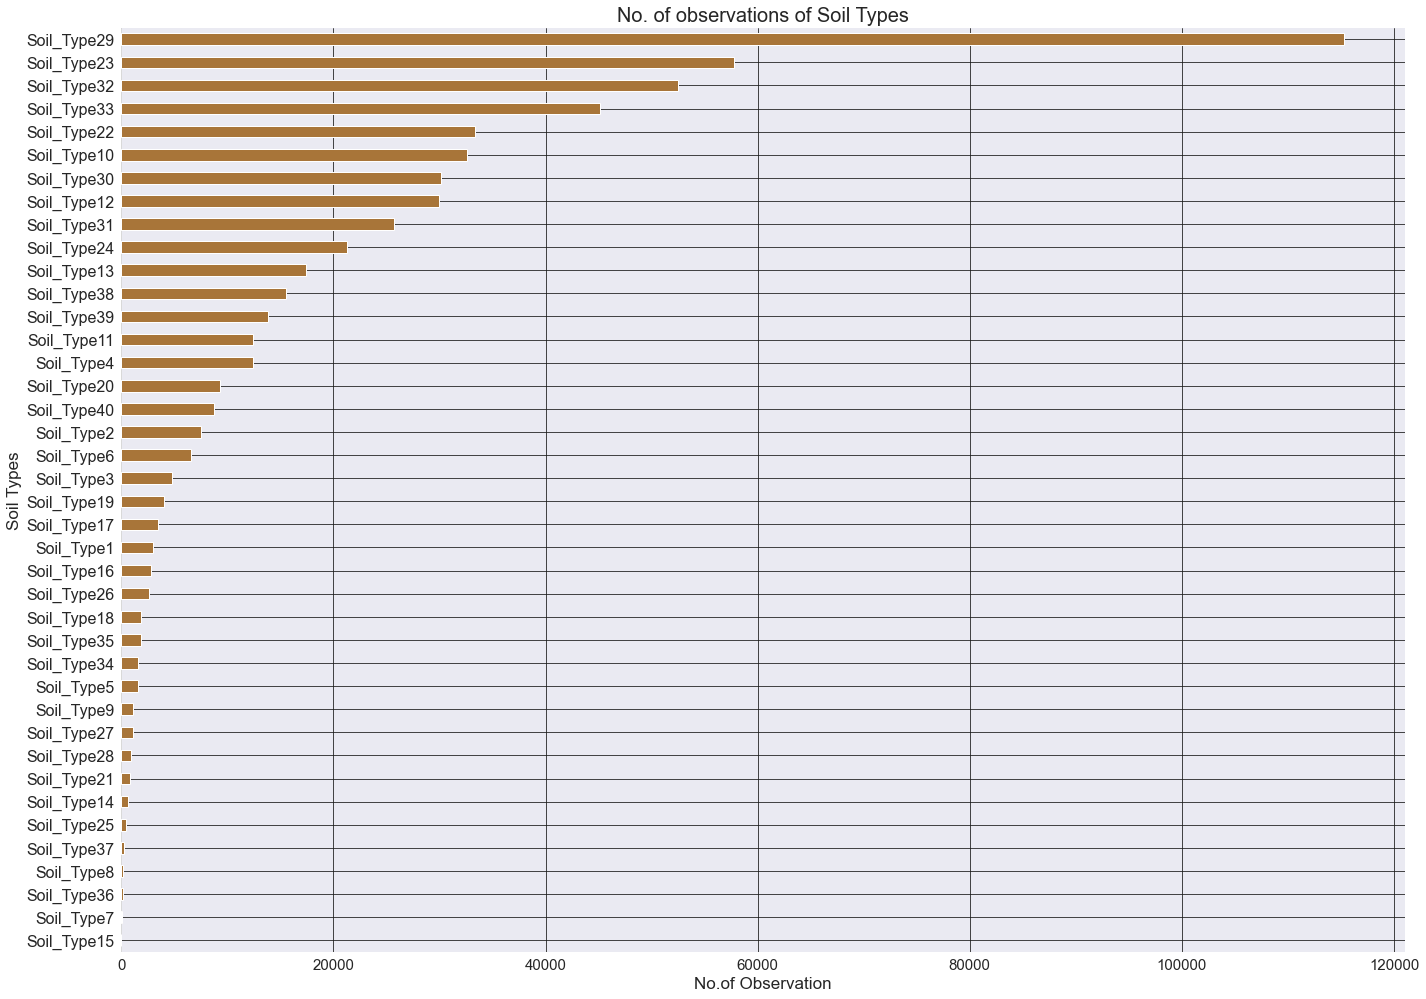

In [19]:
sns.set_style("darkgrid", {'grid.color': '.1'})

soil_sum = pd.Series(Soil_data.sum())

soil_sum.sort_values(ascending = False, inplace = True)

soil_sum.plot(kind='barh', figsize=(23, 17), color= '#a87539')

plt.gca().invert_yaxis()

plt.title('No. of observations of Soil Types', size = 20)

plt.xlabel('No.of Observation', size = 17)

plt.ylabel('Soil Types', size = 17)

plt.xticks(rotation = 'horizontal', size = 15)

plt.yticks(size = 16)

sns.despine()

plt.show()

In [20]:
# Exact number of observations.
soil_sum

Soil_Type29    115246
Soil_Type23     57752
Soil_Type32     52519
Soil_Type33     45154
Soil_Type22     33373
Soil_Type10     32634
Soil_Type30     30170
Soil_Type12     29971
Soil_Type31     25666
Soil_Type24     21278
Soil_Type13     17431
Soil_Type38     15573
Soil_Type39     13806
Soil_Type11     12410
Soil_Type4      12396
Soil_Type20      9259
Soil_Type40      8750
Soil_Type2       7525
Soil_Type6       6575
Soil_Type3       4823
Soil_Type19      4021
Soil_Type17      3422
Soil_Type1       3031
Soil_Type16      2845
Soil_Type26      2589
Soil_Type18      1899
Soil_Type35      1891
Soil_Type34      1611
Soil_Type5       1597
Soil_Type9       1147
Soil_Type27      1086
Soil_Type28       946
Soil_Type21       838
Soil_Type14       599
Soil_Type25       474
Soil_Type37       298
Soil_Type8        179
Soil_Type36       119
Soil_Type7        105
Soil_Type15         3
dtype: int64

**Interpretation:**

- The least observation are of `Soil_Type15` of `3`. Thats why it had most skewed value of all `Soil Types` of `~440` which now makes sense since this feature has value of `0` for all except for `3` observations hence making it densly concentrated towards `0` and long flat tail to the right having a form of `positively skewed distribution` or `Right Skewed Distribution`. 


- `Soil_Type29` has the highest, `115,246` observations.

#### Let's perform some Univariate and multivaraite analysis on the data to understand it better.

### Univariate Analysis and Multivariate Analysis

In [21]:
df_ctype.head(2)

Elevation  Aspect  Slope  Horizontal_Distance_To_Hydrology  \
0       2590      56      2                               212   
1       2804     139      9                               268   

   Vertical_Distance_To_Hydrology  Horizontal_Distance_To_Roadways  \
0                              -6                              390   
1                              65                             3180   

   Hillshade_9am  Hillshade_Noon  Hillshade_3pm  \
0            220             235            151   
1            234             238            135   

   Horizontal_Distance_To_Fire_Points  ...  Soil_Type32  Soil_Type33  \
0                                6225  ...            0            0   
1                                6121  ...            0            0   

   Soil_Type34  Soil_Type35  Soil_Type36  Soil_Type37  Soil_Type38  \
0            0            0            0            0            0   
1            0            0            0            0            0   

   Soil_Type39  Soil_Type40  Cover_Type  
0            0            0           5  
1            0            0           2  

[2 rows x 55 columns]

In [22]:
df_ctype.columns

Index(['Elevation', 'Aspect', 'Slope', 'Horizontal_Distance_To_Hydrology',
       'Vertical_Distance_To_Hydrology', 'Horizontal_Distance_To_Roadways',
       'Hillshade_9am', 'Hillshade_Noon', 'Hillshade_3pm',
       'Horizontal_Distance_To_Fire_Points', 'Wilderness_Area1',
       'Wilderness_Area2', 'Wilderness_Area3', 'Wilderness_Area4',
       'Soil_Type1', 'Soil_Type2', 'Soil_Type3', 'Soil_Type4', 'Soil_Type5',
       'Soil_Type6', 'Soil_Type7', 'Soil_Type8', 'Soil_Type9', 'Soil_Type10',
       'Soil_Type11', 'Soil_Type12', 'Soil_Type13', 'Soil_Type14',
       'Soil_Type15', 'Soil_Type16', 'Soil_Type17', 'Soil_Type18',
       'Soil_Type19', 'Soil_Type20', 'Soil_Type21', 'Soil_Type22',
       'Soil_Type23', 'Soil_Type24', 'Soil_Type25', 'Soil_Type26',
       'Soil_Type27', 'Soil_Type28', 'Soil_Type29', 'Soil_Type30',
       'Soil_Type31', 'Soil_Type32', 'Soil_Type33', 'Soil_Type34',
       'Soil_Type35', 'Soil_Type36', 'Soil_Type37', 'Soil_Type38',
       'Soil_Type39', 'Soil_Type40

### Cover_Type

In [23]:
df_ctype['Cover_Type'].value_counts()

2    283301
1    211840
3     35754
7     20510
6     17367
5      9492
4      2747
Name: Cover_Type, dtype: int64

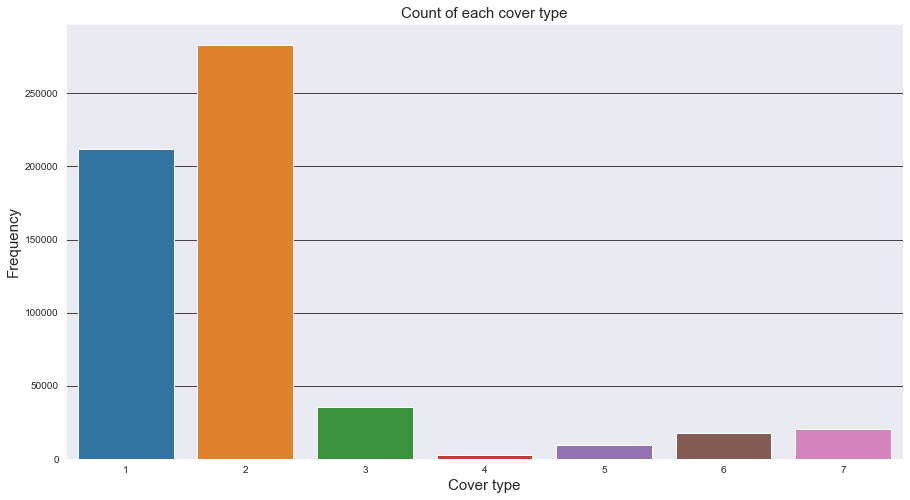

In [24]:
sns.countplot(data = df_ctype, x = 'Cover_Type')
plt.title('Count of each cover type', fontsize = 15)
plt.xlabel('Cover type', fontsize = 15)
plt.ylabel('Frequency', fontsize = 15)
plt.show()

| Key | Name |
| --- | ---- |
| 1 | Spruce / Fir |
| 2 | Lodgepole Pine |
| 3 | Ponderosa Pine |
| 4 | Cottonwood / Willow |
| 5 | Aspen |
| 6 | Douglas-fir |
| 7 | Krummholz |

**Inference:** 

- `Lodgepole Pine` is the most grown cover type in the Roosevelt National Forest of Northern Colorado followed by `Spruce / Fir` 

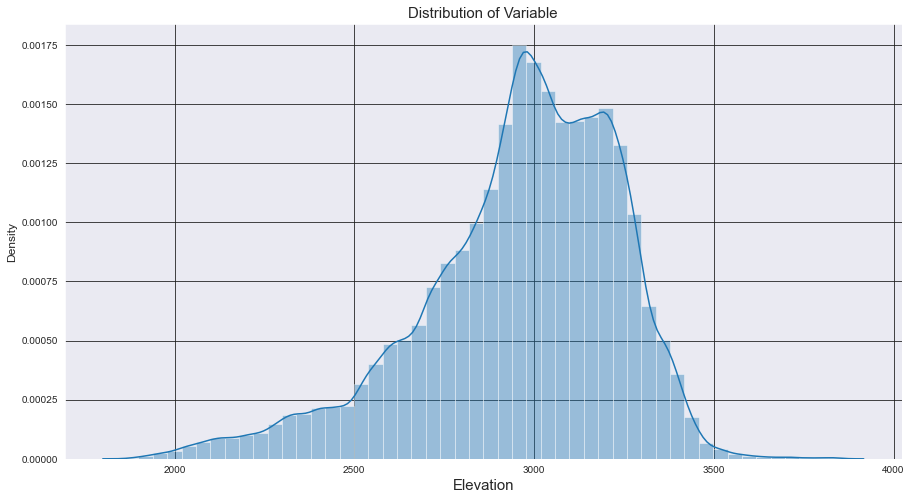

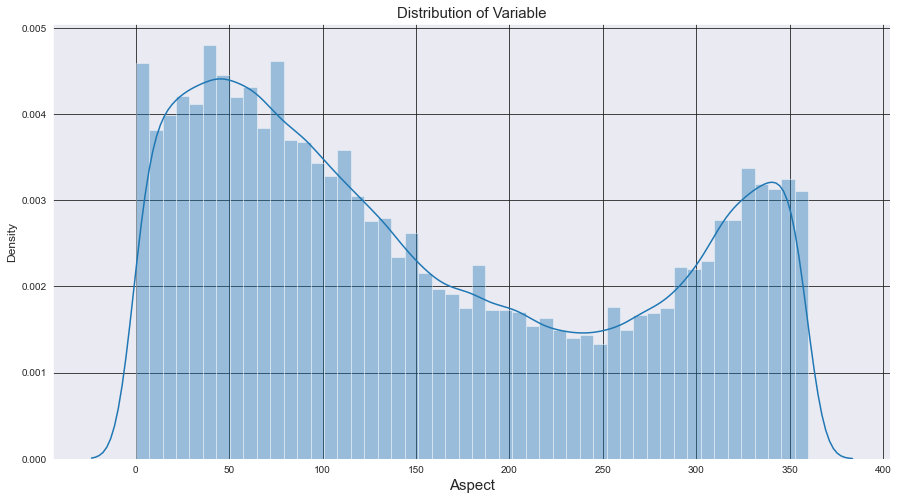

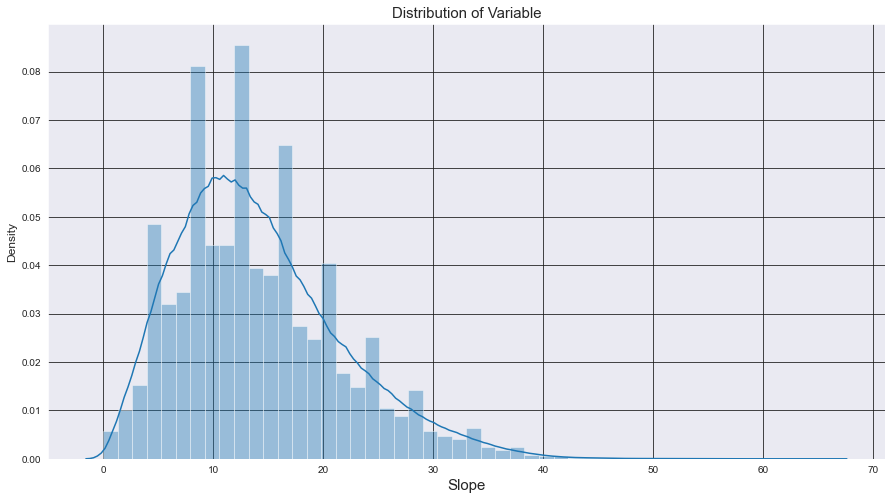

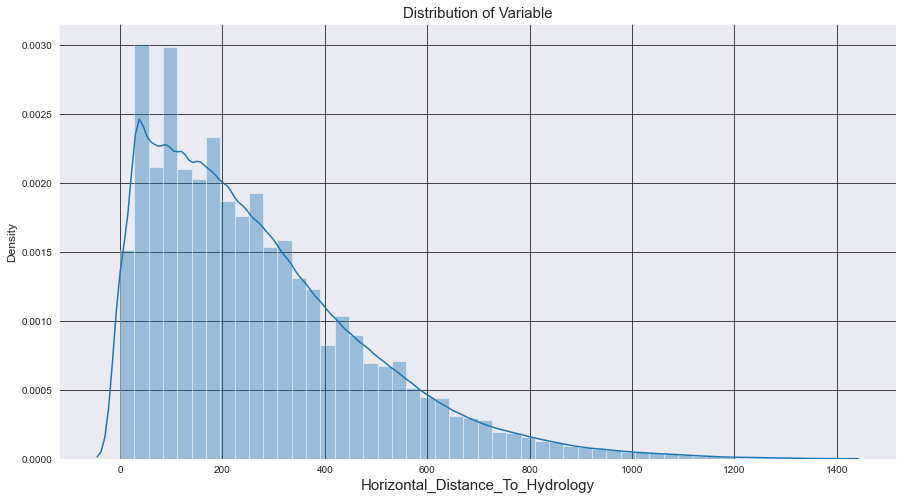

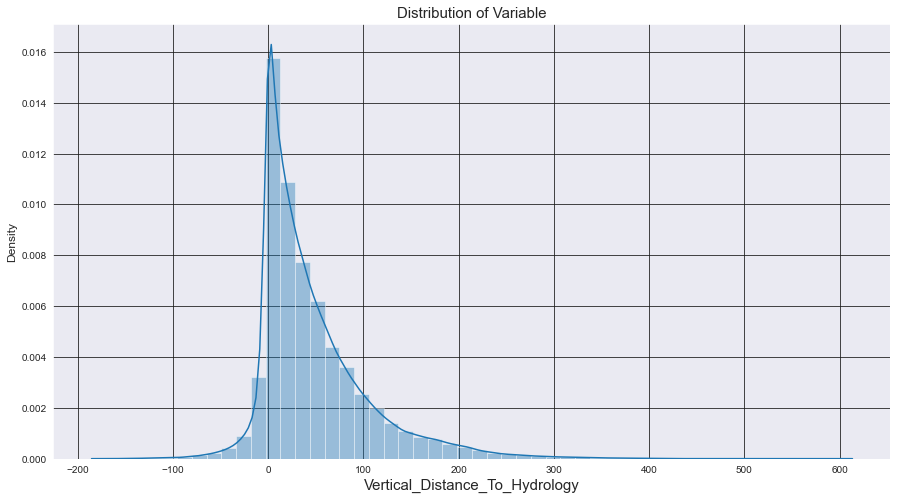

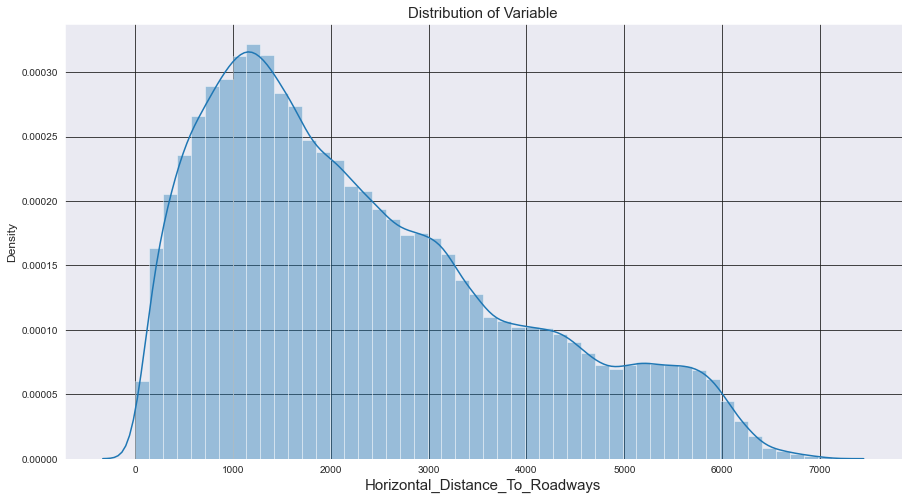

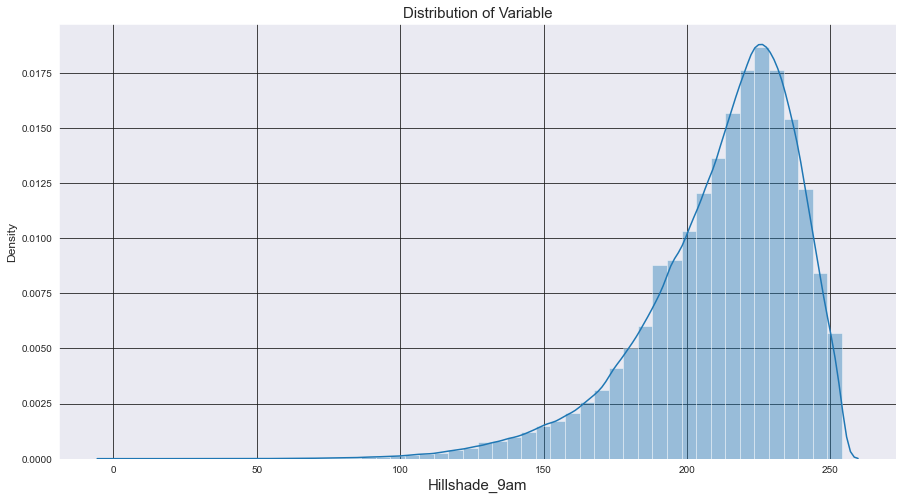

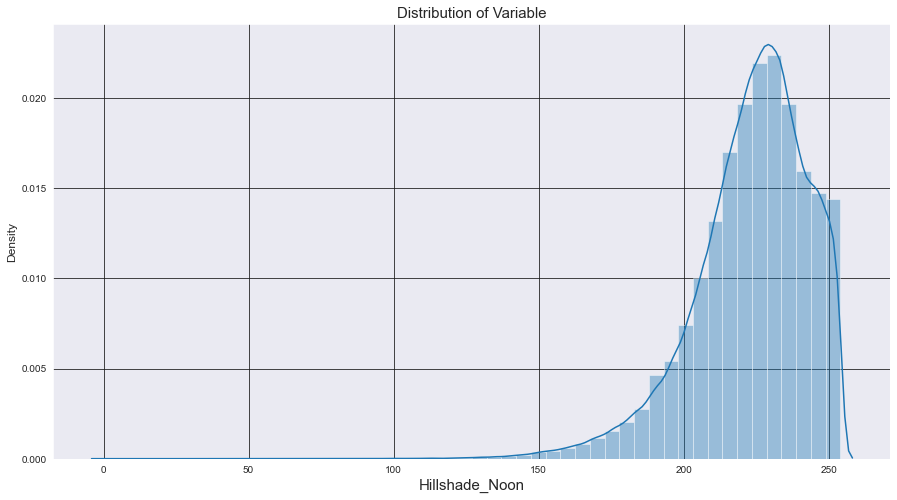

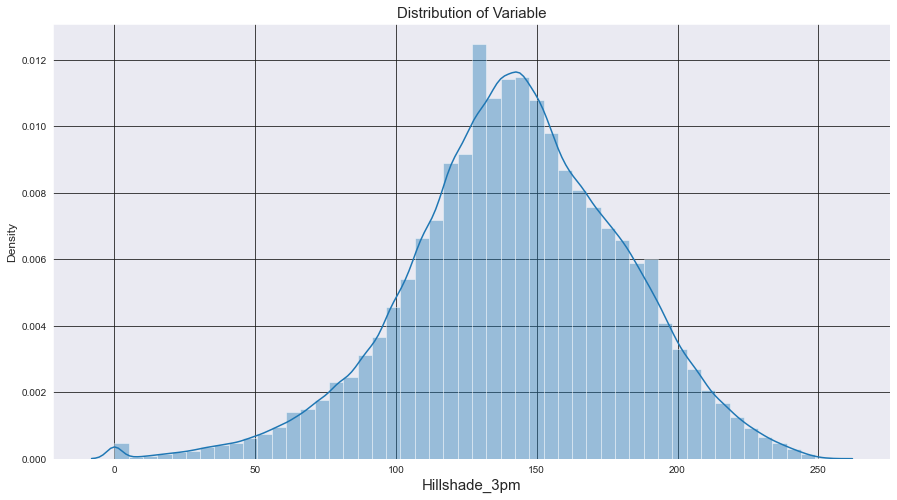

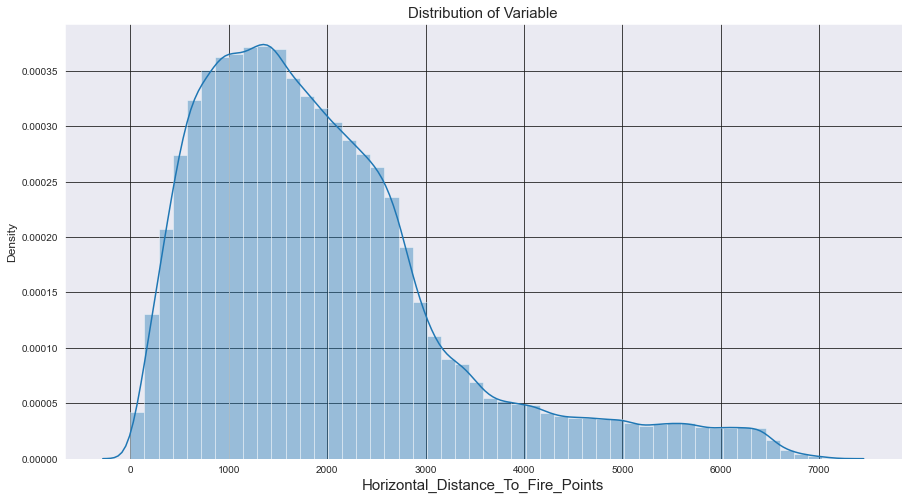

In [25]:
for i in df_ctype_num.columns:
    sns.distplot(df_ctype_num[i])
    plt.xlabel(i, fontsize = 15)
    plt.ylabel('Density',fontsize = 12)
    plt.title('Distribution of Variable', fontsize = 15)
    plt.show()

**Inference:** 
    
- From the above distribution plot, we can tell that `Slope`, `Horizontal_Distance_To_Hydrology`, `Vertical_Distance_To_Hydrology`, `Horizontal_Distance_To_Roadways`, `Horizontal_Distance_To_Fire_Points` are right skewed.

- `Aspect`, `Hillshade_3pm` are pretty normally distributed.

- `Elevation`, `Hillshade_9am`, `Hillshade_Noon` are left skewed.

**Next let's compare each feature in our data to our target variable, visualizing how much dense and distributed each target variable's class is compared to the feature. We will use `Violin Plot` to visualize this, a combination of Box Plot and Density Plot (Histogram).**

### Distribution and relationship of continuous variables (Elevation, Aspect, Slope, Distance and Hillsahde columns)

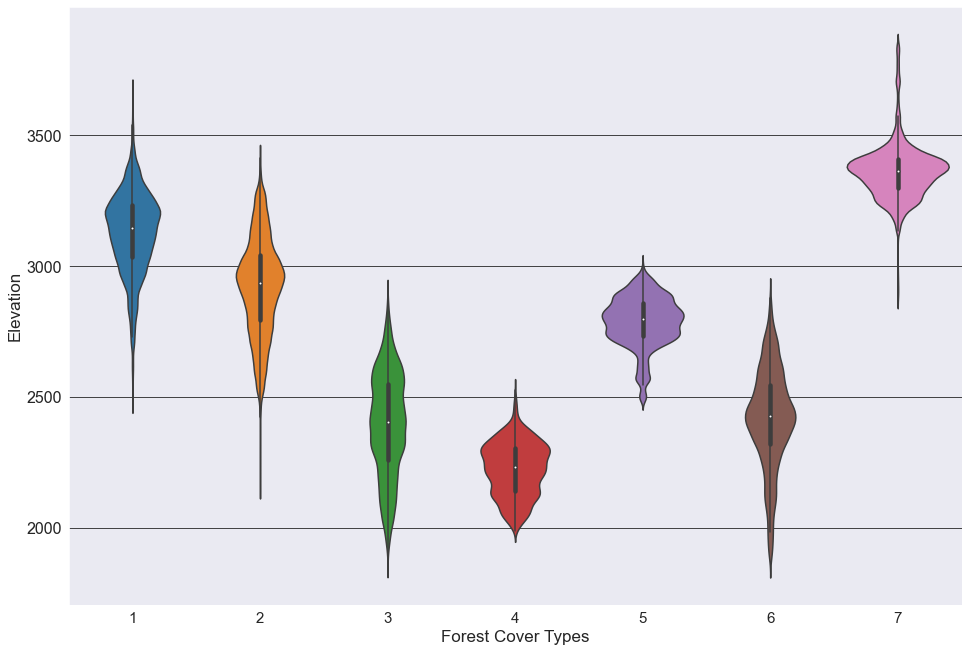

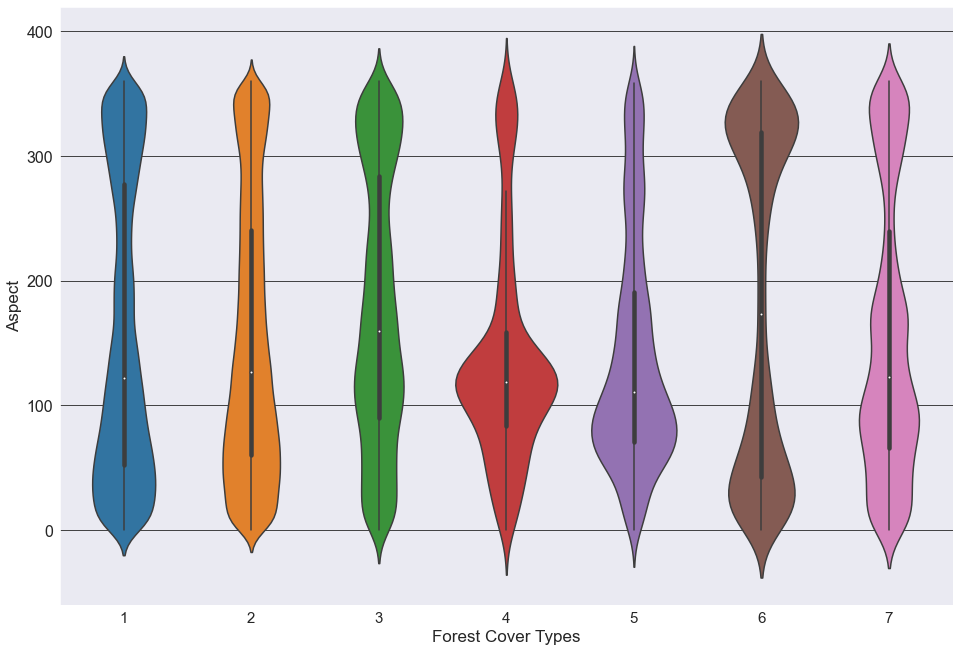

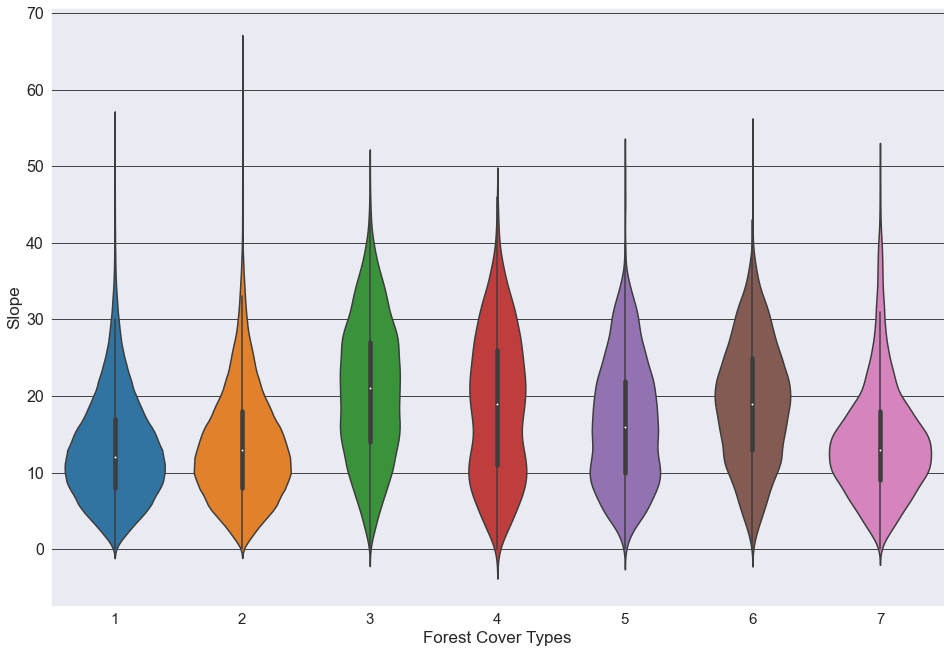

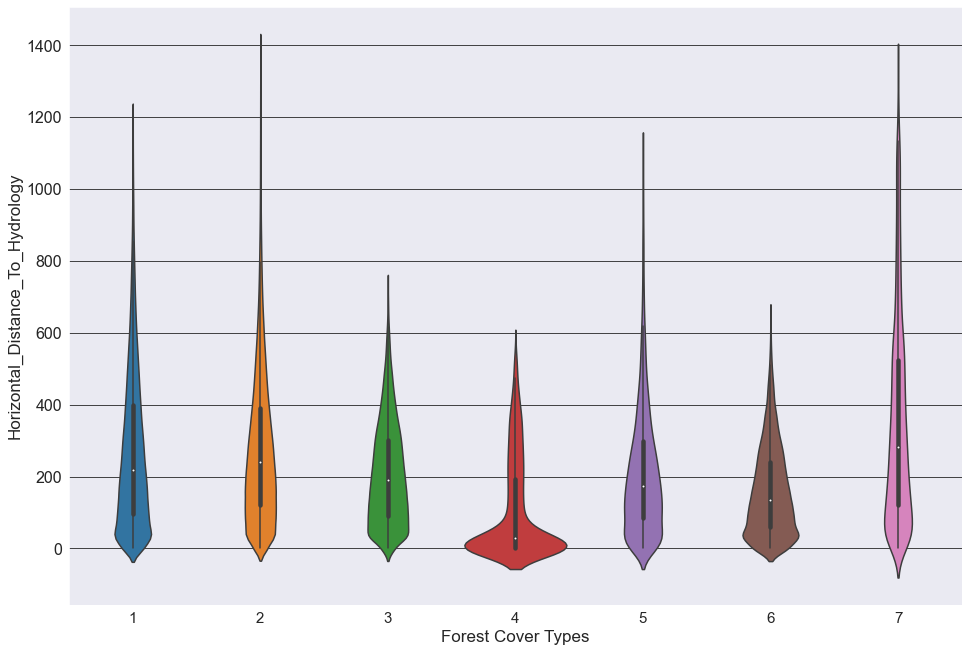

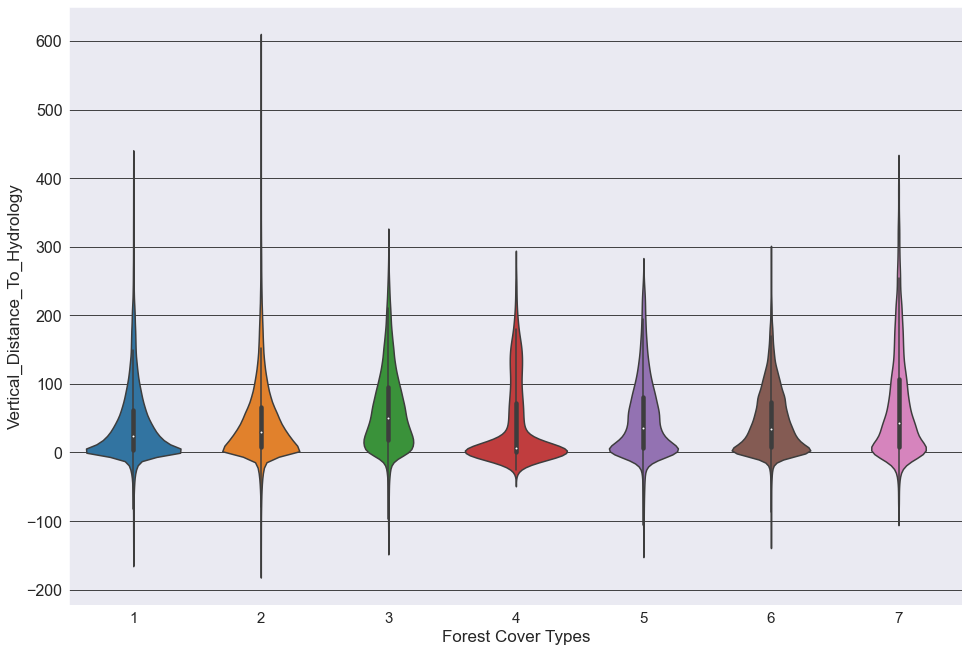

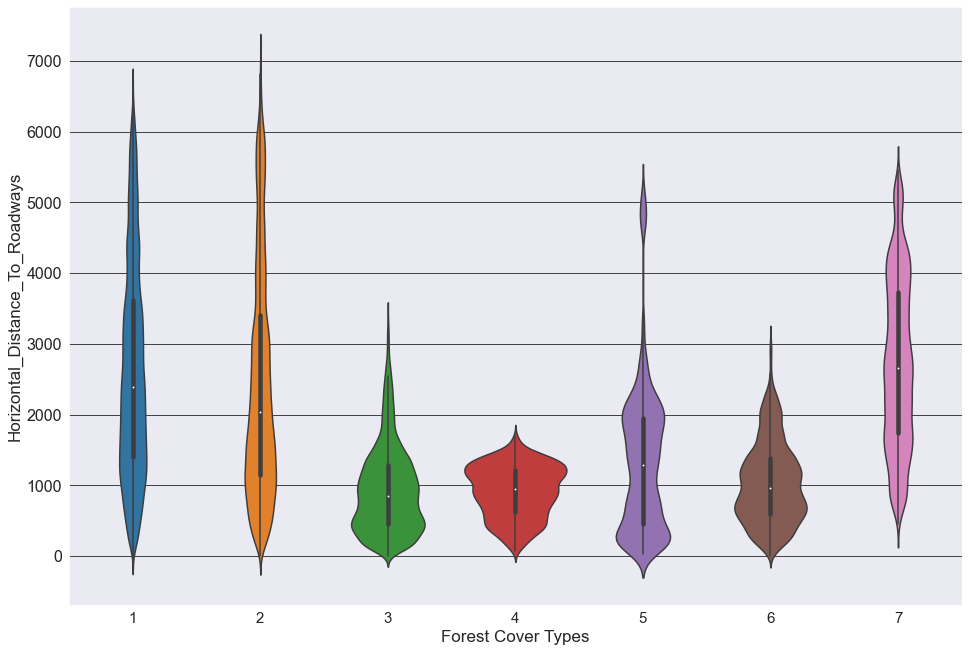

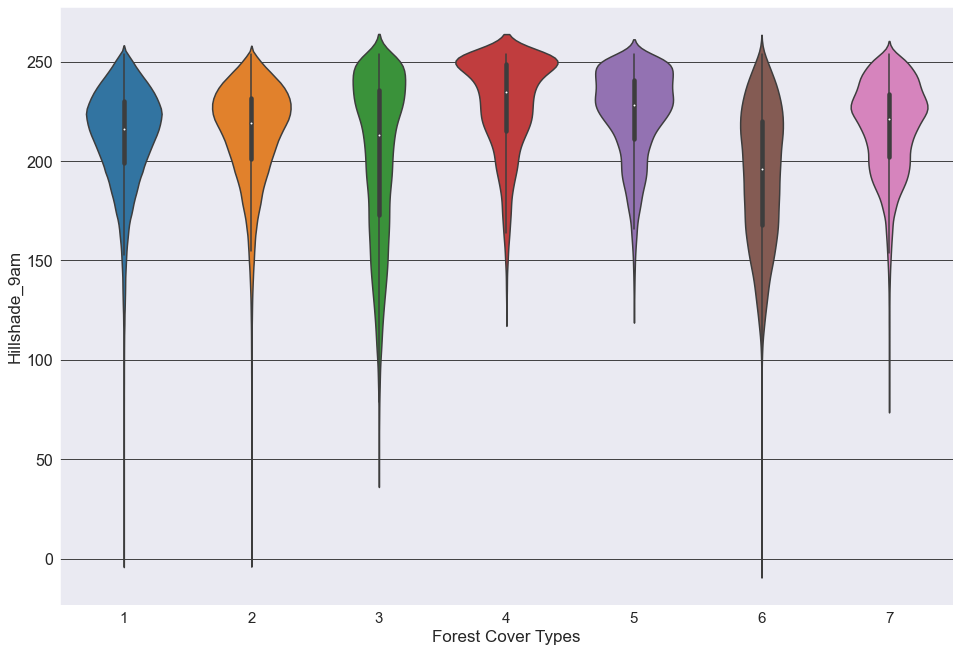

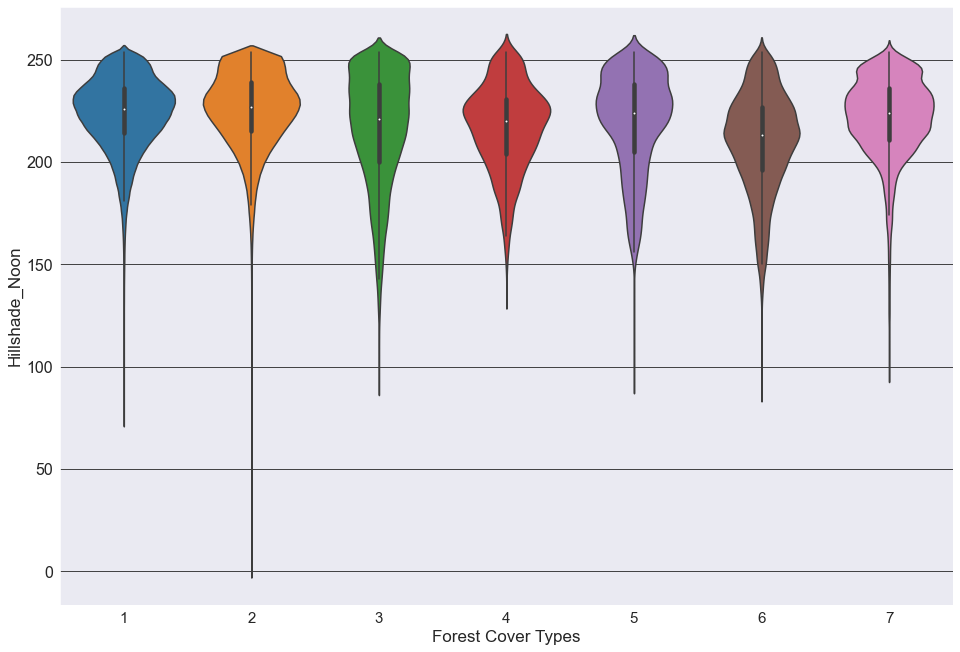

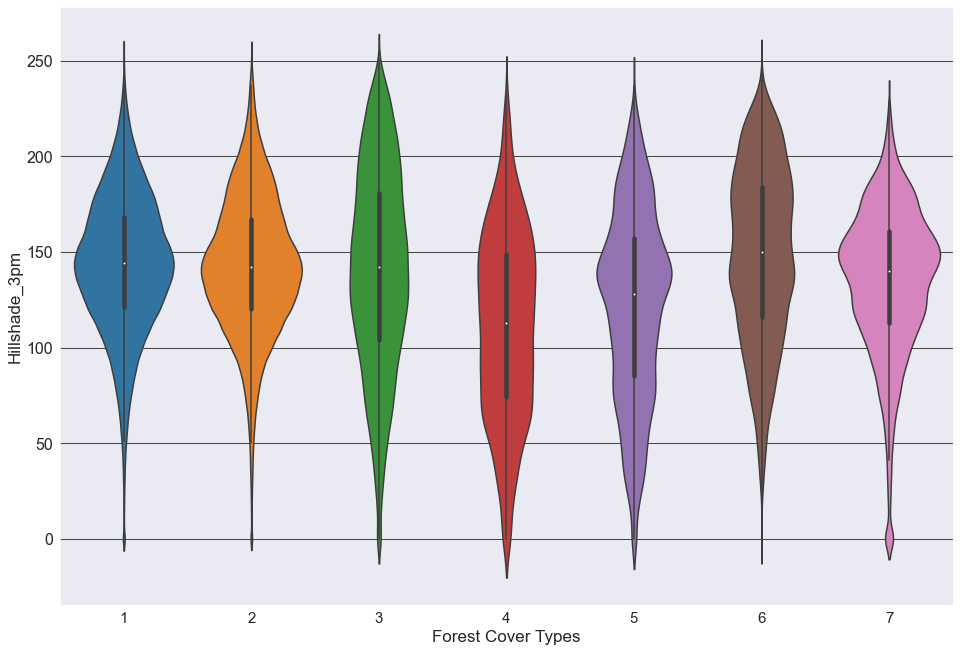

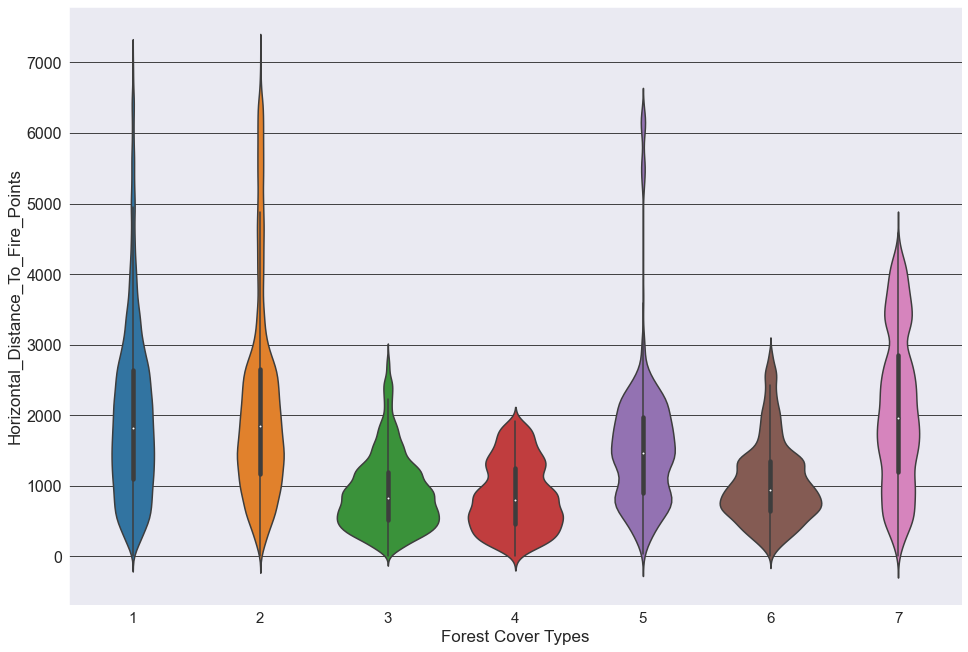

In [26]:
sns.set_style("darkgrid", {'grid.color': '.1'})
target = df_ctype['Cover_Type']
features = df_ctype_num.columns

for i in range(0, len(features)):
    plt.subplots(figsize=(16, 11))
    sns.violinplot(data=df_ctype_num, x=target, y = features[i])
    plt.xticks(size = 15)
    plt.yticks(size = 16)
    plt.xlabel('Forest Cover Types', size = 17)
    plt.ylabel(features[i], size = 17)
    plt.show()

**Inference:**

- `Elevation` takes on different range of values for different forest classes. Most of the forest at the elevation between `2000m - 25000m` are of `class 4 forest type` while `class 3 forest type` has fewer presence of such `elevation`. `Class 7 forest type` have the observations of most elevated trees ranging from as low as `~2800m` to as high as `~3800m`. The `'max'` value in `elevation` belongs to `class 7 forest type`. This is the most important feature since every feature tells different story to different classes of forest cover type hence an important feature for our algorithm.

- `Aspect` is the feature that has normal distribution for each class.

- `Slope` feature takes on lower values compared to most features as its measured in degrees and least to `Aspect` which is also measured in degrees. It has the `least maximum` value of all features.

- `Horizontal distance to hydrology` has the right or positively skewed distribution.

- `Vertical distance to hydrology` is also `positively skewed distribution` but this takes on values much closer to `0` for all classes for most observations.The `highest value` in this feature belongs to `Forest cover type 2`. And this feature also has the `least minimum value` of all features and that also belongs to `class 2 forest type`, hence `class 2` having most range of data observations compared to all other classes.

- `Hillshade_9am` and `Hillshade_Noon` are `left or negatively skewed distributions` where they take on max value between `200-250 index value` for most observations in each class. While `Hillshade_3pm` has `normal distribution` for all classes.


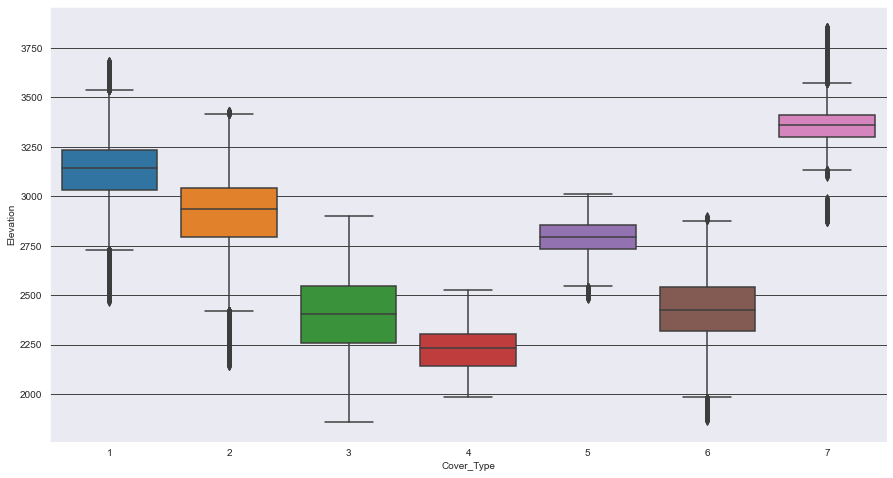

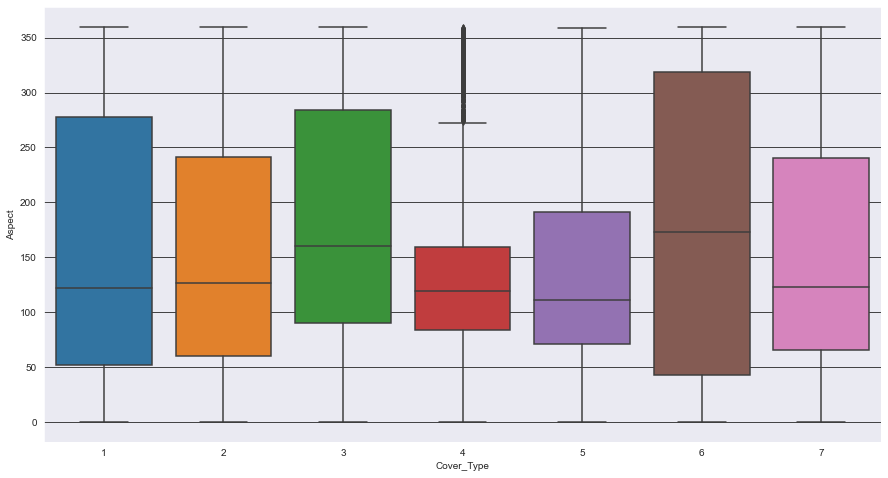

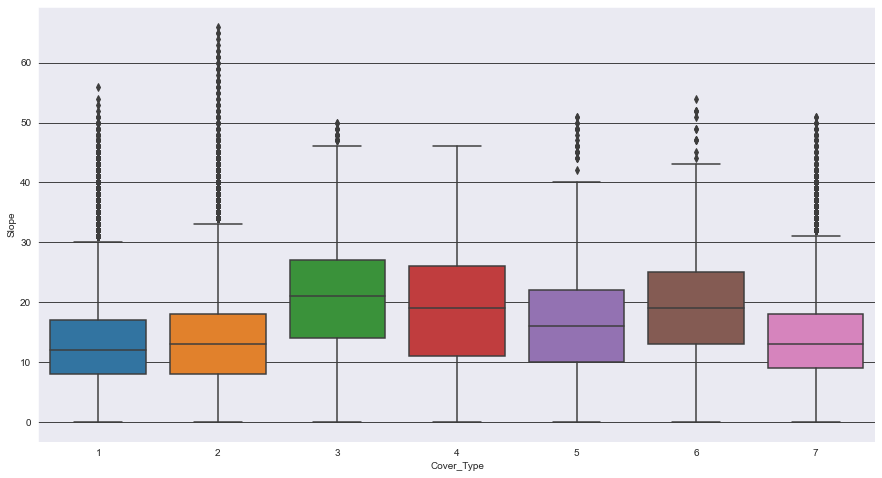

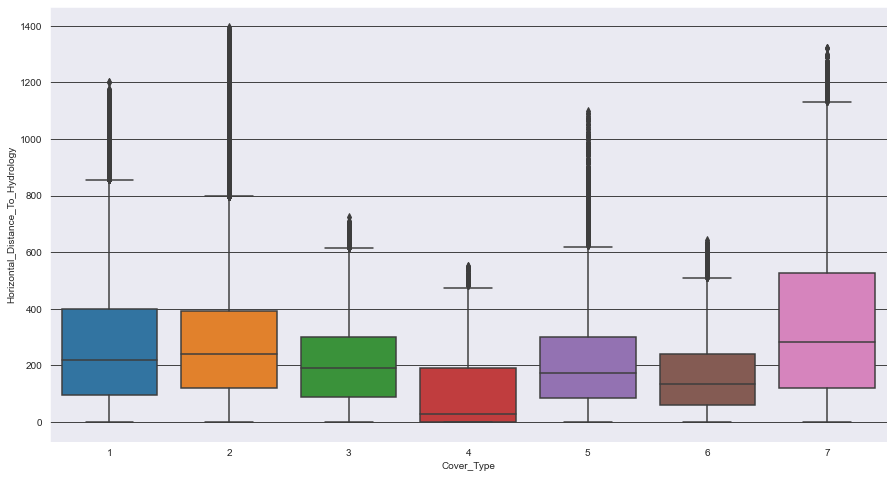

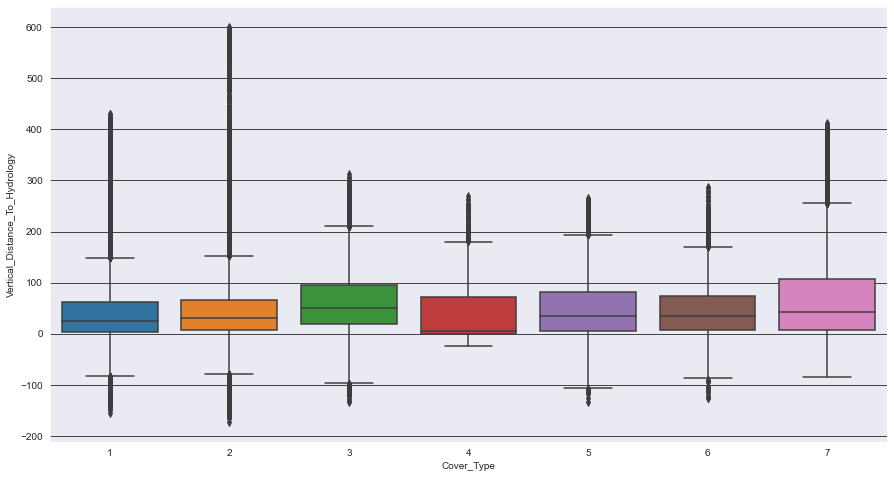

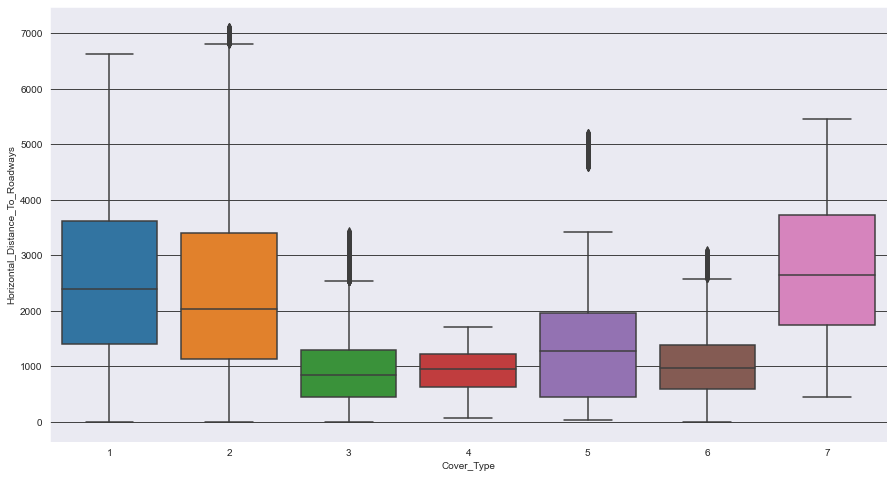

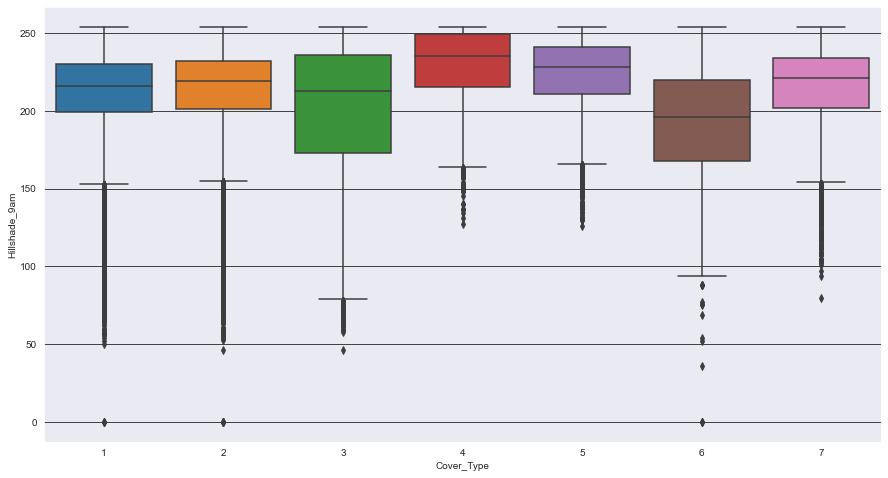

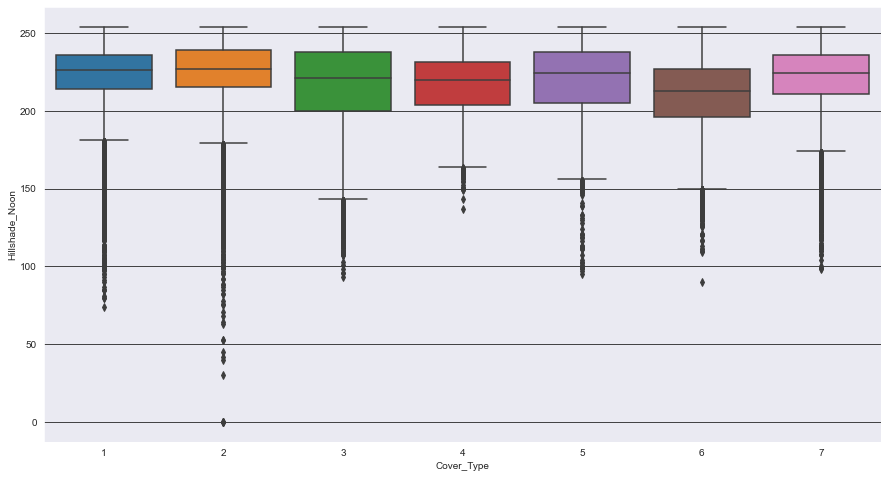

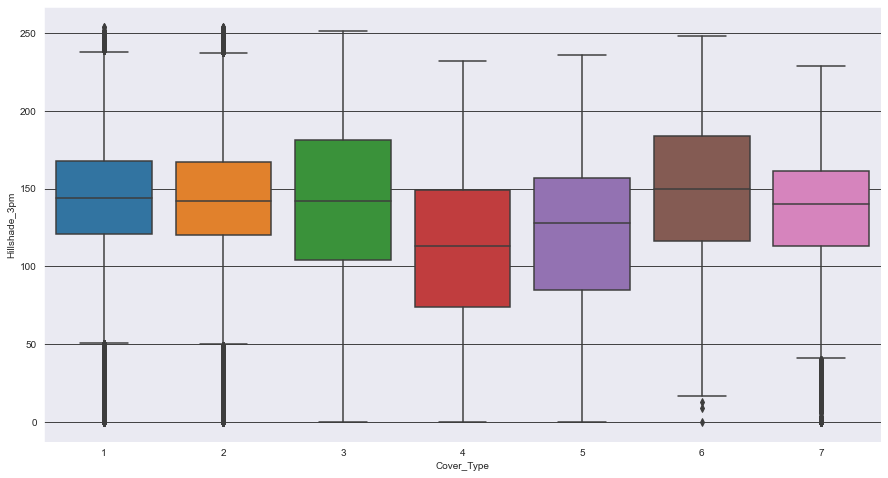

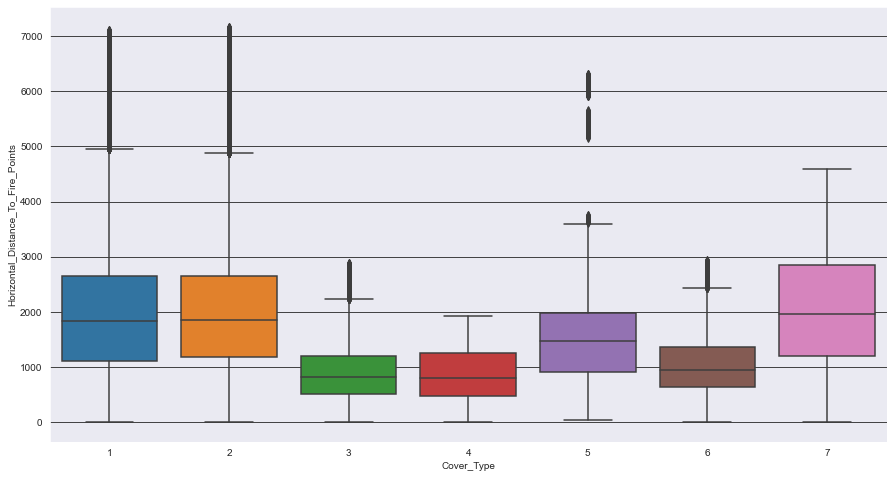

In [27]:
for col in df_ctype_num.columns:
    sns.boxplot(df_ctype['Cover_Type'],df_ctype_num[col])
    plt.show()

**Inference:**

- `Elevation` takes on different range of values for different forest classes. Most of the forest at the elevation between `2000m - 25000m` are of `class 4 forest type` while `class 3 forest type` has fewer presence of such `elevation`. `Class 7 forest type` have the observations of most elevated trees ranging from as low as `~2800m` to as high as `~3800m`. The `'max'` value in `elevation` belongs to `class 7 forest type`. This is the most important feature since every feature tells different story to different classes of forest cover type hence an important feature for our algorithm.

- `Aspect` is the feature that has normal distribution for each class.

- `Slope` feature takes on lower values compared to most features as its measured in degrees and least to `Aspect` which is also measured in degrees. It has the `least maximum` value of all features.

- `Horizontal distance to hydrology` has the right or positively skewed distribution.

- `Vertical distance to hydrology` is also `positively skewed distribution` but this takes on values much closer to `0` for all classes for most observations.The `highest value` in this feature belongs to `Forest cover type 2`. And this feature also has the `least minimum value` of all features and that also belongs to `class 2 forest type`, hence `class 2` having most range of data observations compared to all other classes.

- `Hillshade_9am` and `Hillshade_Noon` are `left or negatively skewed distributions` where they take on max value between `200-250 index value` for most observations in each class. While `Hillshade_3pm` has `normal distribution` for all classes.


### Cover_Type distribution among different Wilderness_Areas

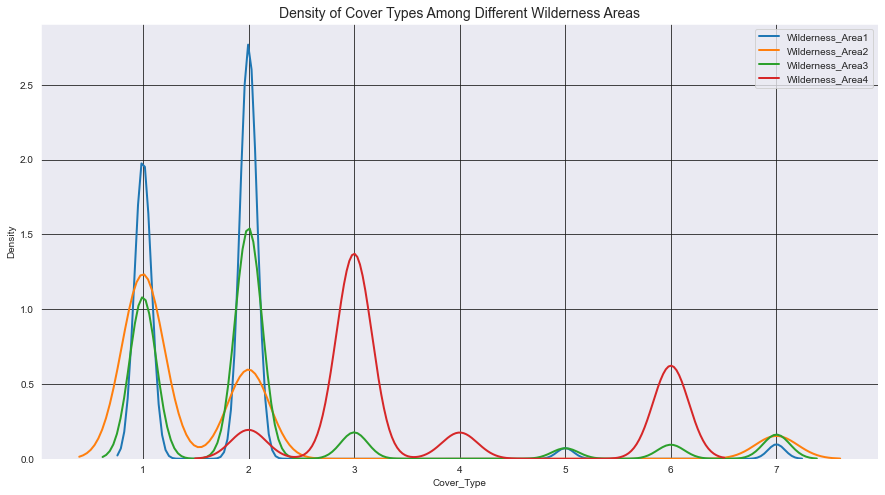

In [28]:
df_ctype['Wilderness_Area_Type'] = (df_ctype.iloc[:, 10:14] == 1).idxmax(1)
wilderness_areas = sorted(df_ctype['Wilderness_Area_Type'].value_counts().index.tolist())

for area in wilderness_areas:
    subset = df_ctype[df_ctype['Wilderness_Area_Type'] == area]
    sns.kdeplot(subset["Cover_Type"], label=area, linewidth=2)

plt.ylabel("Density")
plt.xlabel("Cover_Type")
plt.legend()
plt.title("Density of Cover Types Among Different Wilderness Areas", size=14);
plt.show()

- Spruce/Fir, Lodgepole Pine and Krummholz (Cover_Type 1, 2, 7) mostly found in Rawah, Neota and Comanche Peak Wilderness Area(1,2 and 3).
- It is highly likely to find Ponderosa Pine (Cover_Type 3) in Cache la Poudre Wilderness Area (4) rather than other areas.
- Cottonwood/Willow (Cover_Type 4) seems to be found only in Cache la Poudre Wilderness Area (4).
- Aspen (Cover_Type 5) is equally likely to come from wilderness area Rawah and Comanche (1,3).
- Douglas-fir (Cover_Type 6) can be found in any of the wilderness areas.

#### We can visualize this using a violin plot.

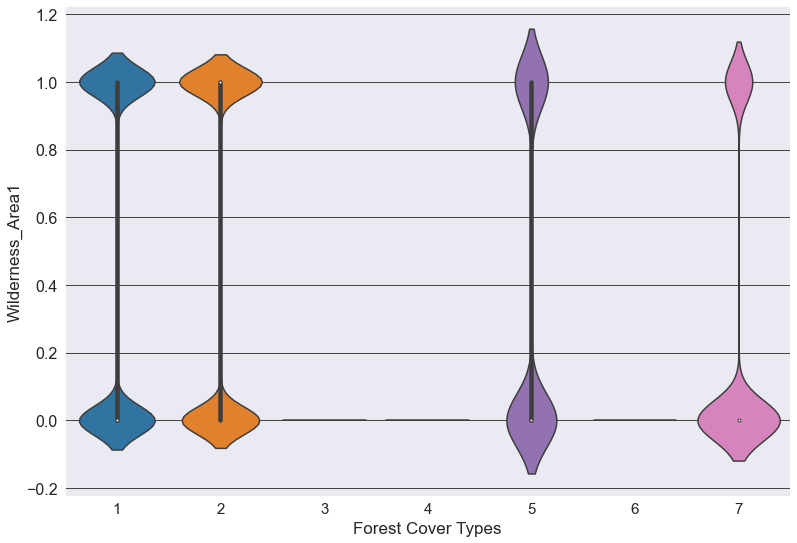

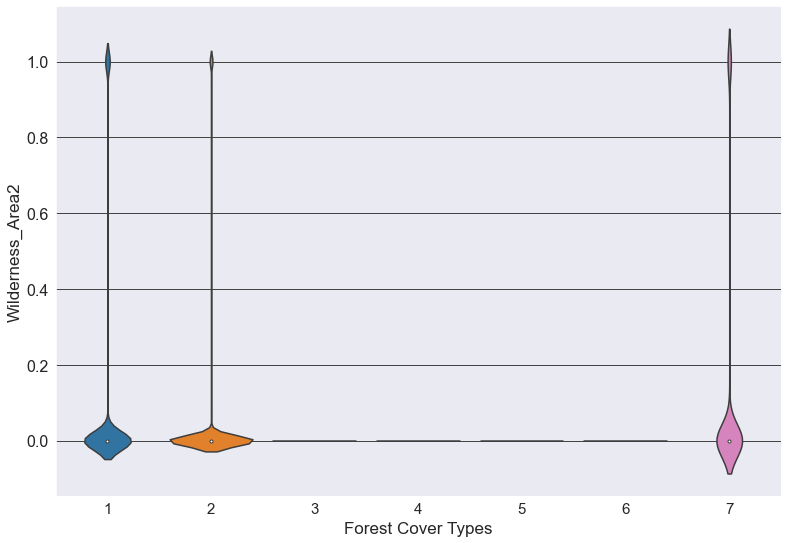

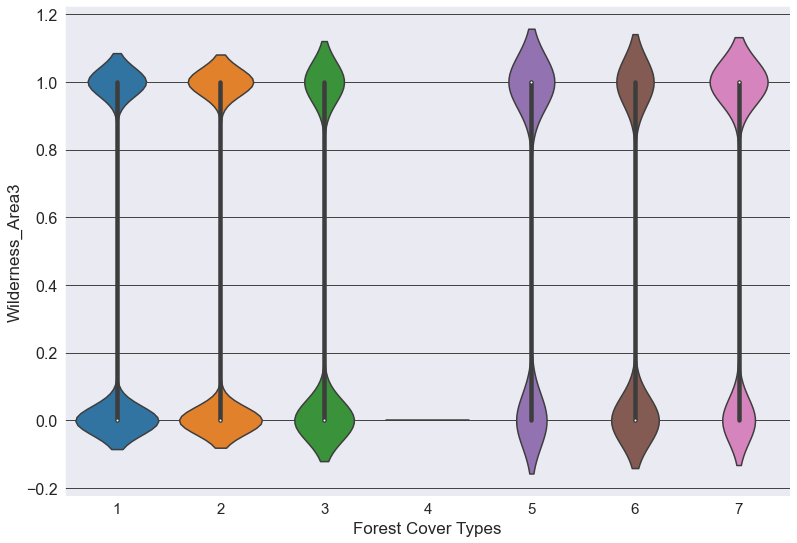

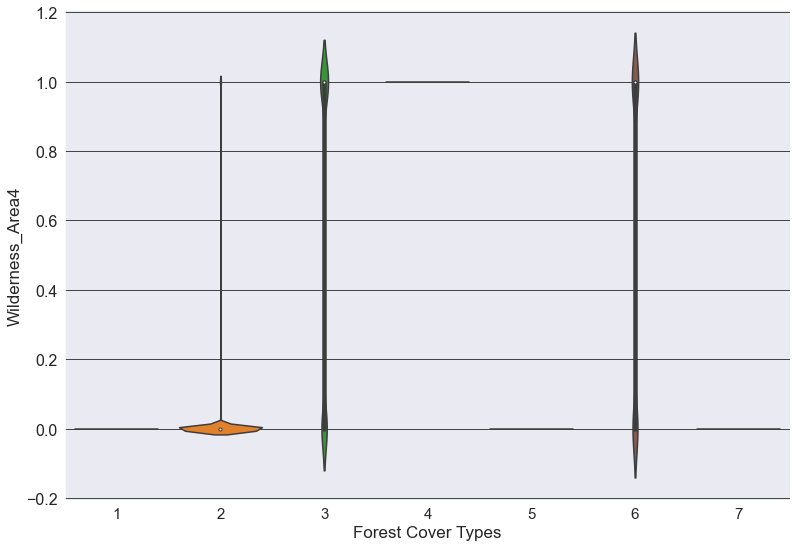

In [29]:
sns.set_style("darkgrid", {'grid.color': '.1'})
target = df_ctype['Cover_Type']
features = Wild_data.columns

for i in range(0, len(features)):
    plt.subplots(figsize=(13, 9))
    sns.violinplot(data = Wild_data, x=target, y = features[i])
    plt.xticks(size = 15)
    plt.yticks(size = 16)
    plt.xlabel('Forest Cover Types', size = 17)
    plt.ylabel(features[i], size = 17)
    plt.show()

The reason these plots look so different is because these features take on value ranging between `0 and 1`. 

- `Wilderness Area 1` belong to `forest cover type 1, 2, 5 and 7` while `wilderness area 3` shows presence in `all classes` except `Forest Cover Type 4`.

- `Wilderness Area 2 and 4` have less observations, their dense is less on `1` on all classes compared to other two `Wilderness Areas 1 and 3`.

### Soil_Type and Cover_Type relationship

In [30]:
def split_numbers_chars(row):
    head = row.rstrip('0123456789')
    tail = row[len(head):]
    return head, tail

def reverse_one_hot_encode(dataframe, start_loc, end_loc, numeric_column_name):
    dataframe['String_Column'] = (dataframe.iloc[:, start_loc:end_loc] == 1).idxmax(1)
    dataframe['Tuple_Column'] = dataframe['String_Column'].apply(split_numbers_chars)
    dataframe[numeric_column_name] = dataframe['Tuple_Column'].apply(lambda x: x[1]).astype('int64')
    dataframe.drop(columns=['String_Column','Tuple_Column'], inplace=True)

In [31]:
reverse_one_hot_encode(df_ctype, 16, 56, "Soil_Type")

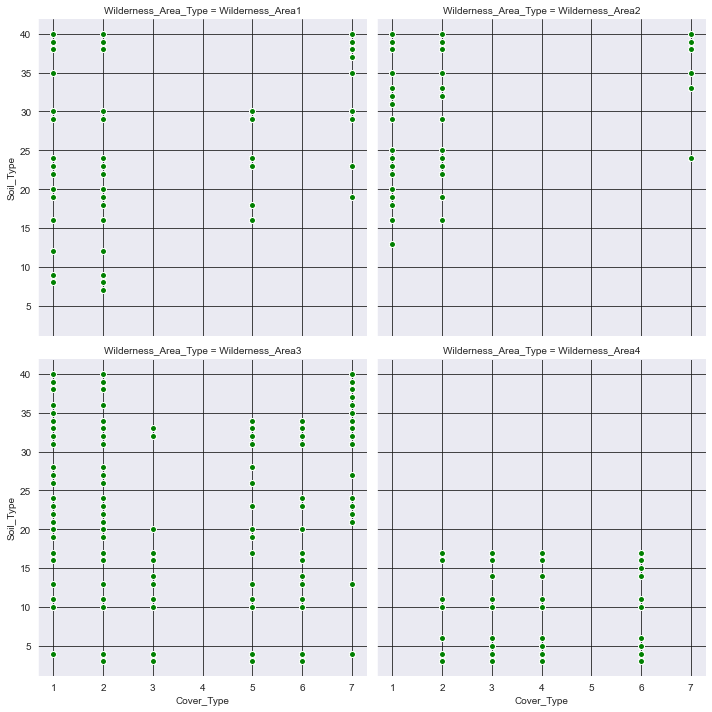

In [32]:
g = sns.FacetGrid(df_ctype, col="Wilderness_Area_Type", 
                  col_wrap=2, height=5, col_order=wilderness_areas)
g = g.map(plt.scatter,"Cover_Type", "Soil_Type", edgecolor="w", color="g")
plt.show()

- Wilderness Area 3 is more diverse in soil type and cover type.

- Only soil types 1 through 20 is represented in Wilderss Area 4, thus cover types in that area grew with them.

- Cover type 7 seems to grow with soil types 25 through 40.

- Cover Type 5 and 6 can grow with most of the soil types.

- Cover Type 3 loves soil type 0 through 15.

- Cover Type 1 and 2 can grow with any soil type.

In [33]:
df_ctype = df_ctype.drop('Wilderness_Area_Type',axis=1)

In [ ]:
df_ctype = df_ctype.drop('Soil_Type',axis=1)

#### We can visualize this using a violin plot.

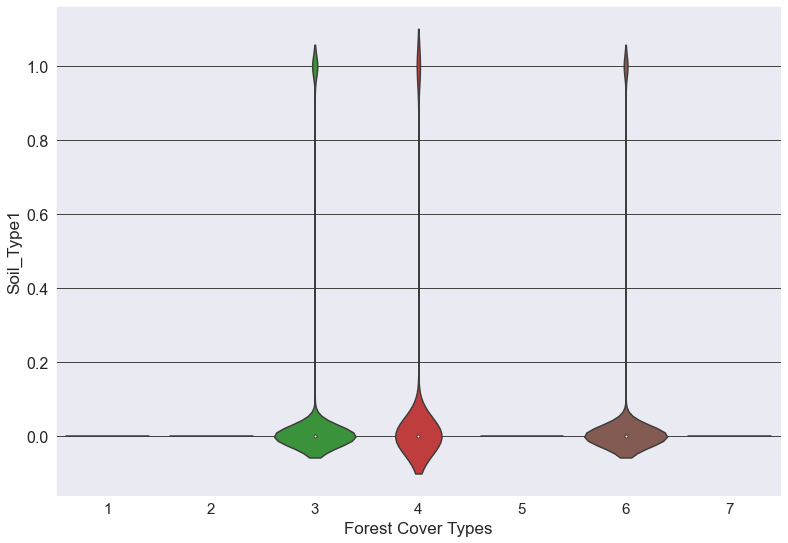

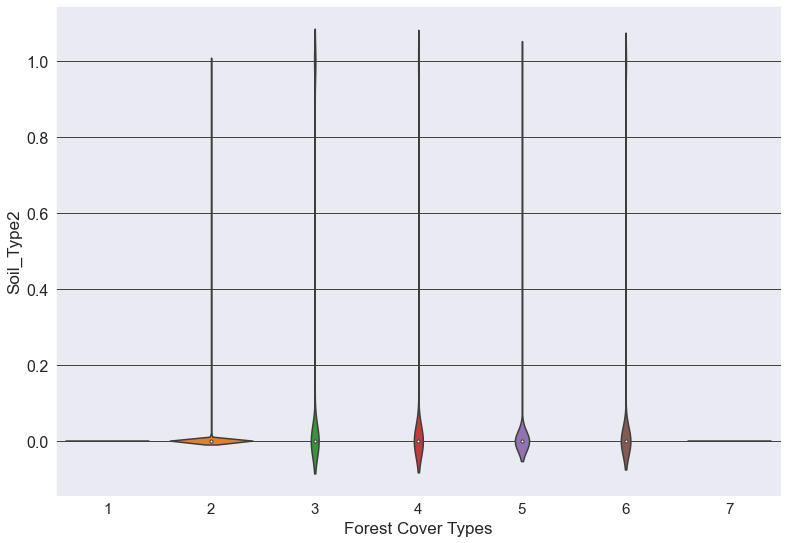

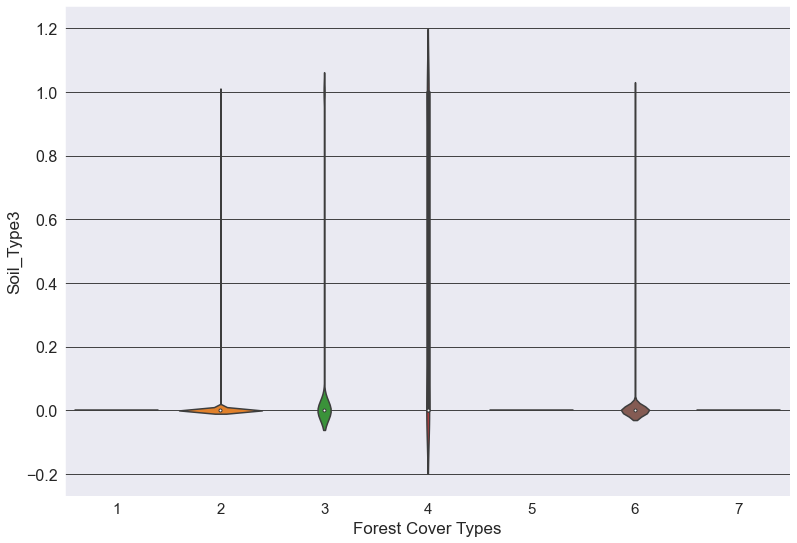

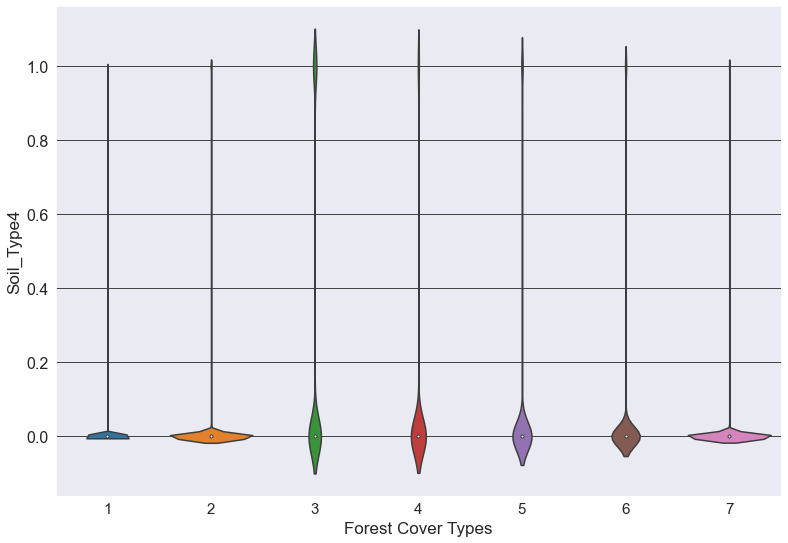

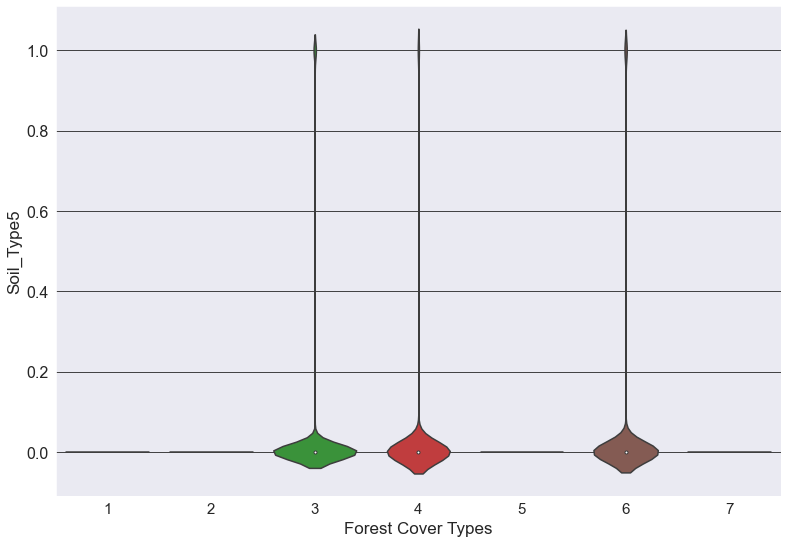

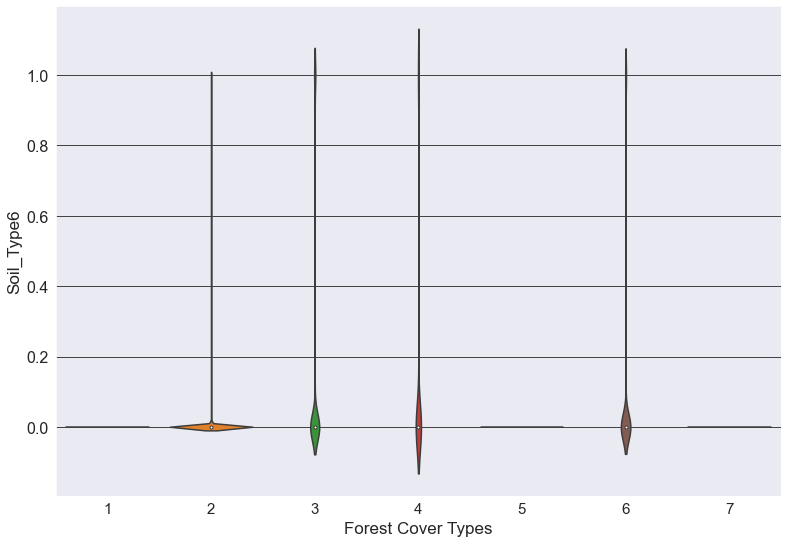

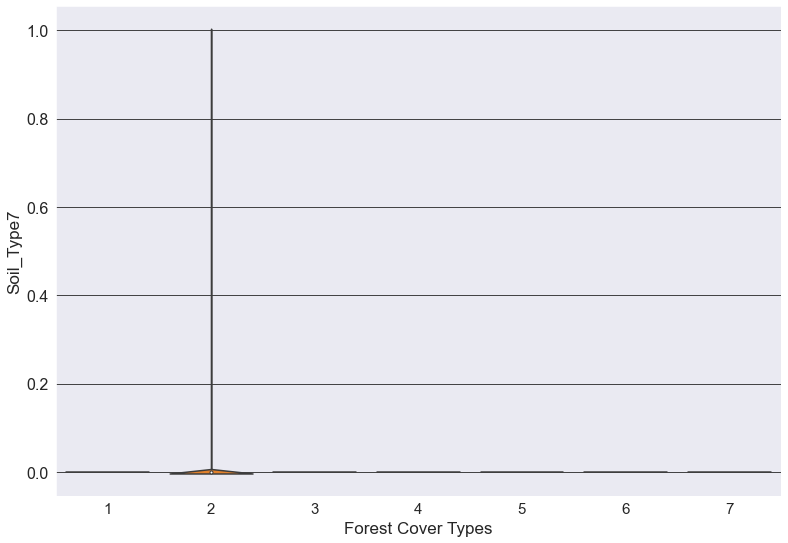

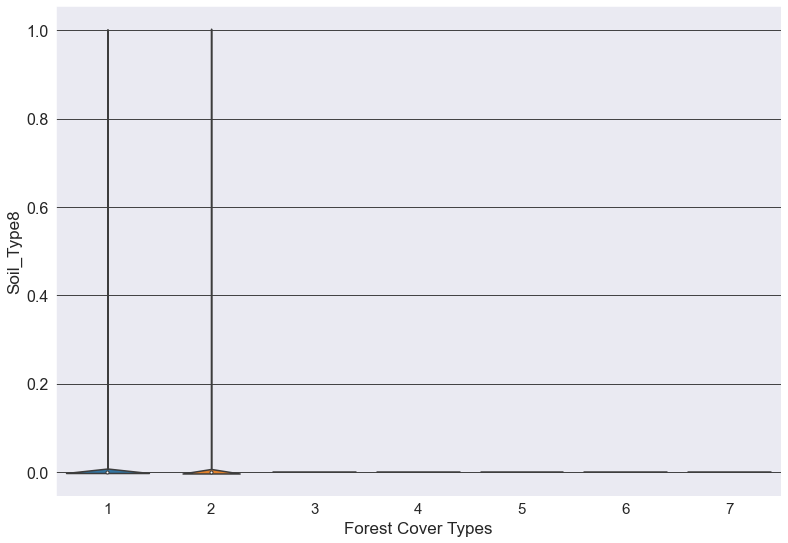

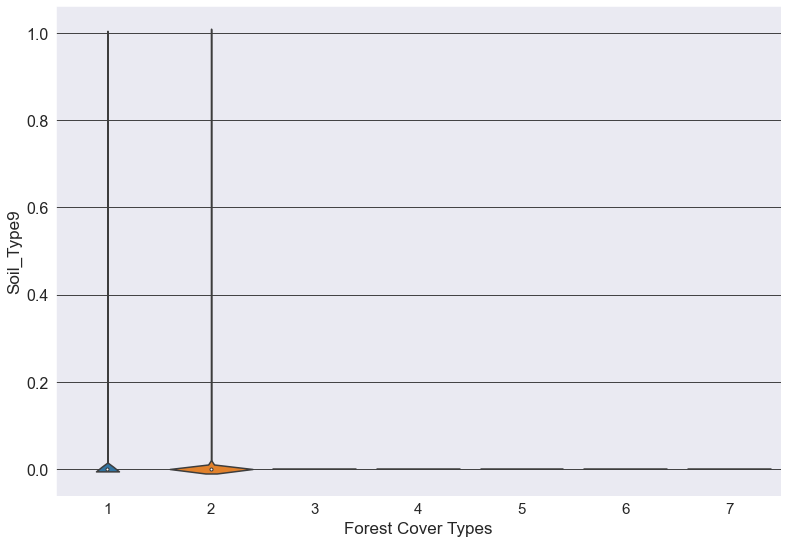

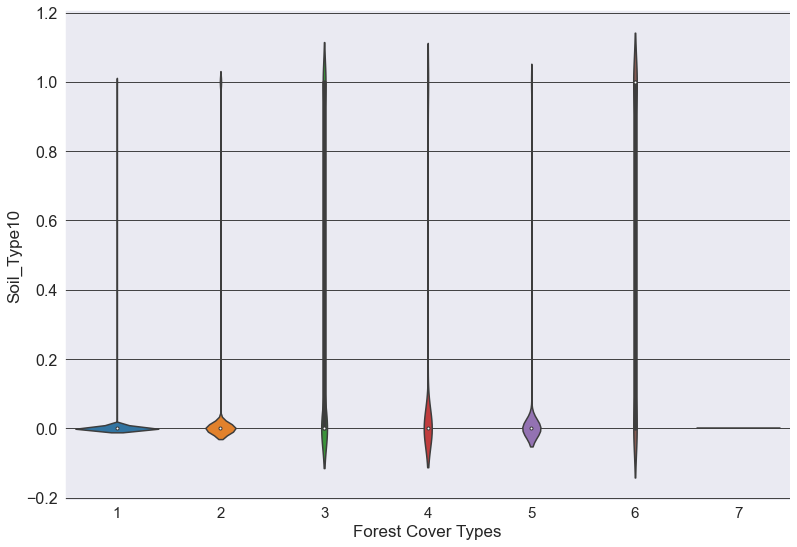

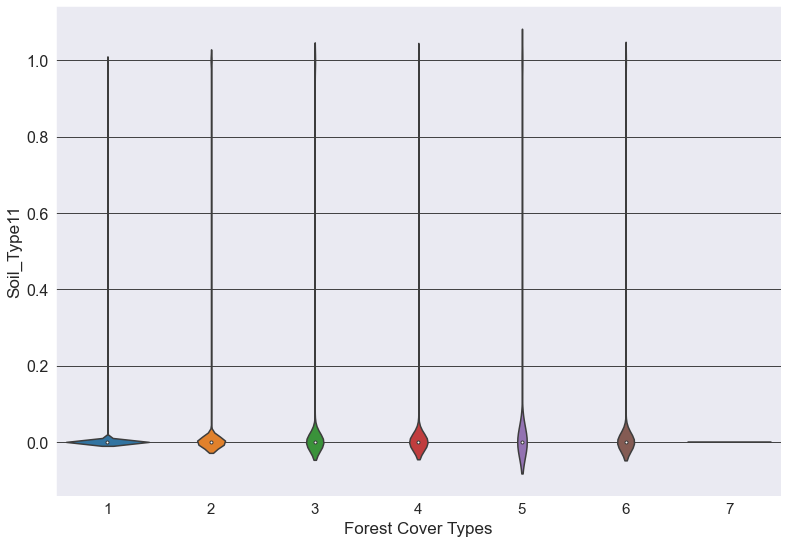

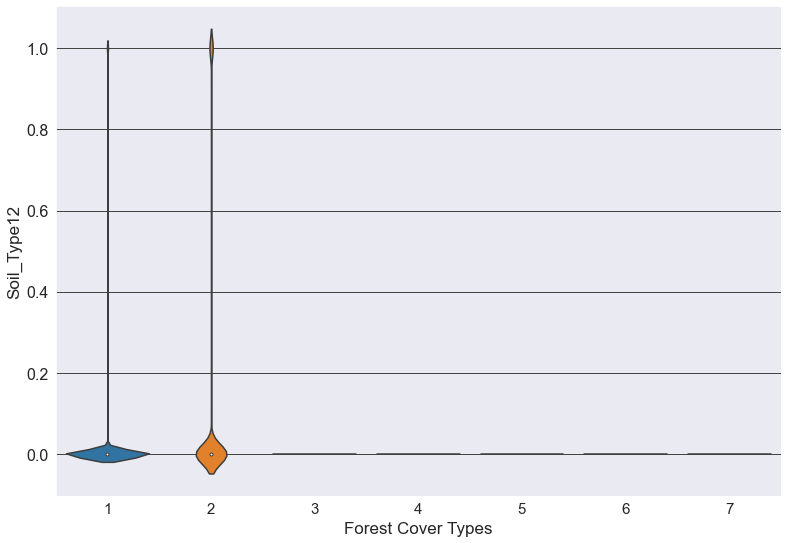

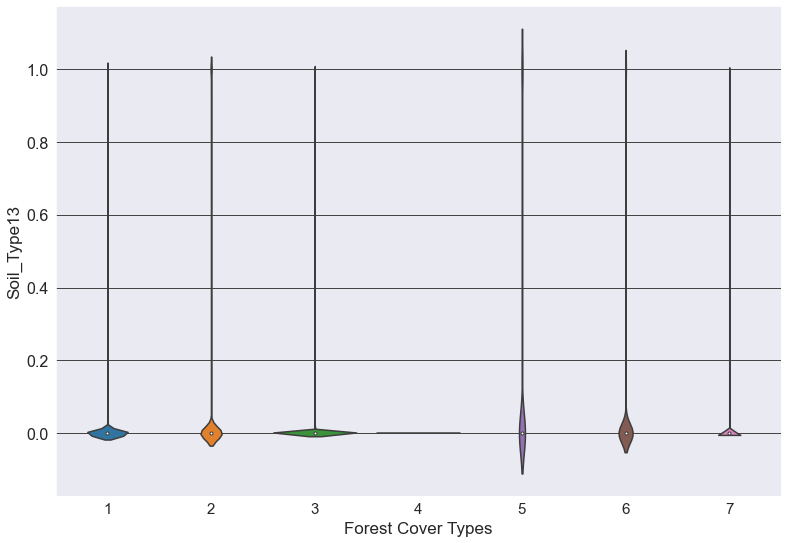

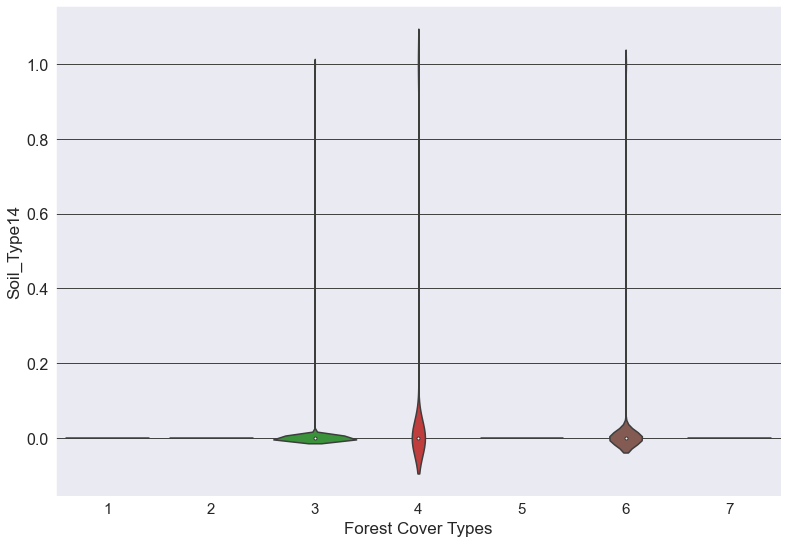

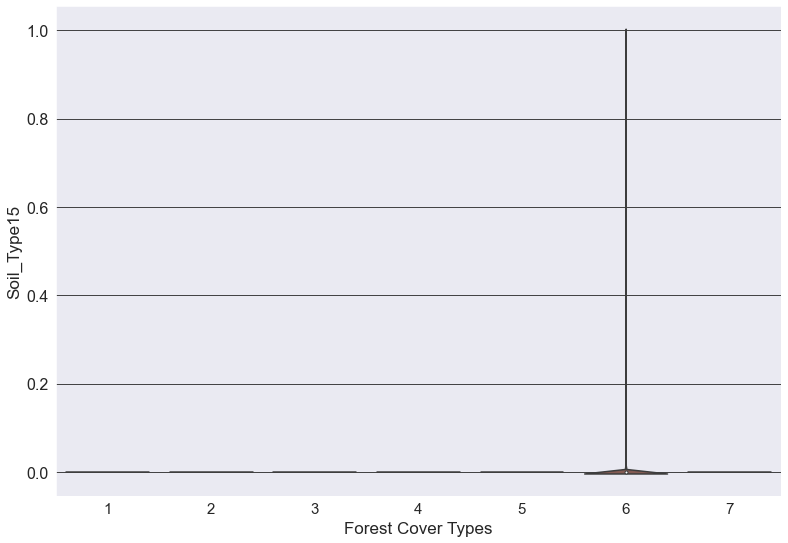

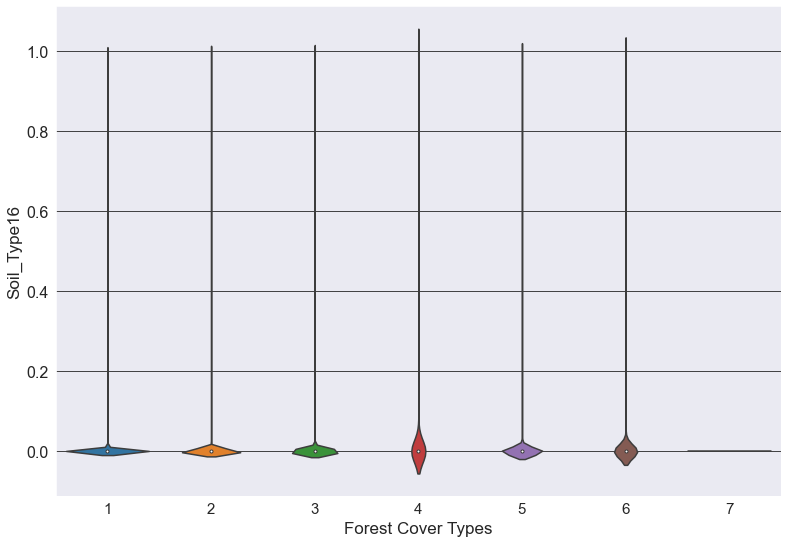

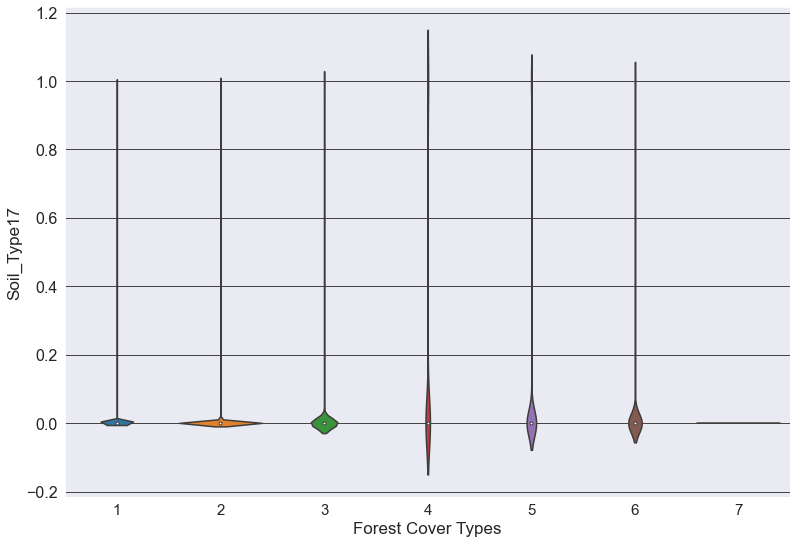

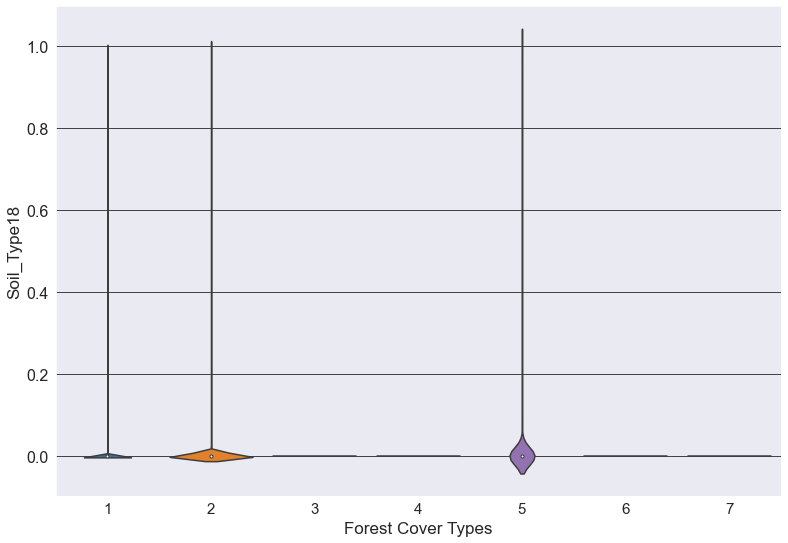

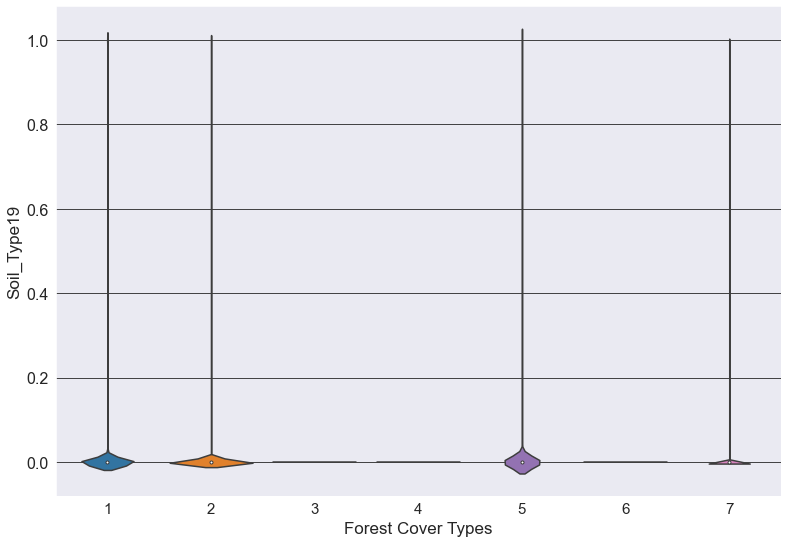

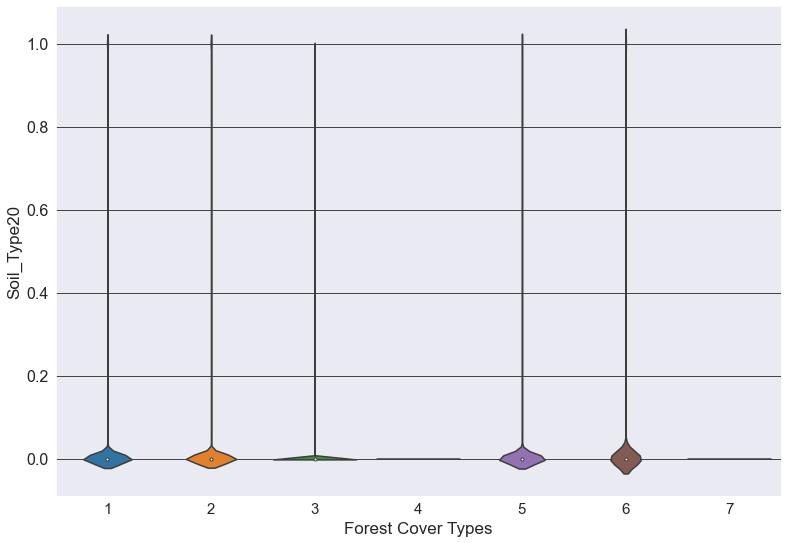

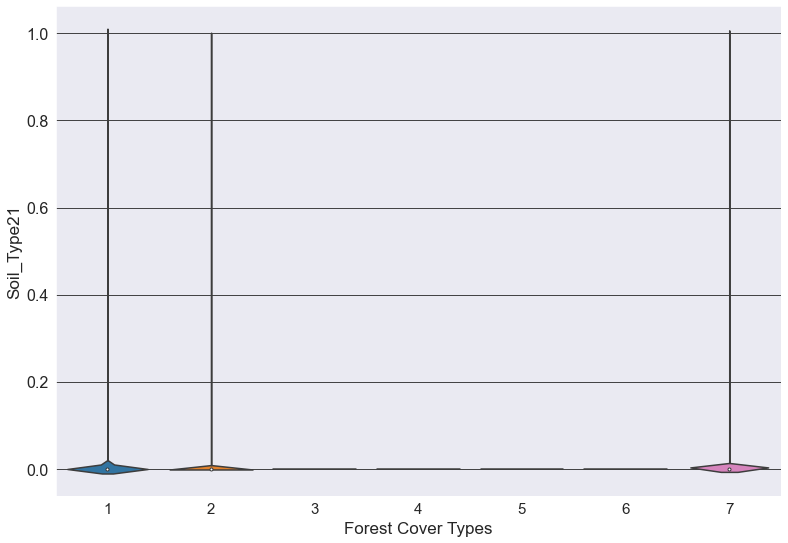

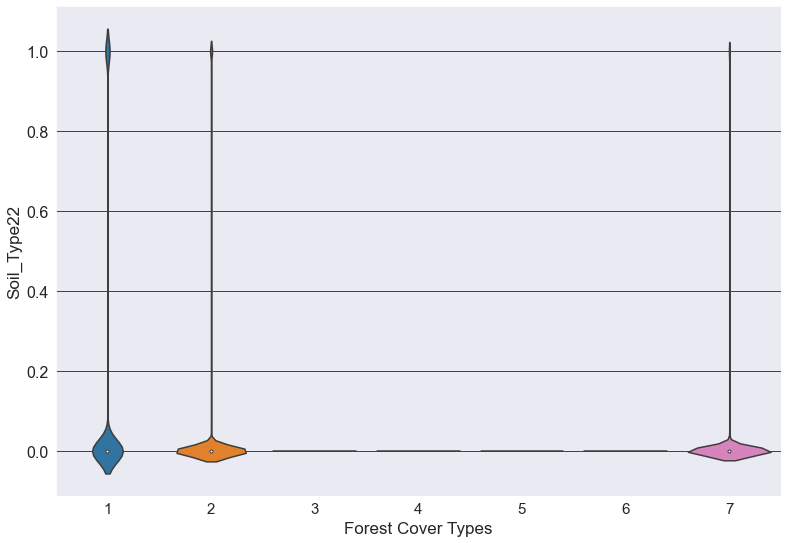

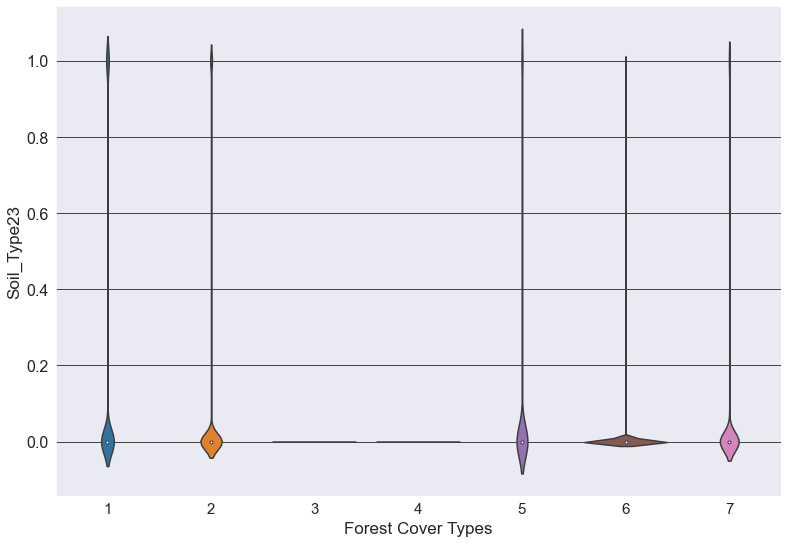

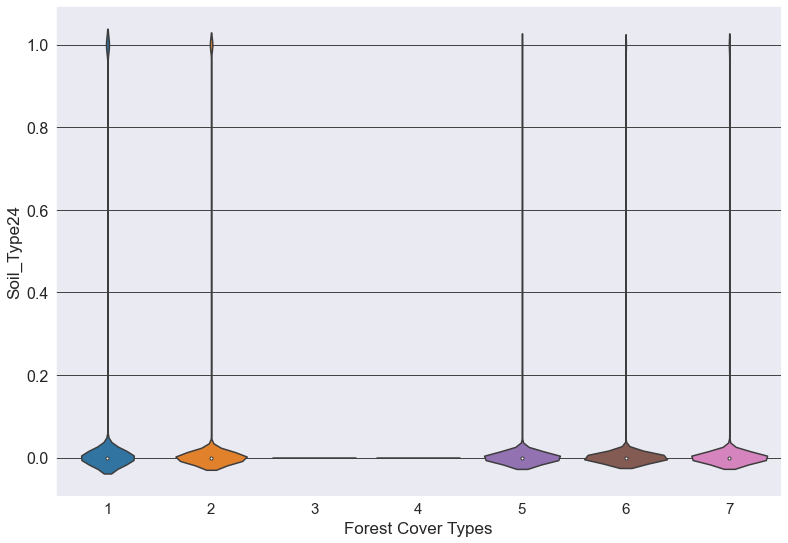

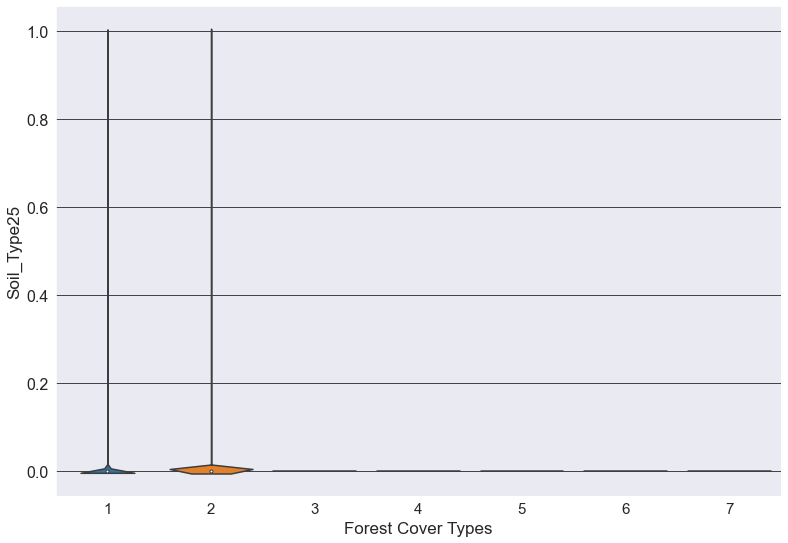

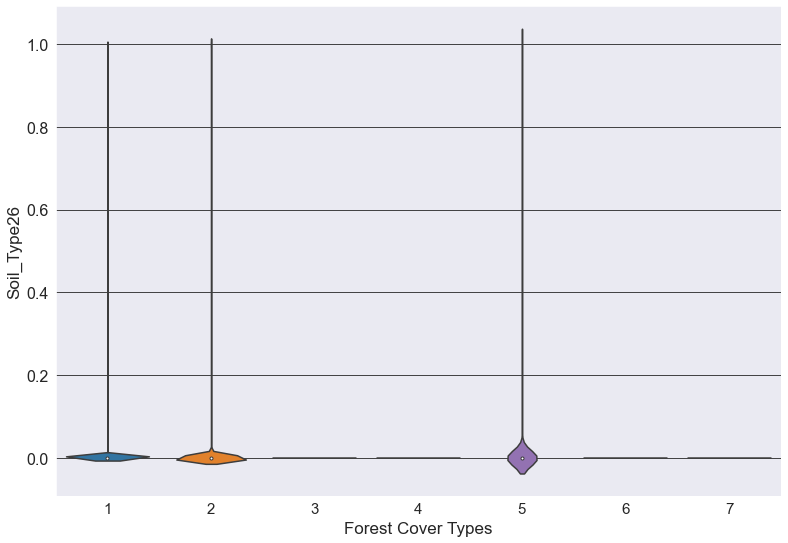

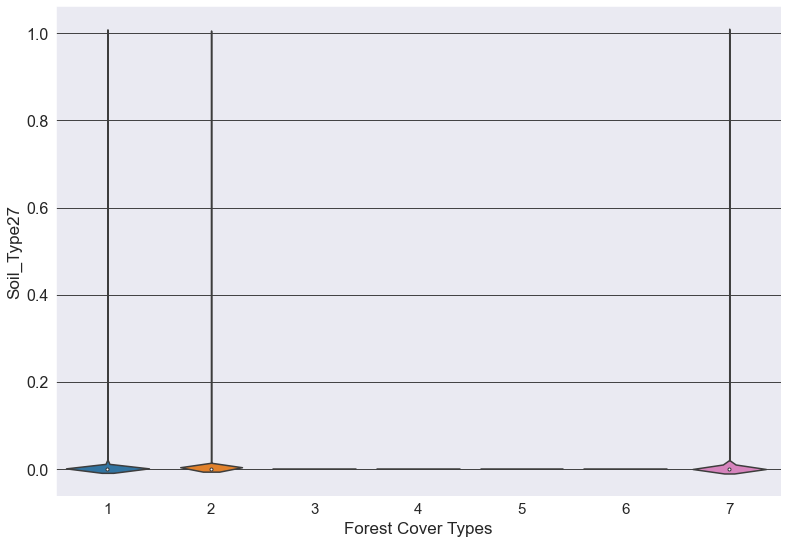

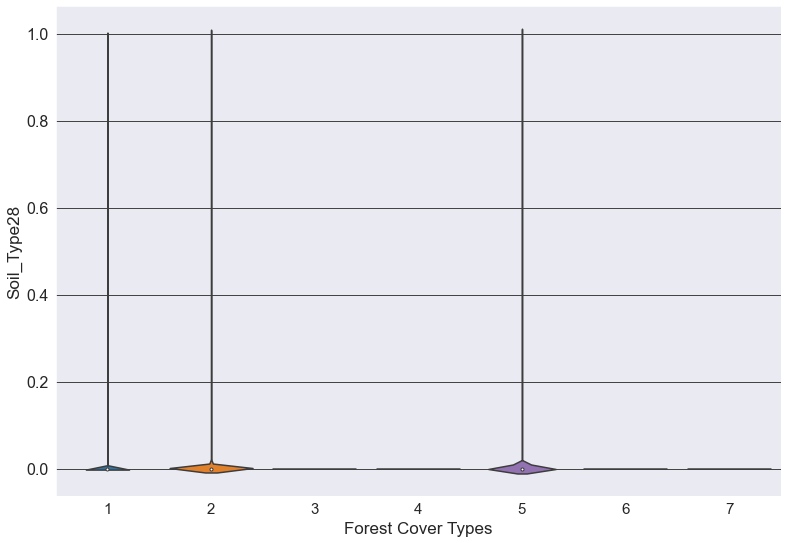

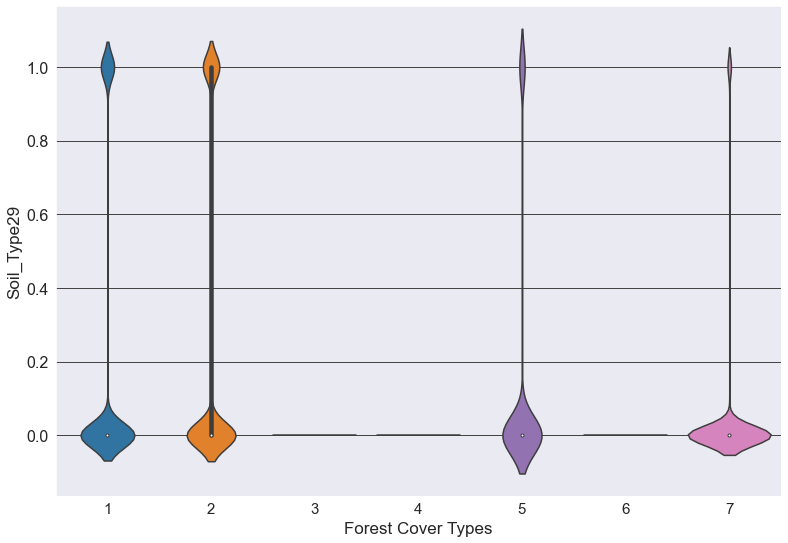

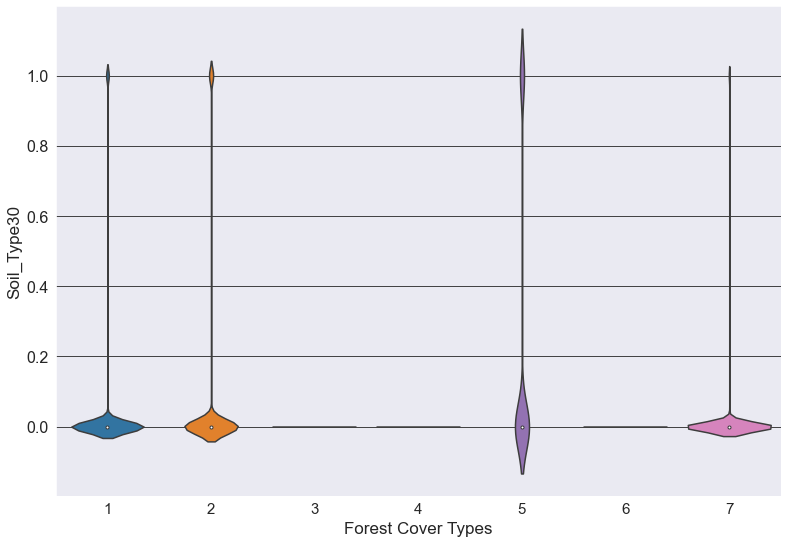

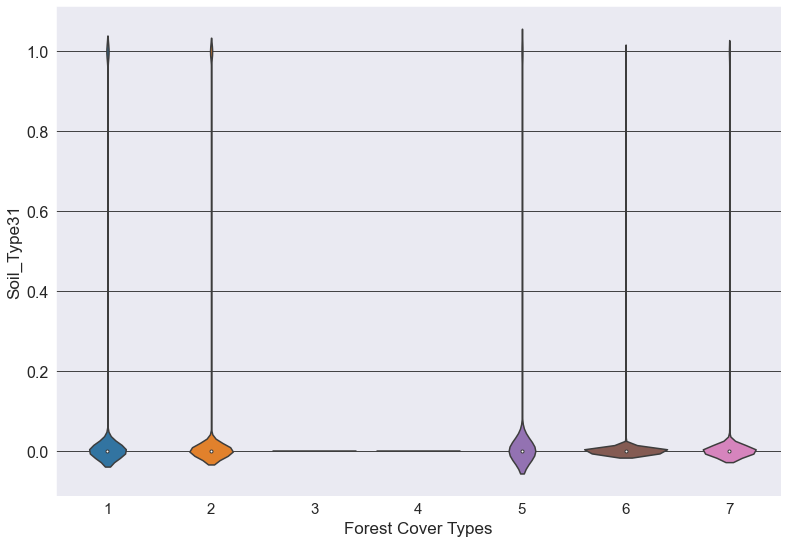

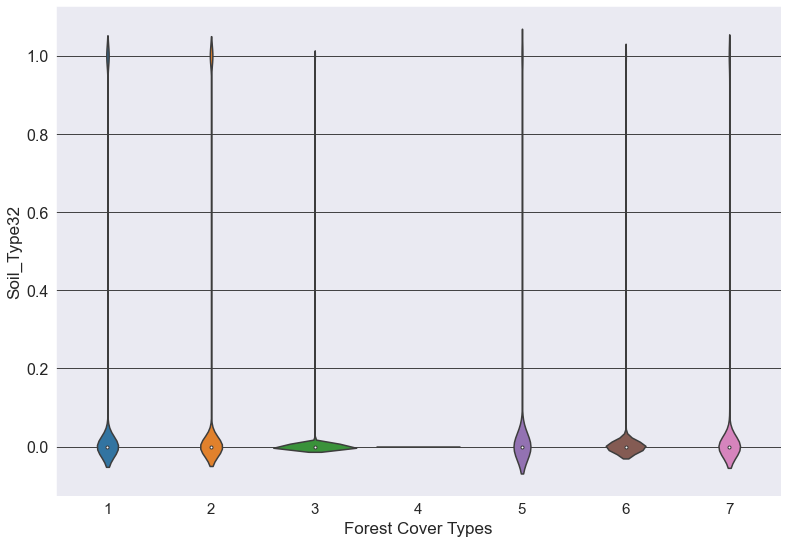

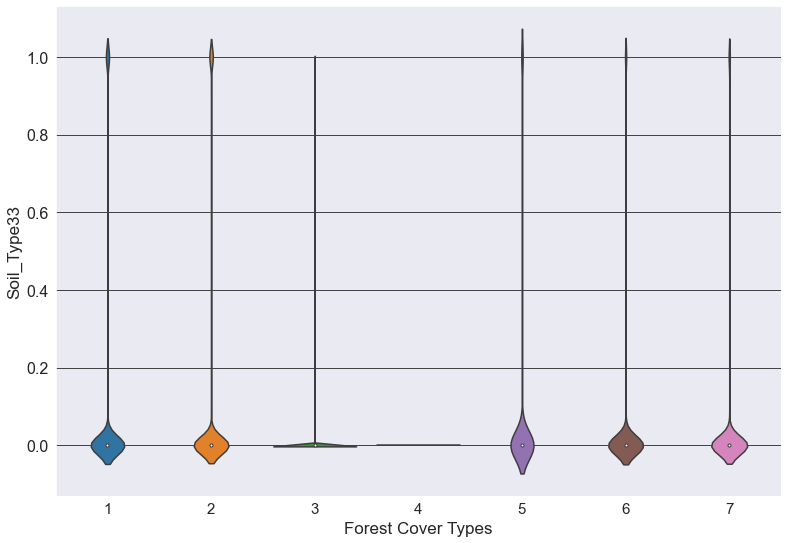

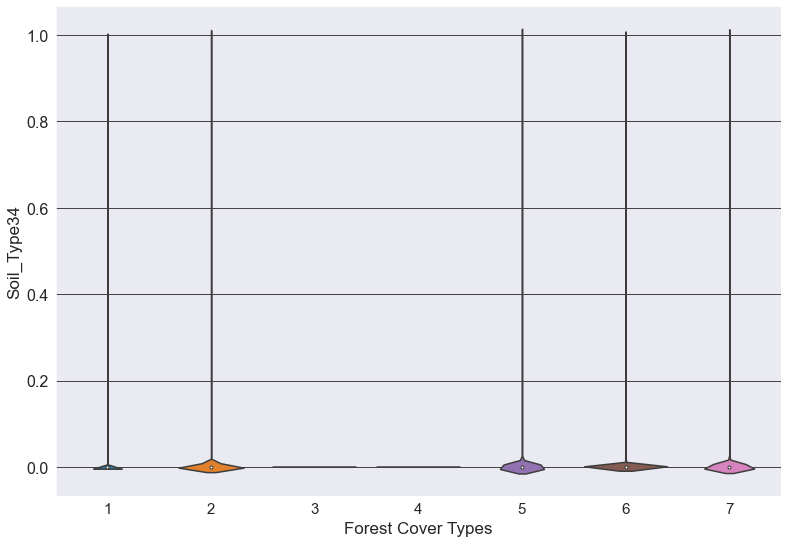

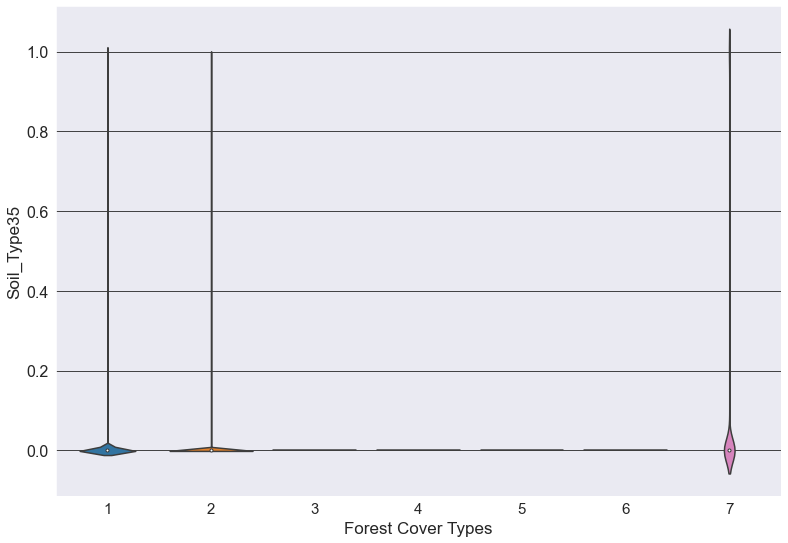

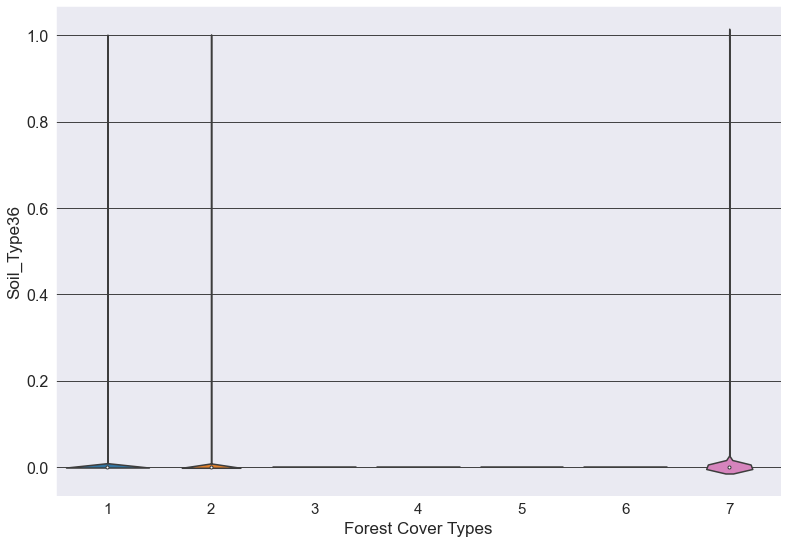

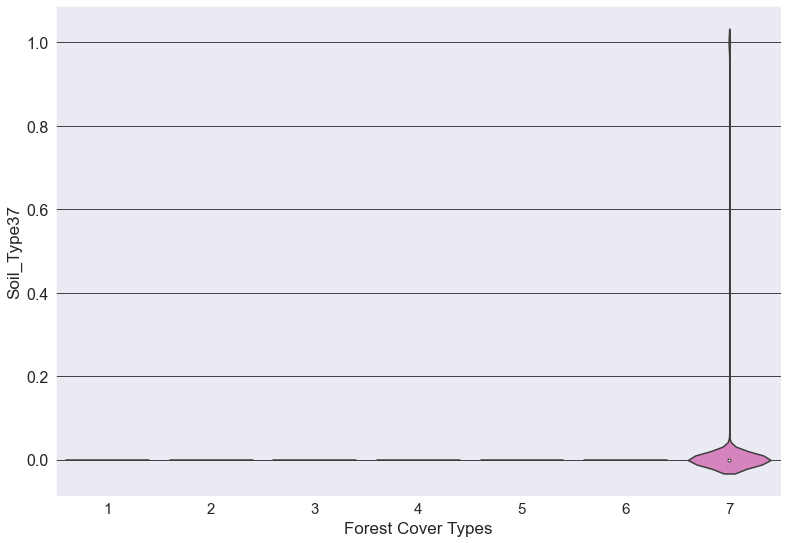

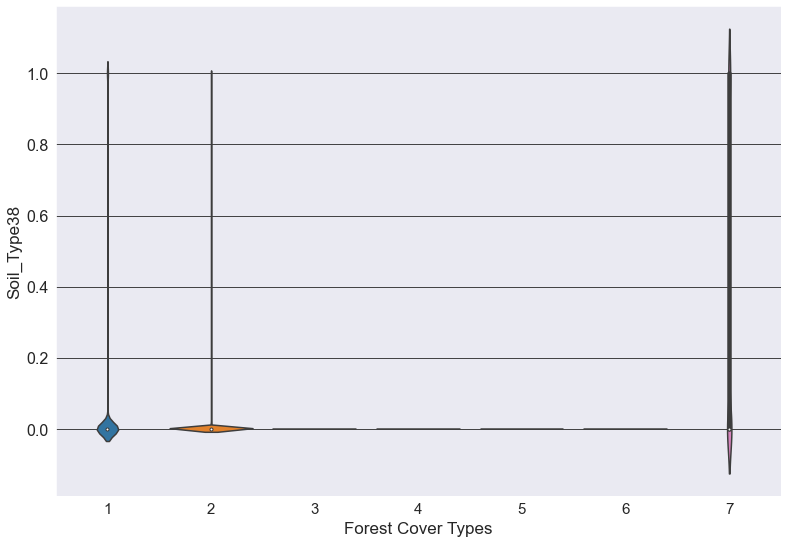

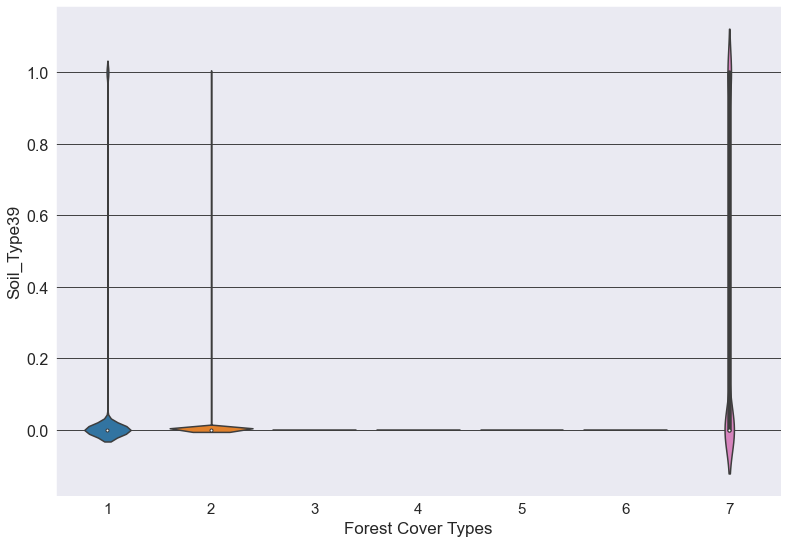

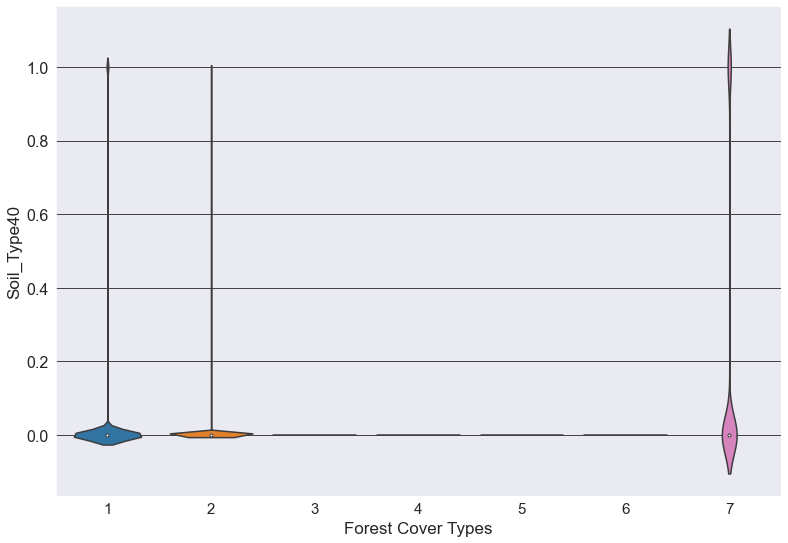

In [96]:
sns.set_style("darkgrid", {'grid.color': '.1'})
target = df_ctype['Cover_Type']
features = Soil_data.columns

for i in range(0, len(features)):
    plt.subplots(figsize=(13, 9))
    sns.violinplot(data=Soil_data, x=target, y = features[i])
    plt.xticks(size = 15)
    plt.yticks(size = 16)
    plt.xlabel('Forest Cover Types', size = 17)
    plt.ylabel(features[i], size = 17)
    plt.show()

**Inference:**

- `Soil Type 4` is the only Soil Type that has presence in `all classes` of `forest cover types`.

- `Soil Type 7, 15 and 37` belong to `forest class 2, 6 and 7` respectively. They also happen to have fewest observations in all Soil Types. Having observations which has presence of either `Soil Type 7, 15 and 37` has most likely chance of being present in `forest class type 2, 6 and 7` respectively. I think this is an important feature though they have less observations but they do give us a valuable information here.

- `Forest Cover Type 4` seems to have less presence compared to all classes for `Soil Types` having least observation too.

### Feature Correlation

**Now Let us see how much each features are correlated with each other...**

Since part of our data is binary, we will exclude binary data from our dataset and only find correlation matrix of numerical data becuase correlation requires continous data.

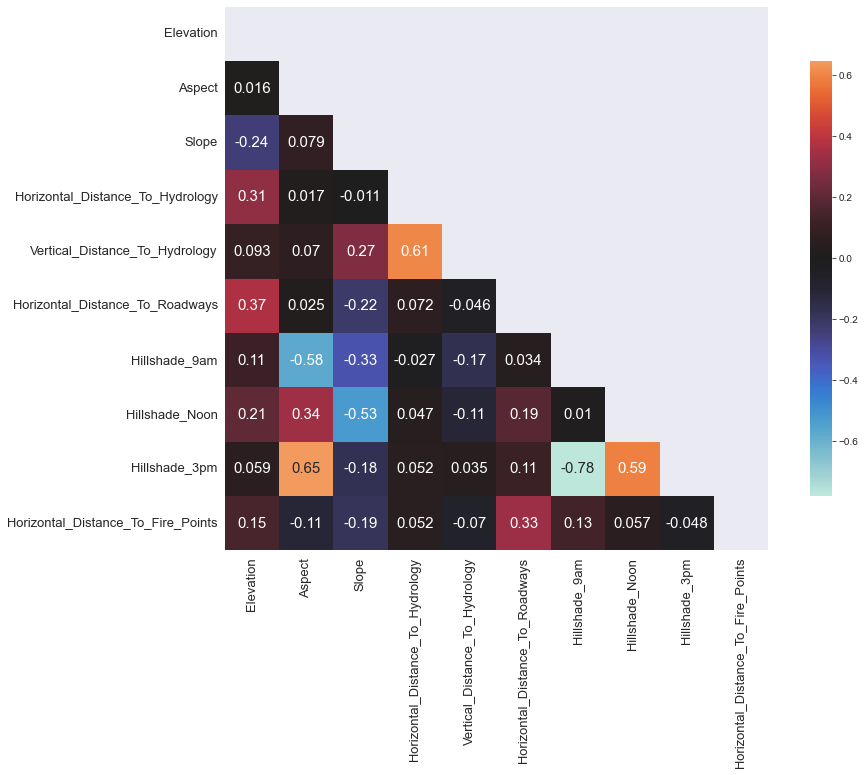

In [97]:
plt.subplots(figsize=(15,10))

feature_corr = df_ctype_num.corr()

mask = np.zeros_like(feature_corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

sns.heatmap(feature_corr, mask=mask, center=0, square=True,annot=True,annot_kws={'size':15},cbar_kws={'shrink':.8})

plt.xticks(size=13)
plt.yticks(size=13)

plt.show()

- Features that have less or no correlation are colored `black` while features with positive correlation are colored `orange` and `blue` for negative correlation.

- As we can see from the above figure, correlation values of the features are given in their respective boxes. 

- `Hillshade_3pm and Hillshade_9am` show highly `negative correlation` while `hillshade_3pm and Aspect` show highest positive correlation.

- `Hillshade_3pm and Aspect` also had almost normal distribution compared to forest cover types classes. (#Feature-Visualization))

- Other features which have correlations are `Vertical and Horizonal Distance to Hydrology`, `Hillshade_3pm and Hillshade_Noon`, `Hillshade_9am and Aspect` and `Hillshade_Noon and Slope`. So in total we have `6` pairs of correlation.

- Less Correlated value tell us that the features have different valueable information to tell us and model, hence important features for predictions.

### **Plotting scatter plots of all features that have correlation greater than 0.5 with each other.**

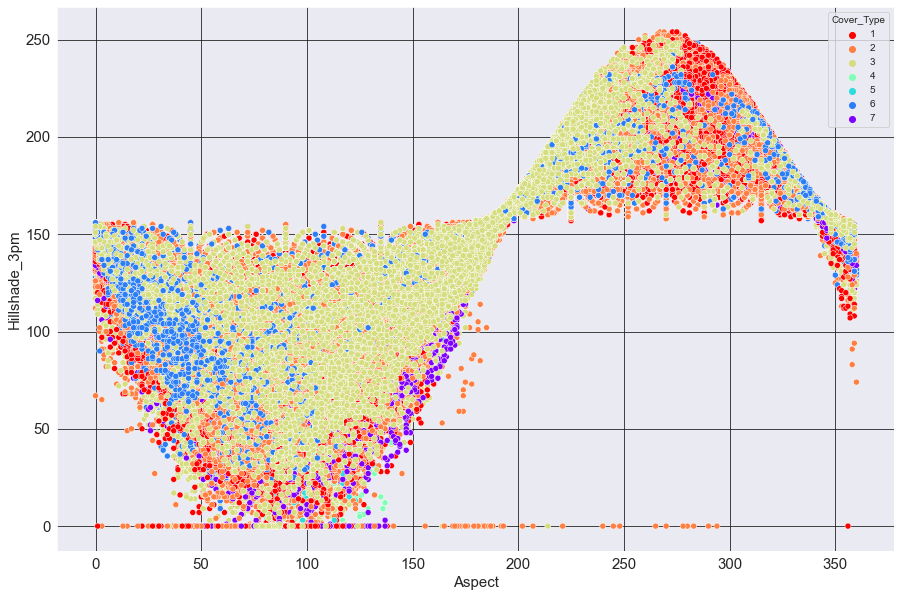

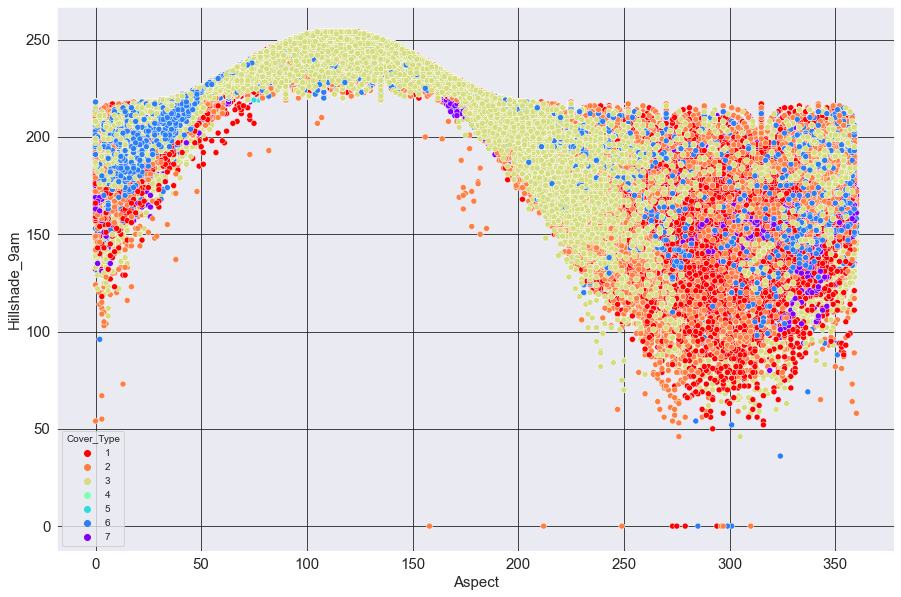

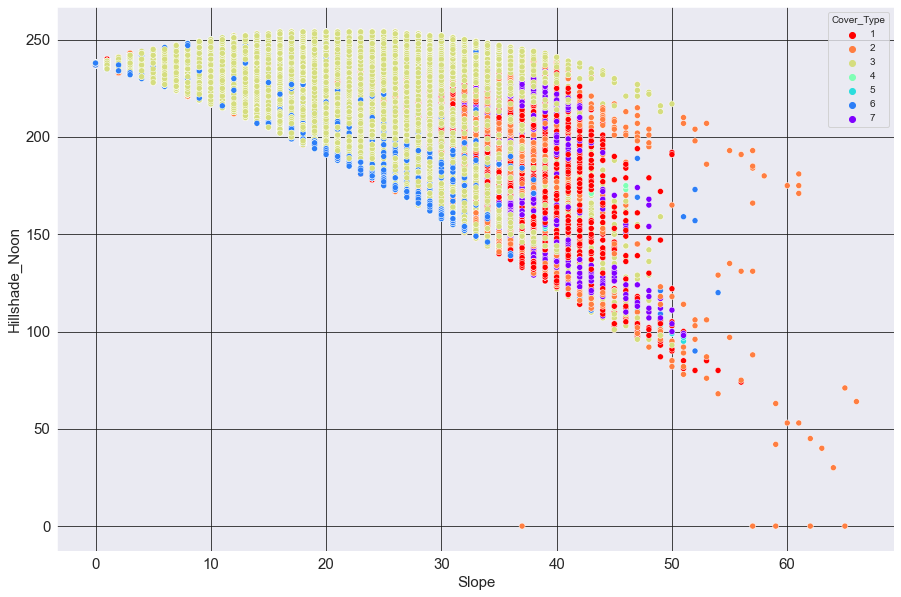

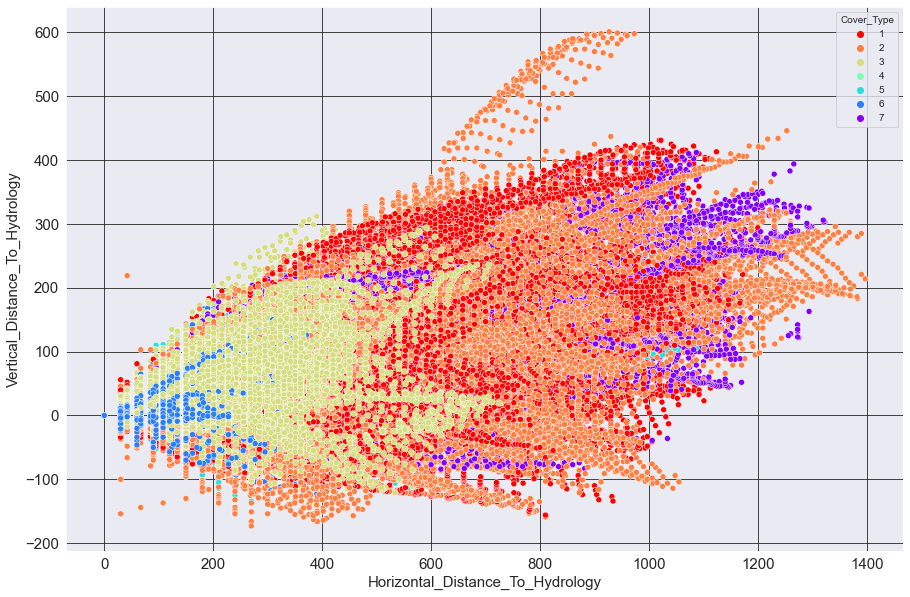

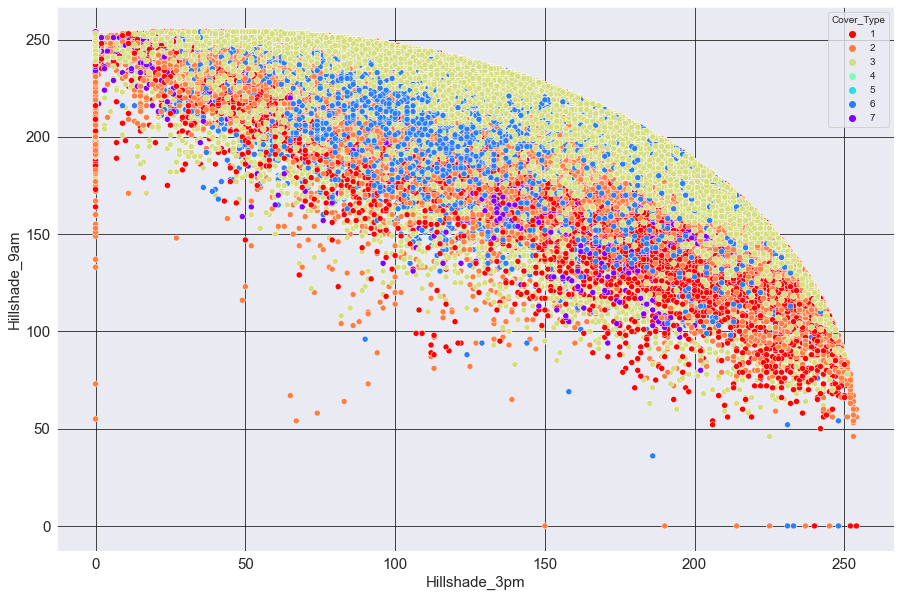

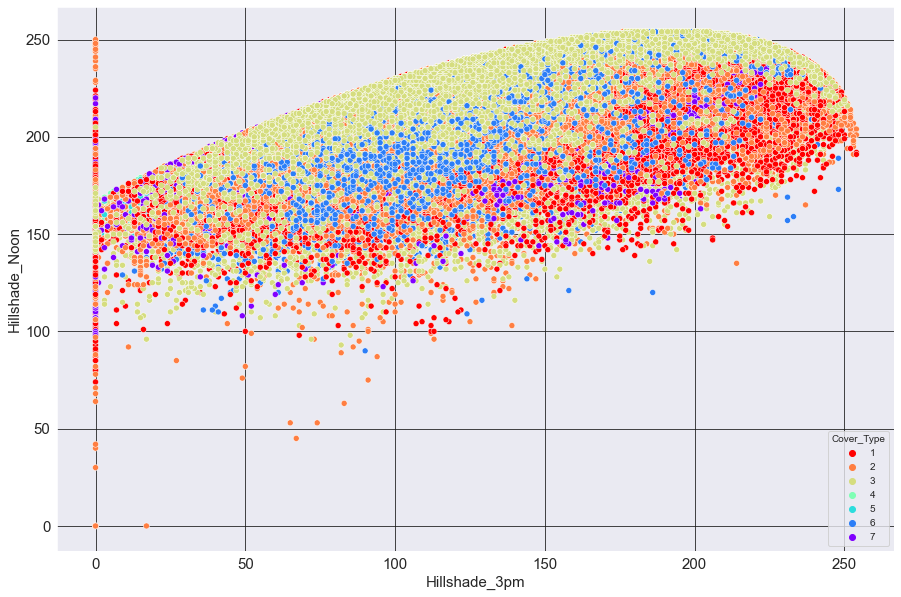

In [98]:
sns.set_style("darkgrid",{'grid.color':'.1'})

data_corr_list = [['Aspect','Hillshade_3pm'], ['Aspect', 'Hillshade_9am'], ['Slope', 'Hillshade_Noon'], ['Horizontal_Distance_To_Hydrology', 'Vertical_Distance_To_Hydrology'], 
                 ['Hillshade_3pm', 'Hillshade_9am'], ['Hillshade_3pm', 'Hillshade_Noon']]

for i,j in data_corr_list:
    
    plt.subplots(figsize=(15,10))
    
    sns.scatterplot(data=df_ctype, x=i, y=j, hue='Cover_Type',legend = 'full', palette='rainbow_r')
    
    plt.xticks(size=15)
    plt.yticks(size=15)
    
    plt.xlabel(i,size=15)
    plt.ylabel(j,size=15)
    
    plt.show()

- `Hillshade_3pm and Aspect` represent relationship of a `sigmoid function`. The data points at the boundaries of the figure mostly belong to `forest cover type class 1` while `class 3` takes on most of datapoints in the figure followed by `forest cover type class 6`. The datapoints when `Hillshade_3pm` is `0` belongs to `class 1,2,3 or 7` regardless of what `Aspect` values it has.

- The figure `Hillshade_9am and Aspect` also represent relationship of a `sigmoid function` just its flipped over the y-axis. `Class type 3` has the highest observation here followed by the `class type 1 and 6`.

- `Hillshade_Noon and Slope` have a horizontal `'V' shaped` representation. Lower degrees represent `class 4 and 6` while high degree values represent `class 1, 2 and 7` also we can see decrease in `Hillshade_Noon` value as slope increases and it geographically makes sense.

- `Vertical and Horizontal Distance to Hydrology` represent a `linear` but spreaded out type, not a single line fit to all datapoints. `Class type 7 and 2` have more observation here and spreaded out while `class type 3 and 6` are densely packed between the range `0-800m` of `Horizontal Distance to Hydrology`.

- ` Hilshade_9am and Hillshade_3pm` figure represents relationship of a sliced-out part of a circle where top most of the datapoints belong to `class 3` and middle and bottom area belong to rest of the classes.

- `Hillshade_Noon and Hillshade_3pm` have similar observation as described before just a difference here is that it's flipped over y-aixs. We also see similar patterns of datapoints too as before.

## Data Engineering

### Observation Cleaning

There's a possibility where we can have an observation where `Soil Type` and `Wilderness Area` are recorded as present for more than one type or maybe none.

Below code will show us if we have any..

**Checking for Wilderness Area.**

In [99]:
more_count = 0
none_count = 0
total = 0

for index, row in Wild_data.iterrows():
    total = row.sum(axis=0)
    
    if total > 1:
        more_count =+ 1
        total = 0
        break
        
    if total == 0:
        none_count =+ 1
        total = 0      

print('We have ', more_count, ' observations that shows presence in more than 1 Wilderness Area.')
print('We have ' ,none_count, ' observations that shows no presence in any Wilderness Area.')

We have  0  observations that shows presence in more than 1 Wilderness Area.
We have  0  observations that shows no presence in any Wilderness Area.


### Checking for Soil Type

In [100]:
more_count = 0
none_count = 0
total = 0

for index,row in Soil_data.iterrows():
    total = row.sum(axis=0)
    
    if total > 1:
        more_count =+ 1
        total = 0
        break
    
    if total == 0:
        none_count =+ 1
        total = 0
        
print('We have ', more_count, ' observations that shows presence in more than 1 Soil Area.')
print('We have ' ,none_count, ' observations that shows no presence in any Soil Area.')

We have  0  observations that shows presence in more than 1 Soil Area.
We have  0  observations that shows no presence in any Soil Area.


### Statistical test for Continous Variables

In [106]:
df_ctype_num.columns

Index(['Elevation', 'Aspect', 'Slope', 'Horizontal_Distance_To_Hydrology',
       'Vertical_Distance_To_Hydrology', 'Horizontal_Distance_To_Roadways',
       'Hillshade_9am', 'Hillshade_Noon', 'Hillshade_3pm',
       'Horizontal_Distance_To_Fire_Points'],
      dtype='object')

In [107]:
df_ctype['Cover_Type'].unique()

array([5, 2, 1, 7, 3, 6, 4], dtype=int64)

In [108]:
from scipy.stats import f_oneway

The null and alternative hypothesis is given as:
<p style='text-indent:20em'> <strong> $H_{0}$: The averages of all Elevations are the same. </strong></p>
<p style='text-indent:20em'> <strong> $H_{1}$: At least one Elevation has a different average. </strong></p>

In [109]:
e_1 = df_ctype[df_ctype['Cover_Type']==1]['Elevation']
e_2 = df_ctype[df_ctype['Cover_Type']==2]['Elevation']
e_3 = df_ctype[df_ctype['Cover_Type']==3]['Elevation']
e_4 = df_ctype[df_ctype['Cover_Type']==4]['Elevation']
e_5 = df_ctype[df_ctype['Cover_Type']==5]['Elevation']
e_6 = df_ctype[df_ctype['Cover_Type']==6]['Elevation']
e_7 = df_ctype[df_ctype['Cover_Type']==7]['Elevation']

f_test, p_val = f_oneway(e_1,e_2,e_3,e_4,e_5,e_6,e_7)

print('Test statistic:', f_test)
print('p-value:', p_val)

Test statistic: 155306.39899949232
p-value: 0.0


The above outputs shows that the P-value is less than 0.05. Thus we Reject the Null hypothesis and conclude that atleast one Elevation has a different average

The null and alternative hypothesis is given as:
<p style='text-indent:20em'> <strong> $H_{0}$: The averages of all Aspect are the same. </strong></p>
<p style='text-indent:20em'> <strong> $H_{1}$: At least one Aspect has a different average. </strong></p>

In [110]:
a1 = df_ctype[df_ctype['Cover_Type']==1]['Aspect']
a2 = df_ctype[df_ctype['Cover_Type']==2]['Aspect']
a3 = df_ctype[df_ctype['Cover_Type']==3]['Aspect']
a4 = df_ctype[df_ctype['Cover_Type']==4]['Aspect']
a5 = df_ctype[df_ctype['Cover_Type']==5]['Aspect']
a6 = df_ctype[df_ctype['Cover_Type']==6]['Aspect']
a7 = df_ctype[df_ctype['Cover_Type']==7]['Aspect']

f_test,p_val = f_oneway(a1,a2,a3,a4,a5,a6,a7)

print('Test Statistics:', f_test)
print('p-value:', p_val)

Test Statistics: 446.67455125773637
p-value: 0.0


The above outputs shows that the P-value is less than 0.05. Thus we Reject the Null hypothesis and conclude that atleast one Aspect has a different average

The null and alternative hypothesis is given as:
<p style='text-indent:20em'> <strong> $H_{0}$: The averages of all slope are the same. </strong></p>
<p style='text-indent:20em'> <strong> $H_{1}$: At least one slope has a different average. </strong></p>

In [111]:
s1 = df_ctype[df_ctype['Cover_Type']==1]['Slope']
s2 = df_ctype[df_ctype['Cover_Type']==2]['Slope']
s3 = df_ctype[df_ctype['Cover_Type']==3]['Slope']
s4 = df_ctype[df_ctype['Cover_Type']==4]['Slope']
s5 = df_ctype[df_ctype['Cover_Type']==5]['Slope']
s6 = df_ctype[df_ctype['Cover_Type']==6]['Slope']
s7 = df_ctype[df_ctype['Cover_Type']==7]['Slope']

f_test,p_val = f_oneway(s1,s2,s3,s4,s5,s6,s7)

print('Test Statistics:', f_test)
print('p-value:', p_val)

Test Statistics: 7762.710420105777
p-value: 0.0


The above outputs shows that the P-value is less than 0.05. Thus we Reject the Null hypothesis and conclude that atleast one Slope has a different average

The null and alternative hypothesis is given as:
<p style='text-indent:20em'> <strong> $H_{0}$: The averages of all Horizontal_Distance_To_Hydrology are the same. </strong></p>
<p style='text-indent:20em'> <strong> $H_{1}$: At least one Horizontal_Distance_To_Hydrology has a different average. </strong></p>

In [112]:
hor1 = df_ctype[df_ctype['Cover_Type']==1]['Horizontal_Distance_To_Hydrology']
hor2 = df_ctype[df_ctype['Cover_Type']==2]['Horizontal_Distance_To_Hydrology']
hor3 = df_ctype[df_ctype['Cover_Type']==3]['Horizontal_Distance_To_Hydrology']
hor4 = df_ctype[df_ctype['Cover_Type']==4]['Horizontal_Distance_To_Hydrology']
hor5 = df_ctype[df_ctype['Cover_Type']==5]['Horizontal_Distance_To_Hydrology']
hor6 = df_ctype[df_ctype['Cover_Type']==6]['Horizontal_Distance_To_Hydrology']
hor7 = df_ctype[df_ctype['Cover_Type']==7]['Horizontal_Distance_To_Hydrology']

f_test,p_val = f_oneway(hor1,hor2,hor3,hor4,hor5,hor6,hor7)

print('Test Statistics:', f_test)
print('p-value:', p_val)

Test Statistics: 2364.955577047097
p-value: 0.0


The above outputs shows that the P-value is less than 0.05. Thus we Reject the Null hypothesis and conclude that atleast one Horizontal_Distance_to_Hydrology has a different average

The null and alternative hypothesis is given as:
<p style='text-indent:20em'> <strong> $H_{0}$: The averages of all Vertical_Distance_To_Hydrology are the same. </strong></p>
<p style='text-indent:20em'> <strong> $H_{1}$: At least one Vertical_Distance_To_Hydrology has a different average. </strong></p>

In [113]:
v1 = df_ctype[df_ctype['Cover_Type']==1]['Vertical_Distance_To_Hydrology']
v2 = df_ctype[df_ctype['Cover_Type']==2]['Vertical_Distance_To_Hydrology']
v3 = df_ctype[df_ctype['Cover_Type']==3]['Vertical_Distance_To_Hydrology']
v4 = df_ctype[df_ctype['Cover_Type']==4]['Vertical_Distance_To_Hydrology']
v5 = df_ctype[df_ctype['Cover_Type']==5]['Vertical_Distance_To_Hydrology']
v6 = df_ctype[df_ctype['Cover_Type']==6]['Vertical_Distance_To_Hydrology']
v7 = df_ctype[df_ctype['Cover_Type']==7]['Vertical_Distance_To_Hydrology']

f_test,p_val = f_oneway(v1,v2,v3,v4,v5,v6,v7)

print('Test Statistics:', f_test)
print('p-value:', p_val)

Test Statistics: 1205.3533764898298
p-value: 0.0


The above outputs shows that the P-value is less than 0.05. Thus we Reject the Null hypothesis and conclude that atleast one Vertical_Distance_To_Hydrology has a different average

The null and alternative hypothesis is given as:
<p style='text-indent:20em'> <strong> $H_{0}$: The averages of all Horizontal_Distance_To_Roadways are the same. </strong></p>
<p style='text-indent:20em'> <strong> $H_{1}$: At least one Horizontal_Distance_To_Roadways has a different average. </strong></p>

In [114]:
h1 = df_ctype[df_ctype['Cover_Type']==1]['Horizontal_Distance_To_Roadways']
h2 = df_ctype[df_ctype['Cover_Type']==2]['Horizontal_Distance_To_Roadways']
h3 = df_ctype[df_ctype['Cover_Type']==3]['Horizontal_Distance_To_Roadways']
h4 = df_ctype[df_ctype['Cover_Type']==4]['Horizontal_Distance_To_Roadways']
h5 = df_ctype[df_ctype['Cover_Type']==5]['Horizontal_Distance_To_Roadways']
h6 = df_ctype[df_ctype['Cover_Type']==6]['Horizontal_Distance_To_Roadways']
h7 = df_ctype[df_ctype['Cover_Type']==7]['Horizontal_Distance_To_Roadways']

f_test,p_val = f_oneway(h1,h2,h3,h4,h5,h6,h7)

print('Test Statistics:', f_test)
print('p-value:', p_val)

Test Statistics: 10275.566440094562
p-value: 0.0


The above outputs shows that the P-value is less than 0.05. Thus we Reject the Null hypothesis and conclude that atleast one Horizontal_Distance_to_Roadways has a different average

The null and alternative hypothesis is given as:
<p style='text-indent:20em'> <strong> $H_{0}$: The averages of all Hillshade_9am are the same. </strong></p>
<p style='text-indent:20em'> <strong> $H_{1}$: At least one Hillshade_9am has a different average. </strong></p>

In [115]:
hil_1 = df_ctype[df_ctype['Cover_Type']==1]['Hillshade_9am']
hil_2 = df_ctype[df_ctype['Cover_Type']==2]['Hillshade_9am']
hil_3 = df_ctype[df_ctype['Cover_Type']==3]['Hillshade_9am']
hil_4 = df_ctype[df_ctype['Cover_Type']==4]['Hillshade_9am']
hil_5 = df_ctype[df_ctype['Cover_Type']==5]['Hillshade_9am']
hil_6 = df_ctype[df_ctype['Cover_Type']==6]['Hillshade_9am']
hil_7 = df_ctype[df_ctype['Cover_Type']==7]['Hillshade_9am']

f_test,p_val = f_oneway(hil_1,hil_2,hil_3,hil_4,hil_5,hil_6,hil_7)

print('Test Statistics:', f_test)
print('p-value:', p_val)

Test Statistics: 3231.9691249494854
p-value: 0.0


The above outputs shows that the P-value is less than 0.05. Thus we Reject the Null hypothesis and conclude that atleast one Hillshade_9am has a different average

The null and alternative hypothesis is given as:
<p style='text-indent:20em'> <strong> $H_{0}$: The averages of all Hillshade_Noon are the same. </strong></p>
<p style='text-indent:20em'> <strong> $H_{1}$: At least one Hillshade_Noon has a different average. </strong></p>

In [116]:
hil_n1 = df_ctype[df_ctype['Cover_Type']==1]['Hillshade_Noon']
hil_n2 = df_ctype[df_ctype['Cover_Type']==2]['Hillshade_Noon']
hil_n3 = df_ctype[df_ctype['Cover_Type']==3]['Hillshade_Noon']
hil_n4 = df_ctype[df_ctype['Cover_Type']==4]['Hillshade_Noon']
hil_n5 = df_ctype[df_ctype['Cover_Type']==5]['Hillshade_Noon']
hil_n6 = df_ctype[df_ctype['Cover_Type']==6]['Hillshade_Noon']
hil_n7 = df_ctype[df_ctype['Cover_Type']==7]['Hillshade_Noon']

f_test,p_val = f_oneway(hil_n1,hil_n2,hil_n3,hil_n4,hil_n5,hil_n6,hil_n7)

print('Test Statistics:', f_test)
print('p-value:', p_val)

Test Statistics: 2920.4217610347346
p-value: 0.0


The above outputs shows that the P-value is less than 0.05. Thus we Reject the Null hypothesis and conclude that atleast one Hillshade_Noon has a different average

The null and alternative hypothesis is given as:
<p style='text-indent:20em'> <strong> $H_{0}$: The averages of all Hillshade_3pm are the same. </strong></p>
<p style='text-indent:20em'> <strong> $H_{1}$: At least one Hillshade_3pm has a different average. </strong></p>

In [117]:
hill_1 = df_ctype[df_ctype['Cover_Type']==1]['Hillshade_3pm']
hill_2 = df_ctype[df_ctype['Cover_Type']==2]['Hillshade_3pm']
hill_3 = df_ctype[df_ctype['Cover_Type']==3]['Hillshade_3pm']
hill_4 = df_ctype[df_ctype['Cover_Type']==4]['Hillshade_3pm']
hill_5 = df_ctype[df_ctype['Cover_Type']==5]['Hillshade_3pm']
hill_6 = df_ctype[df_ctype['Cover_Type']==6]['Hillshade_3pm']
hill_7 = df_ctype[df_ctype['Cover_Type']==7]['Hillshade_3pm']

f_test,p_val = f_oneway(hill_1,hill_2,hill_3,hill_4,hill_5,hill_6,hill_7)

print('Test Statistics:', f_test)
print('p-value:', p_val)

Test Statistics: 1042.2700780568807
p-value: 0.0


The above outputs shows that the P-value is less than 0.05. Thus we Reject the Null hypothesis and conclude that atleast one Hillshade_3pm has a different average

The null and alternative hypothesis is given as:
<p style='text-indent:20em'> <strong> $H_{0}$: The averages of all Horizontal_Distance_To_Fire_Points are the same. </strong></p>
<p style='text-indent:20em'> <strong> $H_{1}$: At least one Horizontal_Distance_To_Fire_Points has a different average. </strong></p>

In [118]:
f1 = df_ctype[df_ctype['Cover_Type']==1]['Horizontal_Distance_To_Fire_Points']
f2 = df_ctype[df_ctype['Cover_Type']==2]['Horizontal_Distance_To_Fire_Points']
f3 = df_ctype[df_ctype['Cover_Type']==3]['Horizontal_Distance_To_Fire_Points']
f4 = df_ctype[df_ctype['Cover_Type']==4]['Horizontal_Distance_To_Fire_Points']
f5 = df_ctype[df_ctype['Cover_Type']==5]['Horizontal_Distance_To_Fire_Points']
f6 = df_ctype[df_ctype['Cover_Type']==6]['Horizontal_Distance_To_Fire_Points']
f7 = df_ctype[df_ctype['Cover_Type']==7]['Horizontal_Distance_To_Fire_Points']

f_test,p_val = f_oneway(f1,f2,f3,f4,f5,f6,f7)

print('Test Statistics:', f_test)
print('p-value:', p_val)

Test Statistics: 7262.591764501898
p-value: 0.0


The above outputs shows that the P-value is less than 0.05. Thus we Reject the Null hypothesis and conclude that atleast one Horizontal_Distance_to_Fire_points has a different average

**We cannot perform statistical tests for categorical variables in this dataset because all the values were one hot encoded(0,1) by default.**

### Dimentionality Reduction

- Since we already have lots of observation now to train the model, we also happen to have lots of features. This will make algorithm run very slowly, have difficulty in learning and also tend to overfit in training set and do worse in testing.

- We also see above in visualization section that `Wilderness Area` and `Soil Type` Area have no category that has no observations of it. So every feature has presence or values of an observations so we can't just delete any feature since it may have an important informations for our models in predicting classes.

- To approach such a problem, we need to see how each feature has an impact on prediciting classes, and the best way to do this is by asking the models only.

- Classifiers like `Extra Trees, Random Forest, Gradient Boosting Classifiers and AdaBoost` offer an attribute called `'feature_importance_'` with which we can see that which feature has more importance compared to others and by how much.

So now let's run all the 4 classifiers on our entire model, train from it and give us which feature for that was important in terms of predicting classes.

### Extra trees Classifier

In [119]:
df_ctype.head()

Elevation  Aspect  Slope  Horizontal_Distance_To_Hydrology  \
0       2590      56      2                               212   
1       2804     139      9                               268   
2       2785     155     18                               242   
3       2595      45      2                               153   
4       2579     132      6                               300   

   Vertical_Distance_To_Hydrology  Horizontal_Distance_To_Roadways  \
0                              -6                              390   
1                              65                             3180   
2                             118                             3090   
3                              -1                              391   
4                             -15                               67   

   Hillshade_9am  Hillshade_Noon  Hillshade_3pm  \
0            220             235            151   
1            234             238            135   
2            238             238            122   
3            220             234            150   
4            230             237            140   

   Horizontal_Distance_To_Fire_Points  ...  Soil_Type32  Soil_Type33  \
0                                6225  ...            0            0   
1                                6121  ...            0            0   
2                                6211  ...            0            0   
3                                6172  ...            0            0   
4                                6031  ...            0            0   

   Soil_Type34  Soil_Type35  Soil_Type36  Soil_Type37  Soil_Type38  \
0            0            0            0            0            0   
1            0            0            0            0            0   
2            0            0            0            0            0   
3            0            0            0            0            0   
4            0            0            0            0            0   

   Soil_Type39  Soil_Type40  Cover_Type  
0            0            0           5  
1            0            0           2  
2            0            0           2  
3            0            0           5  
4            0            0           2  

[5 rows x 55 columns]

In [120]:
from sklearn.ensemble import ExtraTreesClassifier

model = ExtraTreesClassifier(random_state=10)

X = df_ctype.iloc[:,:-1]

y = df_ctype['Cover_Type']

model.fit(X,y)

ETC_feature_importance = pd.DataFrame(model.feature_importances_,index=X.columns,columns=['ETC']).sort_values('ETC',ascending=False)


In [121]:
ETC_feature_importance.head(40)

ETC
Elevation                           0.199571
Horizontal_Distance_To_Roadways     0.111451
Horizontal_Distance_To_Fire_Points  0.105510
Horizontal_Distance_To_Hydrology    0.064747
Vertical_Distance_To_Hydrology      0.058891
Aspect                              0.051956
Hillshade_Noon                      0.045585
Hillshade_9am                       0.043092
Hillshade_3pm                       0.043011
Slope                               0.036865
Wilderness_Area4                    0.035769
Soil_Type22                         0.019389
Soil_Type12                         0.014943
Soil_Type4                          0.014250
Soil_Type10                         0.013756
Soil_Type38                         0.013596
Soil_Type39                         0.012991
Soil_Type23                         0.012209
Wilderness_Area3                    0.011280
Wilderness_Area1                    0.010474
Soil_Type2                          0.010335
Soil_Type40                         0.007980
Wilderness_Area2                    0.006057
Soil_Type13                         0.005237
Soil_Type29                         0.004752
Soil_Type24                         0.004406
Soil_Type32                         0.003953
Soil_Type11                         0.003602
Soil_Type33                         0.003476
Soil_Type30                         0.003442
Soil_Type6                          0.003417
Soil_Type31                         0.003282
Soil_Type3                          0.003140
Soil_Type35                         0.002246
Soil_Type20                         0.002089
Soil_Type17                         0.001932
Soil_Type1                          0.001529
Soil_Type19                         0.001251
Soil_Type21                         0.001241
Soil_Type34                         0.000961

In [122]:
from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier(random_state = 10)

model.fit(X, y)

RFC_feature_importances = pd.DataFrame(model.feature_importances_, index = X.columns, columns=['RFC']).sort_values('RFC', ascending=False)

In [123]:
RFC_feature_importances.head(40)

RFC
Elevation                           0.251352
Horizontal_Distance_To_Roadways     0.118679
Horizontal_Distance_To_Fire_Points  0.112129
Horizontal_Distance_To_Hydrology    0.059524
Vertical_Distance_To_Hydrology      0.057236
Aspect                              0.046893
Hillshade_Noon                      0.042963
Hillshade_3pm                       0.040069
Hillshade_9am                       0.040064
Slope                               0.031625
Wilderness_Area4                    0.031365
Soil_Type22                         0.014994
Wilderness_Area3                    0.013476
Soil_Type4                          0.011886
Wilderness_Area1                    0.010776
Soil_Type10                         0.010750
Soil_Type23                         0.009564
Soil_Type2                          0.009463
Soil_Type12                         0.009407
Soil_Type38                         0.009257
Soil_Type39                         0.008920
Soil_Type32                         0.005711
Soil_Type29                         0.005221
Soil_Type40                         0.004963
Wilderness_Area2                    0.004936
Soil_Type33                         0.004518
Soil_Type24                         0.004065
Soil_Type31                         0.003878
Soil_Type13                         0.003506
Soil_Type30                         0.003191
Soil_Type11                         0.002500
Soil_Type3                          0.002468
Soil_Type6                          0.002297
Soil_Type20                         0.002006
Soil_Type17                         0.001663
Soil_Type35                         0.001323
Soil_Type1                          0.000988
Soil_Type19                         0.000950
Soil_Type16                         0.000819
Soil_Type21                         0.000714

In [124]:
from sklearn.ensemble import AdaBoostClassifier

model = AdaBoostClassifier(random_state = 10)

model.fit(X, y)

ADB_feature_importances = pd.DataFrame(model.feature_importances_, index = X.columns, columns=['ADB']).sort_values('ADB', ascending=False)

ADB_feature_importances.head(28)

ADB
Wilderness_Area4                  0.44
Elevation                         0.24
Horizontal_Distance_To_Hydrology  0.14
Soil_Type4                        0.06
Slope                             0.04
Vertical_Distance_To_Hydrology    0.04
Aspect                            0.02
Soil_Type10                       0.02
Soil_Type25                       0.00
Soil_Type27                       0.00
Soil_Type26                       0.00
Soil_Type22                       0.00
Soil_Type24                       0.00
Soil_Type23                       0.00
Soil_Type21                       0.00
Soil_Type20                       0.00
Soil_Type28                       0.00
Soil_Type30                       0.00
Soil_Type29                       0.00
Soil_Type18                       0.00
Soil_Type31                       0.00
Soil_Type32                       0.00
Soil_Type33                       0.00
Soil_Type34                       0.00
Soil_Type35                       0.00
Soil_Type36                       0.00
Soil_Type37                       0.00
Soil_Type38                       0.00

In [125]:
from sklearn.ensemble import GradientBoostingClassifier

model = GradientBoostingClassifier(random_state = 10)

model.fit(X, y)

GBC_feature_importances = pd.DataFrame(model.feature_importances_, index = X.columns, columns=['GBC']).sort_values('GBC', ascending=False)

GBC_feature_importances.head(10)

GBC
Elevation                           0.645628
Horizontal_Distance_To_Roadways     0.054674
Horizontal_Distance_To_Fire_Points  0.041285
Horizontal_Distance_To_Hydrology    0.038730
Wilderness_Area1                    0.026588
Hillshade_Noon                      0.025463
Soil_Type4                          0.016921
Soil_Type22                         0.016700
Wilderness_Area3                    0.013571
Soil_Type2                          0.012659

There they are, each classifier giving its top choice of features.

- We can see that `RFC` and `ETC` show similar results, yes there are features which show-up different ranks but not of a great difference. Each feature show a little similar numbers.

- `GBC` also happens to show similar results but little different that those `RFC` and `ETC` classifier's results.

- `ADBC`, show a unique and very interesting results. The top `8` features are alone enough to predict classes and highest taken by `Wilderness Area4` followed by `Elevation` which is being followed in other classifiers!!

- `Elevation` do take on similar dominance in predicting class being around `22-24%` for every classifier.

- `Hillshade` features are seen on top 10 list of every classifier except for `ADB`. `ETC` and `RFC` show all `Hillshade` features having similar dominance while `GBC` shows a percent less.

- In above Visualization section of [Correlation](#Feature-Correlation), we saw that `Hillshade` features had nice correlation with each other also other features like `SLope`, `Aspect`, `Horizontal and Vertical Distance to Hydrology` showed high correlations values. They also show dominance here in predicting, meaning they might had correlated but they have very useful information in predicting target variable.

- `Elevation`, `Vertical and Horizontal distance to Hydrology` show presence in top 10 for all classifiers, hence important features.

- `Horizontal Distance to Roadway`s and `Fire Points` had highest standard deviation score including outliers, making up in the list, it might be that different ranges of each feature represent different class types.

- `Aspect`, `Slope` and` Hillshade` s features had least standard deviation and `slope` and `hillshade` s taking on least range of values and also making top in the list except `Slope` and `Aspect` dont show up in top 10 in `GBC`.

- All these classification tell us one thing in common, Numerical Features dominate when it comes to predicting forest classes.

- All that being said, We shall now go with features that show up in the top in two classifiers(ETC and RFC). Top `20` would be a reasonable choice.

**Comparing at the top `40` feature scores evaluated by `Random Forest` and `Extra Tree Classifier` side by side**

| Features by RF | Score by RF | Features by ETC | Score by ETC |
| --------- | -------- | --------- | -------- |
| Elevation | 0.199571 | Elevation | 0.251352 |
| Horizontal_Distance_To_Roadways | 0.111451 | Horizontal_Distance_To_Roadways | 0.118679 |
| Horizontal_Distance_To_Fire_Points | 0.105510 | Horizontal_Distance_To_Fire_Points | 0.112129 |
| Horizontal_Distance_To_Hydrology | 0.064747 | Horizontal_Distance_To_Hydrology | 0.059524 |
| Vertical_Distance_To_Hydrology | 0.058891 | Vertical_Distance_To_Hydrology | 0.057236 |
| Aspect | 0.051956 | Aspect | 0.046893 |
| Hillshade_Noon | 0.045585 | Hillshade_Noon | 0.042963 |
| Hillshade_9am | 0.043092 | Hillshade_3pm | 0.040069 |
| Hillshade_3pm | 0.043011 | Hillshade_9am | 0.040064 |
| Slope | 0.036865 | Slope | 0.031625 |
| Wilderness_Area4 | 0.035769 | Wilderness_Area4 | 0.031365 |
| Soil_Type22 | 0.019389 | Soil_Type22 | 0.014994 |
| Soil_Type12 | 0.014943 | Wilderness_Area3 | 0.013476 |
| Soil_Type4 | 0.014250 | Soil_Type4 | 0.011886 |
| Soil_Type10 | 0.013756 | Wilderness_Area1 | 0.010776 |
| Soil_Type38 | 0.013596 | Soil_Type10 | 0.010750 |
| Soil_Type39 | 0.012991 | Soil_Type23 | 0.009564 | 
| Soil_Type23 | 0.012209 | Soil_Type2 | 0.009463 |
| Wilderness_Area3 | 0.011280 | Soil_Type12 | 0.009407 |
| Wilderness_Area1 | 0.010474 | Soil_Type38 | 0.009257 |
| Soil_Type2 | 0.010335 | Soil_Type39 | 0.008920 |
| Soil_Type40 | 0.007980 | Soil_Type32 | 0.005711 |
| Wilderness_Area2 | 0.006057 | Soil_Type29 | 0.005221 |
| Soil_Type13 | 0.005237 | Soil_Type40 | 0.004963 |
| Soil_Type29 | 0.004752 | Wilderness_Area2 | 0.004936 |
| Soil_Type24 | 0.004406 | Soil_Type33 | 0.004518 |
| Soil_Type32 | 0.003953 | Soil_Type24 | 0.004065 |
| Soil_Type11 | 0.003602 | Soil_Type31 | 0.003878 |
| Soil_Type33 | 0.003476 | Soil_Type13 | 0.003506 |
| Soil_Type30 | 0.003442 | Soil_Type30 | 0.003191 |
| Soil_Type6 | 0.003417 | Soil_Type11 | 0.002500 |
| Soil_Type31 | 0.003282 | Soil_Type3 | 0.002468 |
| Soil_Type3 | 0.003140 | Soil_Type6 | 0.002297 |
| Soil_Type35 | 0.002246 | Soil_Type20 | 0.002006 |
| Soil_Type20 | 0.002089 | Soil_Type17 | 0.001663 |
| Soil_Type17 | 0.001932 | Soil_Type35 | 0.001323 |
| Soil_Type1 | 0.001529 | Soil_Type1 | 0.000988 |
| Soil_Type19 | 0.001251 | Soil_Type19 | 0.000950 |
| Soil_Type21 | 0.001241 | Soil_Type16 | 0.000819 |
| Soil_Type34 | 0.000961 | Soil_Type21 | 0.000714 |

In [219]:
sample = df_ctype[['Elevation','Horizontal_Distance_To_Roadways','Horizontal_Distance_To_Fire_Points','Horizontal_Distance_To_Hydrology',
'Vertical_Distance_To_Hydrology','Aspect','Hillshade_Noon','Hillshade_9am','Hillshade_3pm','Slope','Wilderness_Area4','Soil_Type22',
'Soil_Type12','Soil_Type4','Soil_Type10','Soil_Type38','Soil_Type39','Soil_Type23','Wilderness_Area3','Wilderness_Area1']]

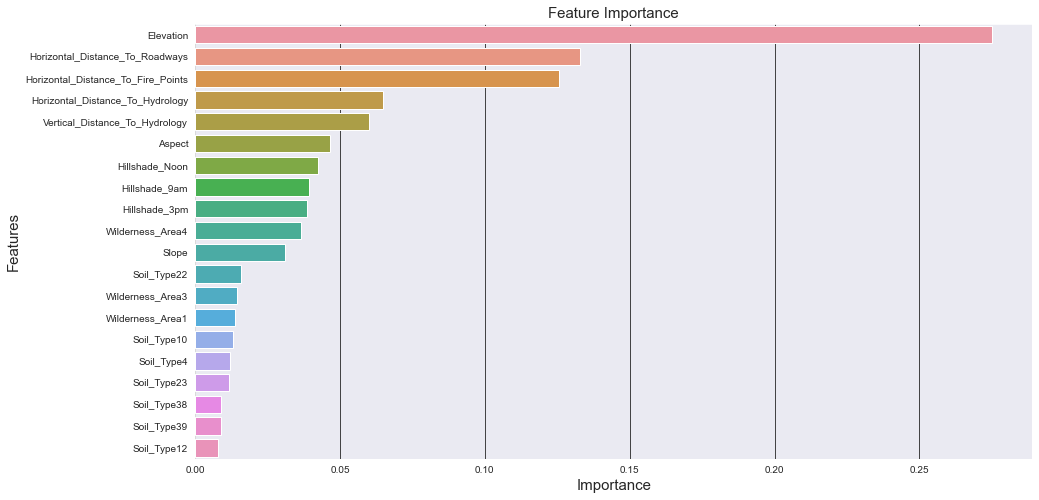

In [318]:
model = RandomForestClassifier(random_state = 10)

model.fit(X, y)

RFC_feature_importances = pd.DataFrame({'Features':X.columns, 'Importance':model.feature_importances_}).sort_values('Importance', ascending=False)

sns.barplot(x = 'Importance', y = 'Features', data = RFC_feature_importances)

plt.title('Feature Importance', fontsize = 15)
plt.xlabel('Importance', fontsize = 15)
plt.ylabel('Features', fontsize = 15)

plt.show()

### Feature Scaling

One last step before we move to splitting our data to Train-Test Split is to scale the features to some specific range. This is called Feature Scaling. We will scale all feature values to specific range of `0 to 1`. but before we do this we will split the feature and target variables because we dont want to scale our target variable..

In [127]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()

X = df_ctype.iloc[:,:-1]

y = df_ctype['Cover_Type']

X_scaled = scaler.fit_transform(X)

In [128]:
X_scaled

array([[0.36568284, 0.15555556, 0.03030303, ..., 0.        , 0.        ,
        0.        ],
       [0.47273637, 0.38611111, 0.13636364, ..., 0.        , 0.        ,
        0.        ],
       [0.46323162, 0.43055556, 0.27272727, ..., 0.        , 0.        ,
        0.        ],
       ...,
       [0.26363182, 0.44166667, 0.25757576, ..., 0.        , 0.        ,
        0.        ],
       [0.26263132, 0.47222222, 0.22727273, ..., 0.        , 0.        ,
        0.        ],
       [0.26213107, 0.45833333, 0.1969697 , ..., 0.        , 0.        ,
        0.        ]])

### Train-Test Split

Now our data is ready to be splitted into **75%-25% train-test set respectively**.

**We shall build the function to calculate the f1 score and accuracy score for the model which uses all the 54 features to train the model and check the scores. We shall also build a model using the sample features which we have selected and compare the scores with the fully built model.**

In [129]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size = 0.25, random_state = 53)

In [130]:
print(X_train.shape, X_test.shape)

print(y_train.shape,y_test.shape)

(435758, 54) (145253, 54)
(435758,) (145253,)


Now its time to feed our data to the models to see how each models performs using 2 different `evaluation metrics` **`accuracy`** and **`f1 score`** and see which model performs the best. 


The `Evaluation Metric` we are going to use are `f1 score` and `accuracy` to see how well our model performs.

- `Accuracy` is the measure of the correct predicted data divided by total number of observations hence giving a value ranging between `0 and 1`, while `0` is no correctly predicted class whereas `1` is all correctly predicted class. We can multiply the result by `100` to get the accuracy score in terms of percent.

- `F1 score` is more useful than accuracy specially in the case where you have uneven amount of class distribution as in our case. It's the weighted average of Precision and Recall. Therefore, this score takes both false positives and false negatives into account. 

-  `Accuracy` works best if false positives and false negatives have similar cost. If the cost of false positives and false negatives are very different, it’s better to look at both Precision and Recall or `F1 score`. 

First we shall define a function which will train the `models` using training data and calculate model's performance using `accuracy` and `f1 score`. One sets of instruction for all `models`!

## Model Scores and Accuracy

In [177]:
def model_train_and_score(estimator, X_train, y_train, X_test, y_test):
    estimator.fit(X_train, y_train)
    y_pred = estimator.predict(X_test)
    y_pred_train = estimator.predict(X_train)
    
    print("**************************************************")
    print("________"+estimator.__class__.__name__+"__________")
    print()
    print("Accuracy: {}".format(accuracy_score(y_test, y_pred)))
    print("Precision: {}".format(precision_score(y_test, y_pred, average = 'weighted')))
    print("Recall: {}".format(recall_score(y_test, y_pred, average = 'weighted')))
    print("F1 Score: {}".format(f1_score(y_test, y_pred, average = 'weighted')))
    print()
    print('Classification Report on train data \n',classification_report(y_train,y_pred_train))
    print()
    print('Classification Report on test data \n',classification_report(y_test,y_pred))
    print()
    print("**************************************************") 

### RandomForestClassifier

In [181]:
model_train_and_score(RandomForestClassifier(), X_train, y_train, X_test, y_test)

**************************************************
________RandomForestClassifier__________

Accuracy: 0.9522557193310982
Precision: 0.9523503181716331
Recall: 0.9522557193310982
F1 Score: 0.9519344297021852

Classification Report on train data 
               precision    recall  f1-score   support

           1       1.00      1.00      1.00    158867
           2       1.00      1.00      1.00    212388
           3       1.00      1.00      1.00     26861
           4       1.00      1.00      1.00      2072
           5       1.00      1.00      1.00      7083
           6       1.00      1.00      1.00     13063
           7       1.00      1.00      1.00     15424

    accuracy                           1.00    435758
   macro avg       1.00      1.00      1.00    435758
weighted avg       1.00      1.00      1.00    435758


Classification Report on test data 
               precision    recall  f1-score   support

           1       0.96      0.94      0.95     52973
         

**Interpretation:**
    
- By applying `Random Forest` model on the `complete data`(i.e on all the columns) we got the score as `95%` on the test data. But by seeing the accuracy scores for train and test data we can say that there is `overfitting`, so we can apply gridsearchcv to tune the model so that we get better results.

- We have used all the features to build the model but we might get similar score by using only `few(important) features` which we have selected using feature importances by Random Forest. This process is called `Dimensionality Reduction` technique where we have used only few features out of all the features.

Now we shall use the `sample` data which is having top `20` features given by Random Forest and built the models.

## Train_test_split

In [220]:
sample.head()

Elevation  Horizontal_Distance_To_Roadways  \
0       2590                              390   
1       2804                             3180   
2       2785                             3090   
3       2595                              391   
4       2579                               67   

   Horizontal_Distance_To_Fire_Points  Horizontal_Distance_To_Hydrology  \
0                                6225                               212   
1                                6121                               268   
2                                6211                               242   
3                                6172                               153   
4                                6031                               300   

   Vertical_Distance_To_Hydrology  Aspect  Hillshade_Noon  Hillshade_9am  \
0                              -6      56             235            220   
1                              65     139             238            234   
2                             118     155             238            238   
3                              -1      45             234            220   
4                             -15     132             237            230   

   Hillshade_3pm  Slope  Wilderness_Area4  Soil_Type22  Soil_Type12  \
0            151      2                 0            0            0   
1            135      9                 0            0            1   
2            122     18                 0            0            0   
3            150      2                 0            0            0   
4            140      6                 0            0            0   

   Soil_Type4  Soil_Type10  Soil_Type38  Soil_Type39  Soil_Type23  \
0           0            0            0            0            0   
1           0            0            0            0            0   
2           0            0            0            0            0   
3           0            0            0            0            0   
4           0            0            0            0            0   

   Wilderness_Area3  Wilderness_Area1  
0                 0                 1  
1                 0                 1  
2                 0                 1  
3                 0                 1  
4                 0                 1

In [221]:
X = sample.copy()

y = df_ctype['Cover_Type']

In [222]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 53)

In [223]:
print(X_train.shape, X_test.shape)

print(y_train.shape,y_test.shape)

(435758, 20) (145253, 20)
(435758,) (145253,)


In [224]:
#Scaling the data.
scaler = MinMaxScaler()
X_train_final=pd.DataFrame(scaler.fit_transform(X_train),columns=X_train.columns)
X_test_final=pd.DataFrame(scaler.transform(X_test),columns=X_test.columns)

In [225]:
print(X_train_final.shape, X_test_final.shape)

print(y_train.shape,y_test.shape)

(435758, 20) (145253, 20)
(435758,) (145253,)


### RandomForestClassifier

In [429]:
model_train_and_score(RandomForestClassifier(n_jobs=-1, random_state = 53), X_train_final, y_train, X_test_final, y_test)

**************************************************
________RandomForestClassifier__________

Accuracy: 0.9532677466214123
Precision: 0.9533252889152729
Recall: 0.9532677466214123
F1 Score: 0.9529891001841152

Classification Report on train data 
               precision    recall  f1-score   support

           1       1.00      1.00      1.00    158867
           2       1.00      1.00      1.00    212388
           3       1.00      1.00      1.00     26861
           4       1.00      1.00      1.00      2072
           5       1.00      1.00      1.00      7083
           6       1.00      1.00      1.00     13063
           7       1.00      1.00      1.00     15424

    accuracy                           1.00    435758
   macro avg       1.00      1.00      1.00    435758
weighted avg       1.00      1.00      1.00    435758


Classification Report on test data 
               precision    recall  f1-score   support

           1       0.96      0.94      0.95     52973
         

### LogisticRegression

In [320]:
model_train_and_score(LogisticRegression(), X_train_final, y_train, X_test_final, y_test)

**************************************************
________LogisticRegression__________

Accuracy: 0.7118131811391158
Precision: 0.6944798465103117
Recall: 0.7118131811391158
F1 Score: 0.7004203162635916

Classification Report on train data 
               precision    recall  f1-score   support

           1       0.70      0.70      0.70    158867
           2       0.74      0.79      0.77    212388
           3       0.64      0.74      0.69     26861
           4       0.07      0.05      0.06      2072
           5       0.00      0.00      0.00      7083
           6       0.40      0.18      0.25     13063
           7       0.73      0.46      0.56     15424

    accuracy                           0.71    435758
   macro avg       0.47      0.42      0.43    435758
weighted avg       0.69      0.71      0.70    435758


Classification Report on test data 
               precision    recall  f1-score   support

           1       0.70      0.70      0.70     52973
           2 

### DecisionTreeClassifier

In [321]:
model_train_and_score(DecisionTreeClassifier(), X_train_final, y_train, X_test_final, y_test)

**************************************************
________DecisionTreeClassifier__________

Accuracy: 0.9298327745382196
Precision: 0.9298368008914669
Recall: 0.9298327745382196
F1 Score: 0.9298326772028803

Classification Report on train data 
               precision    recall  f1-score   support

           1       1.00      1.00      1.00    158867
           2       1.00      1.00      1.00    212388
           3       1.00      1.00      1.00     26861
           4       1.00      1.00      1.00      2072
           5       1.00      1.00      1.00      7083
           6       1.00      1.00      1.00     13063
           7       1.00      1.00      1.00     15424

    accuracy                           1.00    435758
   macro avg       1.00      1.00      1.00    435758
weighted avg       1.00      1.00      1.00    435758


Classification Report on test data 
               precision    recall  f1-score   support

           1       0.93      0.93      0.93     52973
         

### AdaBoostClassifier

In [322]:
model_train_and_score(AdaBoostClassifier(), X_train_final, y_train, X_test_final, y_test)

**************************************************
________AdaBoostClassifier__________

Accuracy: 0.4193028715413795
Precision: 0.5739604143222239
Recall: 0.4193028715413795
F1 Score: 0.44536033120116536

Classification Report on train data 
               precision    recall  f1-score   support

           1       0.51      0.18      0.26    158867
           2       0.73      0.58      0.65    212388
           3       0.36      0.20      0.26     26861
           4       0.00      0.00      0.00      2072
           5       0.00      0.00      0.00      7083
           6       0.18      0.74      0.29     13063
           7       0.10      0.95      0.19     15424

    accuracy                           0.42    435758
   macro avg       0.27      0.38      0.24    435758
weighted avg       0.57      0.42      0.44    435758


Classification Report on test data 
               precision    recall  f1-score   support

           1       0.51      0.18      0.27     52973
           2

### GradientBoostingClassifier

In [323]:
model_train_and_score(GradientBoostingClassifier(), X_train_final, y_train, X_test_final, y_test)

**************************************************
________GradientBoostingClassifier__________

Accuracy: 0.7669583416521517
Precision: 0.7669700462956615
Recall: 0.7669583416521517
F1 Score: 0.7624050031432282

Classification Report on train data 
               precision    recall  f1-score   support

           1       0.75      0.75      0.75    158867
           2       0.78      0.82      0.80    212388
           3       0.77      0.81      0.79     26861
           4       0.82      0.70      0.76      2072
           5       0.84      0.21      0.34      7083
           6       0.65      0.44      0.53     13063
           7       0.86      0.69      0.77     15424

    accuracy                           0.77    435758
   macro avg       0.78      0.63      0.68    435758
weighted avg       0.77      0.77      0.76    435758


Classification Report on test data 
               precision    recall  f1-score   support

           1       0.75      0.75      0.75     52973
     

**Interpretation:**

- We can see that Random Forest and Decision Tree models have worked well on the test data when compared to boosting models.

- We can also see that there is overfitting for Random Forest and Decision Tree models. For the remaining models we have similar scores for both test and train data.

- Even Logistic Regression has worked better but there can be improvement.

- We can improve the scores by tuning the models using GridSearchCV.

We shall get a scorecard so that we can check the scores of all the models easily and compare them.

## SCORECARD

In [239]:
scorecard=pd.DataFrame(columns=['Model','Precision','Recall','F1_score','Train_Accuracy','Test_Accuracy','Kappa_score'])
def model_accuracy(model_name,classifier,X_train,y_train,X_test,y_test):
    
    # traing data 
    model=classifier.fit(X_train,y_train)
    y_train_pred=model.predict(X_train)
    #testing data
    y_test_pred=model.predict(X_test)
    
    Train_accuracy=model.score(X_train,y_train)
    Test_accuracy=model.score(X_test,y_test)
    
    global scorecard
    scorecard=scorecard.append({'Model':model_name
                               ,'Precision':precision_score(y_test,y_test_pred, average = 'weighted')
                               ,'Recall':recall_score(y_test,y_test_pred, average = 'weighted')
                               ,'F1_score':f1_score(y_test,y_test_pred, average = 'weighted')
                               ,'Train_Accuracy':Train_accuracy
                               ,'Test_Accuracy':Test_accuracy
                               ,'Kappa_score':cohen_kappa_score(y_test,y_test_pred)},ignore_index=True
                              )

### Score crad for the untuned model

In [240]:
model_accuracy('Decision Tree', DecisionTreeClassifier(), X_train_final, y_train, X_test_final, y_test)

In [242]:
model_accuracy('Logistic Regression', LogisticRegression(), X_train_final, y_train, X_test_final, y_test)

In [244]:
model_accuracy('Random Forest', RandomForestClassifier(), X_train_final, y_train, X_test_final, y_test)

In [246]:
model_accuracy('Extra Trees Classifier', ExtraTreesClassifier(), X_train_final, y_train, X_test_final, y_test)

In [248]:
model_accuracy('Bagging Classifier', BaggingClassifier(), X_train_final, y_train, X_test_final, y_test)

In [250]:
model_accuracy('AdaBoost Classifier', AdaBoostClassifier(), X_train_final, y_train, X_test_final, y_test)

In [252]:
model_accuracy('GradientBoosting Classifier', GradientBoostingClassifier(), X_train_final, y_train, X_test_final, y_test)

In [254]:
model_accuracy('XGB Classifier', XGBClassifier(), X_train_final, y_train, X_test_final, y_test)

[16:37:22] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


In [256]:
model_accuracy('LGBM Classifier', LGBMClassifier(), X_train_final, y_train, X_test_final, y_test)

In [260]:
scorecard

Model  Precision    Recall  F1_score  Train_Accuracy  \
0                Decision Tree   0.930376  0.930363  0.930366        1.000000   
1          Logistic Regression   0.694480  0.711813  0.700420        0.710112   
2                Random Forest   0.953406  0.953302  0.953024        1.000000   
3       Extra Trees Classifier   0.951673  0.951547  0.951284        1.000000   
4           Bagging Classifier   0.955968  0.956001  0.955846        0.998020   
5          AdaBoost Classifier   0.573960  0.419303  0.445360        0.417876   
6  GradientBoosting Classifier   0.766970  0.766958  0.762405        0.767791   
7               XGB Classifier   0.859163  0.858874  0.858142        0.871424   
8              LGBM Classifier   0.842524  0.842537  0.841912        0.851424   

   Test_Accuracy  Kappa_score  
0       0.930363     0.888144  
1       0.711813     0.524277  
2       0.953302     0.924583  
3       0.951547     0.921739  
4       0.956001     0.929148  
5       0.419303     0.220581  
6       0.766958     0.617732  
7       0.858874     0.771260  
8       0.842537     0.744993

**Here it is, default params have done the job! Clearly few models are working well on the default parameters itself.** 

- `Decision Tree` performs well here, getting accuracy `93.03%` and `93.03%` of F1 score. But when we check the results for training and test data the data is overfitting where we are having the accuracy of train data as `100%` and accuracy for test data as `93.03%`. So we can address this using GridSearchcv by getting the best params.

- `Random Forest` here gets highest accuracy result and F1 score of `95.33%` and `95.30%` respectively. Also given its flexibility it has performed so well with default params but the data is overfitting.

- `Logistic Regression` is addressing well the overfitting of the data. It is having the similar type of results for both the test data and train data but we can't tell that this is a good model. Maybe GridSearchCV might help in increasing the score but it might not beat Random Forest.

- `Extra Trees` hasn't disappointed with its results, both RFC and this have close call having less than a percent difference.

- `Bagging Classifier` has similar results as `Random Forest` infact having little higher score than Random Forest and also has better F1 score. Even here we are having overfitting.

- We can clearly see that boosting models both `AdaBoost` and `GradientBoost` are failing over here with an accuracy of `41.91%` and `76.6%` respectively.

- Coming the all time best performers `XGBClassifier` and `LGBMClassifier`, both the models are giving almost similar results having the accuracy score as `85.88%` and `84.22%`. We can improve the scores using GridSearchCV for both the models and we have to check whether they can beat `RandomForest`.

- As of now, we can choose our Benchmark model as `Random Forest`, since it is having better solution both interms of accuracy and F1 score.


So to pick one model We would consider not only having best accuracy score but also `F1 score` since `F1 scores` are more important as they give us an weighted average score of both `precision` and `recall`, where `precision` is intuitively the ability of the classifier not to label as positive a sample that is negative and `recall` it's the number of positive prediction divided by the number of positive class values and `F1 score` is the balance of both of these. 

## Bias and Variance error

In [282]:
models = []
models.append(('Logistic Regression', LogisticRegression()))
models.append(('Decision Tree', DecisionTreeClassifier()))
models.append(('Random Forest',RandomForestClassifier()))
models.append(('Extra Trees Classifier',ExtraTreesClassifier()))
models.append(('Bagging Classifier',BaggingClassifier()))

In [283]:
results = []
names = []
for name, model in models:
    kfold = KFold(shuffle=True,n_splits=3,random_state=0)
    cv_results = cross_val_score(model, X_train_final, y_train, cv=kfold, scoring='f1_weighted')
    results.append(cv_results)
    names.append(name)
    print("%s: Bias error: %f Variance error: (%f)" % (name, 1-np.mean(cv_results),np.std(cv_results,ddof=1)))

Logistic Regression: Bias error: 0.302615 Variance error: (0.001191)
Decision Tree: Bias error: 0.086397 Variance error: (0.000339)
Random Forest: Bias error: 0.057938 Variance error: (0.000570)
Extra Trees Classifier: Bias error: 0.059552 Variance error: (0.000521)
Bagging Classifier: Bias error: 0.055538 Variance error: (0.000610)


**Interpretation:** 
    
- `Logistic Regression` has highest bias error when compared to all the other models with a bias error of `0.302`.
- Even in terms of bias and variance error we are having the best scores for `Random forest` only with the scores as bias:`0.057` and variance: `0.0005`. 
- `Bagging Classifier` as well working the same way as `Random Forest` having the least bias and varaince errors.

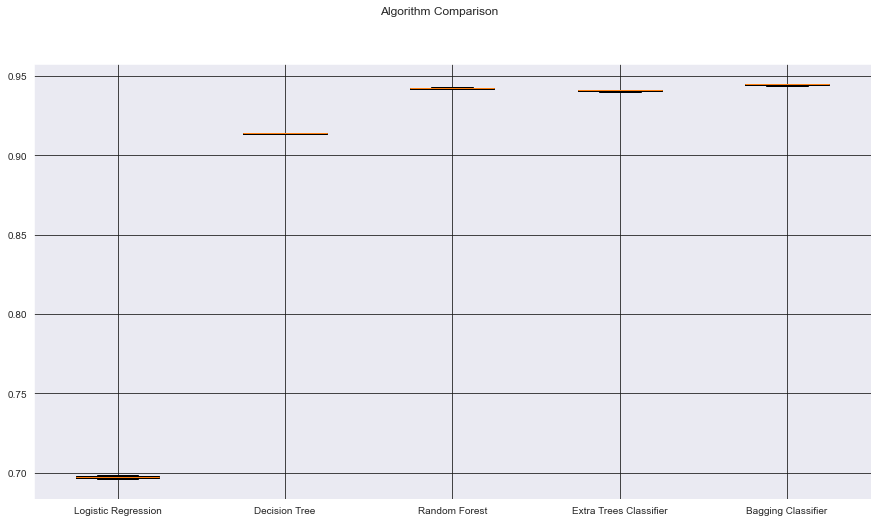

In [313]:
fig = plt.figure()
fig.suptitle('Algorithm Comparison')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
plt.show()

Even by visualizing the boxplot we can interpret the same, Random Forest and Bagging Classifier are working well.

In [314]:
models1 = []
models1.append(('AdaBoost Classifier',AdaBoostClassifier()))
models1.append(('GradientBoosting Classifier',GradientBoostingClassifier()))
models1.append(('XGB Classifier',XGBClassifier()))
models1.append(('LGBM Classifier',LGBMClassifier()))

In [315]:
results = []
names = []
for name, model in models1:
    kfold = KFold(shuffle=True,n_splits=3,random_state=10)
    cv_results = cross_val_score(model, X_train_final, y_train, cv=kfold, scoring='f1_weighted')
    results.append(cv_results)
    names.append(name)
    print("%s: Bias error: %f Variance error: (%f)" % (name, 1-np.mean(cv_results),np.std(cv_results,ddof=1)))

AdaBoost Classifier: Bias error: 0.509208 Variance error: (0.097116)
GradientBoosting Classifier: Bias error: 0.239631 Variance error: (0.000272)
[00:15:12] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[00:16:50] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[00:18:20] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'ml

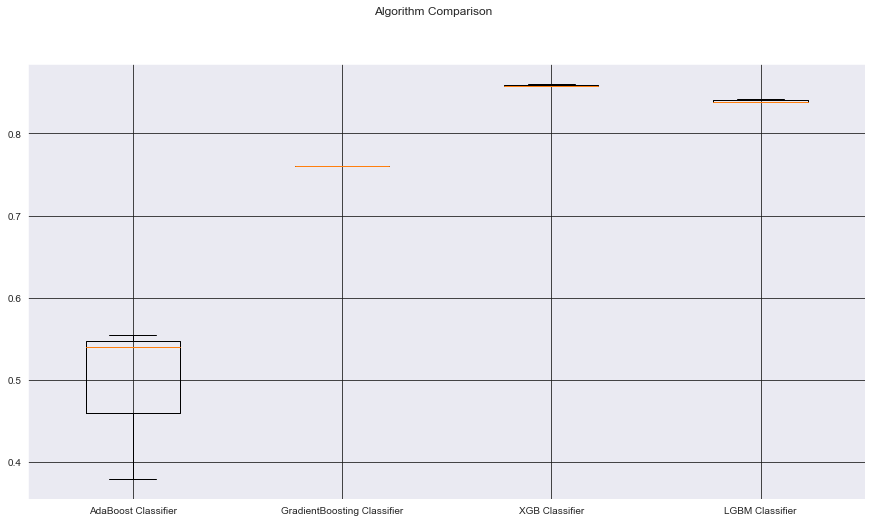

In [316]:
fig = plt.figure()
fig.suptitle('Algorithm Comparison')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
plt.show()

**Interpretation:**
    
- We can say that `XGBClassifier` is working well out of this four models. We can even try the GridSearchCV to reduce the bias and variance error. After the XGB, LGBM is giving good results. We can also observe that boosting models have failed enormously to work well on this dataset.

## Model Tuning - GridSearchCV

### Tuned Logistic Regression

In [ ]:
LR = LogisticRegression(random_state=53)

hyp_parameters = {'penalty':['l1','l2'],'max_iter':[30,50,100,120,150]}

kf = KFold(n_splits=5,shuffle=True,random_state=10)

grid_LR = GridSearchCV(estimator=LR,param_grid=hyp_parameters,cv=kf,scoring='f1_weighted')

grid_LR.fit(X_train_final,y_train)

In [ ]:
print('Best Parameters for LogisticRegression \n',grid_LR.best_params_)

### Tuned Random Forest Classifier

In [ ]:
rf = RandomForestClassifier(random_state=53)
hyp_parameters = {'n_estimators':[10,20,30,50],'criterion':['gini','entropy'],'max_depth':[2,3,5,6],
                  'min_samples_split':[2,3,4,5],'min_samples_leaf':[1,3,5],'max_leaf_nodes':[2,3,4]}
Kf = KFold(n_splits=5,shuffle=True,random_state=10)
grid_rf = GridSearchCV(estimator=rf,param_grid=hyp_parameters,cv=Kf,scoring='f1_weighted')
grid_rf.fit(X_train_final,y_train)

In [ ]:
print('Best Parameters for RandomForest \n',grid_rf.best_params_)

### Tuned Decision Tree Classifier

In [ ]:
Dt = DecisionTreeClassifier(random_state=53)

hyp_parameters = {'criterion':['gini','entropy'],
                  'max_depth':[2,3,5,6],
                  'min_samples_split':[2,3,4,5],
                  'min_samples_leaf':[1,3,5],
                  'max_leaf_nodes':[2,3,4],
                  'max_features':['auto','sqrt','log2']}

Kf = KFold(n_splits=5,shuffle=True,random_state=10)
grid_Dt = GridSearchCV(estimator=Dt,param_grid=hyp_parameters,cv=Kf,scoring='f1_weighted')
grid_Dt.fit(X_train_final,y_train)

In [ ]:
print('The best parameters from Decision Tree Classifier are:\n ' grid_Dt.best_params_)

### Tuned AdaBoost Classifier

In [ ]:
Ada = AdaBoostClassifier(random_state=53)

hyp_parameters = {'base_estimator':[RandomForestClassifier(),DecisionTreeClassifier()],'n_estimators':[30,50,80,100],
                 'learning_rate':[0.5,1,1.5,2]}

kf = KFold(n_splits=5,shuffle=True,random_state=10)

grid_Ada = GridSearchCV(estimator=Ada,param_grid=hyp_parameters,cv=kf,scoring='f1_weighted')

grid_Ada.fit(X_train_final,y_train)

In [ ]:
print('Best Parameters for AdaBoostClassifier \n',grid_Ada.best_params_)

### BaggingClassifier

In [325]:
bag = BaggingClassifier(n_jobs=-1, random_state = 53)

hyp_parameters = {'base_estimator':[RandomForestClassifier(), LogisticRegression()],
                  'n_estimators':[10, 20, 40],
                  'max_samples':[1,2,3],
                  'max_features':[1,2,3]}

Kf = KFold(n_splits=3, shuffle=True, random_state=10)
grid_bag = GridSearchCV(estimator=bag, param_grid=hyp_parameters, cv=Kf, scoring='f1_weighted')
grid_bag.fit(X_train_final,y_train)
print('The best parameters from KNeighbors Classifier are:\n ', grid_bag.best_params_)

The best parameters from KNeighbors Classifier are:
  {'base_estimator': RandomForestClassifier(), 'max_features': 3, 'max_samples': 2, 'n_estimators': 40}


### XGBClassifier Grid

In [339]:
hyper_params = [{'learning_rate': [0.4, 0.7, 1.0], 'max_depth': [5,6], 'gamma': [0, 2]}]
kf=KFold(n_splits=3,shuffle=True,random_state=0)
xgb = XGBClassifier(random_state = 10)
xgb_grid = GridSearchCV(estimator = xgb, param_grid = hyper_params, cv = kf, scoring='f1_weighted')
xgb_grid = xgb_grid.fit(X_train_final, y_train)

[12:09:46] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[12:10:57] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[12:12:09] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[12:13:24] WARNING: C:/Users/Administrator/workspace/xgboost-win64_

In [340]:
print('The best parameters from KNeighbors Classifier are:\n ', xgb_grid.best_params_)

The best parameters from KNeighbors Classifier are:
  {'gamma': 1, 'learning_rate': 0.8, 'max_depth': 6}


As the dataset is huge and we aren't having enough computational resources which can work faster we have exectued the GridSearchCV in all the four laptops of the team members and combined the results over here. In this system we have got the results for `XGBClassifier` and `Bagging Classifier`, similarly for the other models.

We got the below parameters from GridsearchCV.

**Parameters Values for Logistic Regresson:**
    - max_iter = 120, 
    - penalty = 'l2'
    
**Parameters Values for RFC:**
    - n_estimators = 10, 
    - criterion = ’gini’, 
    - max_depth = 3, 
    - min_samples_split = 2, 
    - min_samples_leaf = 1, 
    - max_leaf_nodes = 4

**Parameters Values for Decision Tree:**
    - criterion = ’entropy’, 
    - max_depth = 3, 
    - max_features = 'auto'
    - min_samples_split = 2, 
    - min_samples_leaf = 1, 
    - max_leaf_nodes = 4

**Parameters Values for AdaBoost:**
    - base_estimator = Random Forest(), 
    - learning_rate = 0.5, 
    - n_estimators = 30 
    
**Parameters Values for BaggingClassifier:**    
    - base_estimator = Random Forest(), 
    - max_features = 3, 
    - max_samples = 2, 
    - n_estimators = 40 
    
**Parameters Values for XGBClassifier:**    
    - gamma = 1,
    - learning_rate = 0.8, 
    - max_depth = 6 

**Interpretation:** From the obtained parameters we shall build the tuned models and observe the scores. By applying the `GridSearchCV` we can address the `overfitting` of the data. Let's understand about GridSearchCV a little bit.

`GridSearchCV` is one of the basic yet most used technique to tune the hyperparameters.Note that there is no way to know in advance the `best values` for hyperparameters so ideally, we need to try all possible values to know the optimal values.GridSearchCV tries all the combinations of the values passed in the dictionary and evaluates the model for each combination using the `CrossValidation method`. Hence after using this function, we get accuracy/loss for every combination of
hyperparameters and we can choose the one with the best performance.

## Tuned Models 

We shall build a scorecard to append all the tuned models.

### SCORECARD 

In [379]:
scorecard_tuned=pd.DataFrame(columns=['Model','Precision','Recall','F1_score','Train_Accuracy','Test_Accuracy','Kappa_score'])
def model_accuracy_score(model_name,classifier,X_train,y_train,X_test,y_test):
    
    # traing data 
    model=classifier.fit(X_train,y_train)
    y_train_pred=model.predict(X_train)
    #testing data
    y_test_pred=model.predict(X_test)
    
    Train_accuracy=model.score(X_train,y_train)
    Test_accuracy=model.score(X_test,y_test)
    
    global scorecard_tuned
    scorecard_tuned=scorecard_tuned.append({'Model':model_name
                               ,'Precision':precision_score(y_test,y_test_pred, average = 'weighted')
                               ,'Recall':recall_score(y_test,y_test_pred, average = 'weighted')
                               ,'F1_score':f1_score(y_test,y_test_pred, average = 'weighted')
                               ,'Train_Accuracy':Train_accuracy
                               ,'Test_Accuracy':Test_accuracy
                               ,'Kappa_score':cohen_kappa_score(y_test,y_test_pred)},ignore_index=True
                              )

### Tuned Logistic Regression

In [362]:
tuned_LR = LogisticRegression(max_iter = 120, penalty = 'l2', random_state = 53)

In [363]:
model_train_and_score(tuned_LR, X_train_final, y_train, X_test_final, y_test)

**************************************************
________LogisticRegression__________

Accuracy: 0.7125773650113939
Precision: 0.6941741034925242
Recall: 0.7125773650113939
F1 Score: 0.700421411919488

Classification Report on train data 
               precision    recall  f1-score   support

           1       0.70      0.69      0.70    158867
           2       0.74      0.80      0.77    212388
           3       0.64      0.76      0.70     26861
           4       0.12      0.07      0.09      2072
           5       0.00      0.00      0.00      7083
           6       0.41      0.17      0.24     13063
           7       0.73      0.49      0.59     15424

    accuracy                           0.71    435758
   macro avg       0.48      0.43      0.44    435758
weighted avg       0.69      0.71      0.70    435758


Classification Report on test data 
               precision    recall  f1-score   support

           1       0.70      0.69      0.70     52973
           2  

### Tuned Decision Tree

In [364]:
Tuned_DT = DecisionTreeClassifier(criterion='entropy', 
                                 max_depth=3, 
                                 max_features='auto', 
                                 max_leaf_nodes=4, 
                                 min_samples_leaf=1, 
                                 min_samples_split=2, 
                                 random_state = 53)

In [365]:
model_train_and_score(Tuned_DT, X_train_final, y_train, X_test_final, y_test)

**************************************************
________DecisionTreeClassifier__________

Accuracy: 0.5390732033073328
Precision: 0.5087092493286614
Recall: 0.5390732033073328
F1 Score: 0.40403689848959107

Classification Report on train data 
               precision    recall  f1-score   support

           1       0.57      0.04      0.07    158867
           2       0.53      0.98      0.69    212388
           3       0.58      0.78      0.67     26861
           4       0.00      0.00      0.00      2072
           5       0.00      0.00      0.00      7083
           6       0.00      0.00      0.00     13063
           7       0.00      0.00      0.00     15424

    accuracy                           0.54    435758
   macro avg       0.24      0.26      0.20    435758
weighted avg       0.50      0.54      0.40    435758


Classification Report on test data 
               precision    recall  f1-score   support

           1       0.58      0.04      0.07     52973
        

### Tuned Random Forest

In [367]:
Tuned_Random_forest = RandomForestClassifier(n_estimators = 10, 
    criterion = 'gini', 
    max_depth = 3, 
    min_samples_split = 2, 
    min_samples_leaf = 1,
    max_leaf_nodes = 4,                                        
    random_state = 53,  
    n_jobs = -1)

In [368]:
model_train_and_score(Tuned_Random_forest, X_train_final, y_train, X_test_final, y_test)

**************************************************
________RandomForestClassifier__________

Accuracy: 0.6677658981225861
Precision: 0.6109254019414573
Recall: 0.6677658981225861
F1 Score: 0.6379324779258922

Classification Report on train data 
               precision    recall  f1-score   support

           1       0.64      0.72      0.68    158867
           2       0.70      0.75      0.73    212388
           3       0.58      0.59      0.59     26861
           4       0.00      0.00      0.00      2072
           5       0.00      0.00      0.00      7083
           6       0.00      0.00      0.00     13063
           7       0.00      0.00      0.00     15424

    accuracy                           0.67    435758
   macro avg       0.27      0.30      0.28    435758
weighted avg       0.61      0.67      0.64    435758


Classification Report on test data 
               precision    recall  f1-score   support

           1       0.64      0.72      0.68     52973
         

### Tuned Bagging Classifier

In [369]:
tuned_bagging = BaggingClassifier(base_estimator = RandomForestClassifier(),
                                  max_features=3, 
                                  max_samples=2, 
                                  n_estimators = 40,
                                 random_state = 53)

In [370]:
model_train_and_score(tuned_bagging, X_train_final, y_train, X_test_final, y_test)

**************************************************
________BaggingClassifier__________

Accuracy: 0.4882239953735895
Precision: 0.5301031104851008
Recall: 0.4882239953735895
F1 Score: 0.3203670179581903

Classification Report on train data 
               precision    recall  f1-score   support

           1       0.94      0.00      0.00    158867
           2       0.49      1.00      0.66    212388
           3       0.00      0.00      0.00     26861
           4       0.00      0.00      0.00      2072
           5       0.00      0.00      0.00      7083
           6       0.00      0.00      0.00     13063
           7       0.00      0.00      0.00     15424

    accuracy                           0.49    435758
   macro avg       0.20      0.14      0.09    435758
weighted avg       0.58      0.49      0.32    435758


Classification Report on test data 
               precision    recall  f1-score   support

           1       0.80      0.00      0.00     52973
           2  

### Tuned AdaBoost Classifier

In [371]:
Tuned_AdaBoost = AdaBoostClassifier(base_estimator = RandomForestClassifier(), 
                                    learning_rate = 0.5, 
                                    n_estimators = 30, 
                                   random_state = 53)

In [372]:
model_train_and_score(Tuned_AdaBoost, X_train_final, y_train, X_test_final, y_test)

**************************************************
________AdaBoostClassifier__________

Accuracy: 0.9539355469422318
Precision: 0.954025356655413
Recall: 0.9539355469422318
F1 Score: 0.9536792862605313

Classification Report on train data 
               precision    recall  f1-score   support

           1       1.00      1.00      1.00    158867
           2       1.00      1.00      1.00    212388
           3       1.00      1.00      1.00     26861
           4       1.00      1.00      1.00      2072
           5       1.00      1.00      1.00      7083
           6       1.00      1.00      1.00     13063
           7       1.00      1.00      1.00     15424

    accuracy                           1.00    435758
   macro avg       1.00      1.00      1.00    435758
weighted avg       1.00      1.00      1.00    435758


Classification Report on test data 
               precision    recall  f1-score   support

           1       0.96      0.94      0.95     52973
           2  

### Tuned XGB Classifier

In [404]:
XGBClassifier().fit(X_train_final, y_train)

[16:42:06] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
              gamma=0, gpu_id=-1, importance_type=None,
              interaction_constraints='', learning_rate=0.300000012,
              max_delta_step=0, max_depth=6, min_child_weight=1, missing=nan,
              monotone_constraints='()', n_estimators=100, n_jobs=8,
              num_parallel_tree=1, objective='multi:softprob', predictor='auto',
              random_state=0, reg_alpha=0, reg_lambda=1, scale_pos_weight=None,
              subsample=1, tree_method='exact', validate_parameters=1,
              verbosity=None)

In [413]:
tuned_xgb = XGBClassifier(learning_rate = 0.8, 
             gamma = 1, 
             max_depth = 6)

In [414]:
model_train_and_score(tuned_xgb, X_train_final, y_train, X_test_final, y_test)

[16:58:16] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
**************************************************
________XGBClassifier__________

Accuracy: 0.9146317115653377
Precision: 0.9146392560693648
Recall: 0.9146317115653377
F1 Score: 0.9144330416139866

Classification Report on train data 
               precision    recall  f1-score   support

           1       0.93      0.91      0.92    158867
           2       0.93      0.95      0.94    212388
           3       0.98      0.98      0.98     26861
           4       0.98      0.98      0.98      2072
           5       0.96      0.89      0.93      7083
           6       0.96      0.96      0.96     13063
           7       0.99      0.99      0.99     15424

    accuracy     

### Boosted Logistic Regression

In [374]:
ada_tuned_LR = AdaBoostClassifier(base_estimator=tuned_LR, random_state = 53)

In [355]:
model_train_and_score(ada_tuned_LR, X_train_final, y_train, X_test_final, y_test)

**************************************************
________AdaBoostClassifier__________

Accuracy: 0.5634651263657205
Precision: 0.5793020244655235
Recall: 0.5634651263657205
F1 Score: 0.47389924545872514

Classification Report on train data 
               precision    recall  f1-score   support

           1       0.76      0.17      0.27    158867
           2       0.54      0.95      0.69    212388
           3       0.58      0.60      0.59     26861
           4       0.00      0.00      0.00      2072
           5       0.00      0.00      0.00      7083
           6       0.00      0.00      0.00     13063
           7       0.00      0.00      0.00     15424

    accuracy                           0.56    435758
   macro avg       0.27      0.25      0.22    435758
weighted avg       0.58      0.56      0.47    435758


Classification Report on test data 
               precision    recall  f1-score   support

           1       0.76      0.17      0.27     52973
           2

### Boosted decision Tree

In [375]:
ada_tuned_DT = AdaBoostClassifier(DecisionTreeClassifier(), random_state = 53)

In [376]:
model_train_and_score(ada_tuned_DT, X_train_final, y_train, X_test_final, y_test)

**************************************************
________AdaBoostClassifier__________

Accuracy: 0.9307002265013459
Precision: 0.9307020643116446
Recall: 0.9307002265013459
F1 Score: 0.9306962537172881

Classification Report on train data 
               precision    recall  f1-score   support

           1       1.00      1.00      1.00    158867
           2       1.00      1.00      1.00    212388
           3       1.00      1.00      1.00     26861
           4       1.00      1.00      1.00      2072
           5       1.00      1.00      1.00      7083
           6       1.00      1.00      1.00     13063
           7       1.00      1.00      1.00     15424

    accuracy                           1.00    435758
   macro avg       1.00      1.00      1.00    435758
weighted avg       1.00      1.00      1.00    435758


Classification Report on test data 
               precision    recall  f1-score   support

           1       0.93      0.93      0.93     52973
           2 

### Bagged Logistic Regression

In [377]:
bag_tuned_LR = BaggingClassifier(LogisticRegression(), random_state = 53)

In [378]:
model_train_and_score(bag_tuned_LR, X_train_final, y_train, X_test_final, y_test)

**************************************************
________BaggingClassifier__________

Accuracy: 0.71091130647904
Precision: 0.6930607042671064
Recall: 0.71091130647904
F1 Score: 0.6989747980793706

Classification Report on train data 
               precision    recall  f1-score   support

           1       0.70      0.69      0.70    158867
           2       0.74      0.80      0.77    212388
           3       0.64      0.73      0.68     26861
           4       0.08      0.04      0.06      2072
           5       0.00      0.00      0.00      7083
           6       0.40      0.18      0.25     13063
           7       0.73      0.44      0.55     15424

    accuracy                           0.71    435758
   macro avg       0.47      0.41      0.43    435758
weighted avg       0.69      0.71      0.70    435758


Classification Report on test data 
               precision    recall  f1-score   support

           1       0.70      0.70      0.70     52973
           2      

### Voting Classifier

In [395]:
from sklearn.ensemble import VotingClassifier,StackingClassifier

estimator = [('RF',RandomForestClassifier()),
             ('Tuned AdaBoost Clssifier',Tuned_AdaBoost),('Xgb',XGBClassifier())]

In [396]:
vot = VotingClassifier(estimators=estimator,voting='soft')
model_train_and_score(vot,X_train_final, y_train, X_test_final, y_test)

[16:25:13] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
**************************************************
________VotingClassifier__________

Accuracy: 0.9422318299794152
Precision: 0.9425219102373098
Recall: 0.9422318299794152
F1 Score: 0.9418435875153165

Classification Report on train data 
               precision    recall  f1-score   support

           1       1.00      1.00      1.00    158867
           2       1.00      1.00      1.00    212388
           3       1.00      1.00      1.00     26861
           4       1.00      1.00      1.00      2072
           5       1.00      0.98      0.99      7083
           6       1.00      1.00      1.00     13063
           7       1.00      1.00      1.00     15424

    accuracy  

**We shall build a scorecard for all the tuned models so that the data understanting becomes easy and choose the best model.**

### SCORECARD FOR ALL THE TUNED MODELS

In [381]:
model_accuracy_score('Tuned Logistic Regression', tuned_LR, X_train_final, y_train, X_test_final, y_test)

In [384]:
model_accuracy_score('Tuned Decision Tree', Tuned_DT, X_train_final, y_train, X_test_final, y_test)

In [385]:
model_accuracy_score('Tuned Random Forest', Tuned_Random_forest, X_train_final, y_train, X_test_final, y_test)

In [386]:
model_accuracy_score('Tuned Bagging Clssifier', tuned_bagging, X_train_final, y_train, X_test_final, y_test)

In [388]:
model_accuracy_score('Tuned AdaBoost Clssifier', Tuned_AdaBoost, X_train_final, y_train, X_test_final, y_test)

In [394]:
model_accuracy_score('Tuned XGBClssifier', tuned_xgb, X_train_final, y_train, X_test_final, y_test)

[16:17:44] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


In [399]:
model_accuracy_score('Boosted Logistic Regression', ada_tuned_LR, X_train_final, y_train, X_test_final, y_test)

In [415]:
model_accuracy_score('Boosted Decision Tree', ada_tuned_DT, X_train_final, y_train, X_test_final, y_test)

In [416]:
model_accuracy_score('Bagged Logistic Regression', bag_tuned_LR, X_train_final, y_train, X_test_final, y_test)

In [418]:
model_accuracy_score('Voting Classifier', vot, X_train_final, y_train, X_test_final, y_test)

[17:12:20] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


In [419]:
scorecard_tuned

Model  Precision    Recall  F1_score  Train_Accuracy  \
0    Tuned Logistic Regression   0.694174  0.712577  0.700421        0.711528   
1          Tuned Decision Tree   0.508709  0.539073  0.404037        0.537909   
2          Tuned Random Forest   0.610925  0.667766  0.637932        0.666271   
3      Tuned Bagging Clssifier   0.530103  0.488224  0.320367        0.487436   
4     Tuned AdaBoost Clssifier   0.954025  0.953936  0.953679        1.000000   
5           Tuned XGBClssifier   0.914639  0.914632  0.914433        0.937704   
6  Boosted Logistic Regression   0.579302  0.563465  0.473899        0.562833   
7        Boosted Decision Tree   0.930702  0.930700  0.930696        1.000000   
8   Bagged Logistic Regression   0.693061  0.710911  0.698975        0.708905   
9            Voting Classifier   0.942617  0.942301  0.941919        0.998426   

   Test_Accuracy  Kappa_score  
0       0.712577     0.525178  
1       0.539073     0.161936  
2       0.667766     0.436921  
3       0.488224     0.000049  
4       0.953936     0.925619  
5       0.914632     0.862253  
6       0.563465     0.204673  
7       0.930700     0.888676  
8       0.710911     0.521542  
9       0.942301     0.906675

**Interpretation:**
    
- Here after tuning the models surprisingly the scores have been reduced which is not appreciable. The default parameters are working well on this dataset compared to the paramaters which we got from tuning. 

- From the above table we can say that three models are performing better - `Tuned AdaBoost Classifier`, `Tuned XGB Classifier`, 
`Voting Classifier`.

- `Tuned AdaBoost Classifier` means Boosted Random Forest because we are using the base estimator as `Random Forest` and we are having the score as `95.39%` on the test data and the train data as `100%`. We can see that there is still `overfitting`.

- `Tuned XGBClassifier` is having the best reults in terms of both train data and test data that means the problem of overfitting is very less. We can also choose this Tuned XGBClassifier as the best model.

- `Voting Classifier` is working well on both the test and train data but we are having the same problem-overfitting. 

All in all we can say that the benchmark model as `Tuned XGBClassifier`.

## Bias and Variance Error

In [420]:
models_tuned = []
models_tuned.append(('Tuned Logistic Regression', tuned_LR))
models_tuned.append(('Tuned Decision Tree', Tuned_DT))
models_tuned.append(('Tuned Random Forest',Tuned_Random_forest))
models_tuned.append(('Tuned Bagging Classifier',tuned_bagging))
models_tuned.append(('Tuned Adaboost Classifier',Tuned_AdaBoost))
models_tuned.append(('Tuned XGBClassifier',tuned_xgb))
models_tuned.append(('Boosted Logistic Regression',ada_tuned_LR))
models_tuned.append(('Boosted Decision Tree',ada_tuned_DT))
models_tuned.append(('Bagged Logistic Regression',bag_tuned_LR))
models_tuned.append(('Voting Classifier',vot))

In [421]:
results = []
names = []
for name, model in models_tuned:
    kfold = KFold(shuffle=True,n_splits=3,random_state=0)
    cv_results = cross_val_score(model, X_train_final, y_train, cv=kfold, scoring='f1_weighted')
    results.append(cv_results)
    names.append(name)
    print("%s: Bias error: (%f) Variance error: (%f)" % (name, 1-np.mean(cv_results),np.std(cv_results,ddof=1)))

Tuned Logistic Regression: Bias error: (0.301092) Variance error: (0.000579)
Tuned Decision Tree: Bias error: (0.597329) Variance error: (0.001018)
Tuned Random Forest: Bias error: (0.364767) Variance error: (0.000240)
Tuned Bagging Classifier: Bias error: (0.672976) Variance error: (0.013632)
Tuned Adaboost Classifier: Bias error: (0.057788) Variance error: (0.000983)
[20:28:47] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[20:30:18] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[20:31

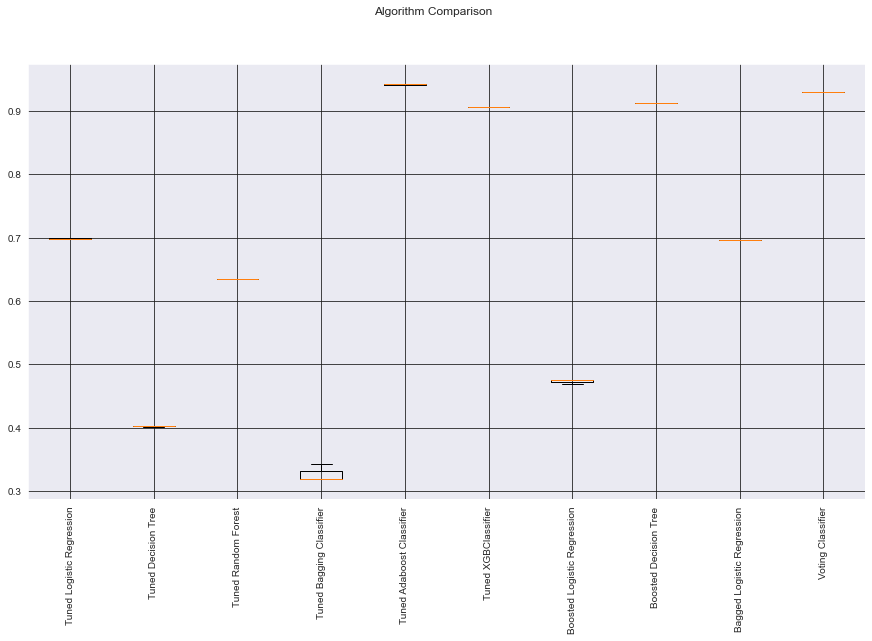

In [424]:
fig = plt.figure()
fig.suptitle('Algorithm Comparison')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
plt.xticks(rotation = '90')
plt.show()

**Interpretation:**  
- We are having less Variance and bias errors for three models - `Tuned AdaBoost Classifier`, `Tuned XGBClassifier` and `Voting Classifier`. `Tuned Adaboost` which is nothing but boosted Random forest having the least bias error and `tuned XGBClassifier` is having least variance error.
- Fundamentally, the question of `the best model` is about finding a sweet spot in the trade-off between bias and variance.
- A model is said to `underfit` the data; that is, it does not have enough model flexibility to suitably account for all the features in the data. Another way of saying this is that the model has `high bias`.
- A model is said to `overfit` the data; that is, it has so much model flexibility that the model ends up accounting for random errors as well as the underlying data distribution. Another way of saying this is that the model has `high variance`.
- So, we can say that tuned Adaboost/Random Forest is overfitting as it is having high variance than the XGBClassifier and the XGBClassifier is said to underfit as it is having hight bias error.
- Now to select the best model we have to comprimise on either the bias or variance error. There is always this bias-variance trade off. Here, we are selecting `Tuned XGBClassifier` as the best model over the `Random Forest` because overfitting can generate more false positives which is not appreciable.

## Model Evaluation

In [427]:
from sklearn.model_selection import cross_val_score

import time

def model_evaluation(clf):
    
    clf = clf
    
    t_start = time.time()
    clf = clf.fit(X_train_final, y_train)
    t_end = time.time()
    
    c_start = time.time()     
    accuracy  = cross_val_score(clf, X_train_final, y_train, cv = 3, scoring = 'accuracy')
    f1_score = cross_val_score(clf, X_train_final, y_train, cv = 3, scoring = 'f1_macro')
    c_end = time.time()    
    
    acc_mean = np.round(accuracy.mean() * 100, 2)
    f1_mean = np.round(f1_score.mean() * 100, 2)
    
    t_time = np.round((t_end - t_start) / 60, 3)
    c_time = np.round((c_end - c_start) / 60, 3)
    
    print("The accuracy score of this classifier on our training set is", acc_mean,"% and f1 score is", f1_mean,"% taking", t_time,"minutes to train and", c_time,
          "minutes to evaluate cross validation and metric scores.")

#### Random Forest Classifier

In [428]:
model_evaluation(RandomForestClassifier(n_jobs=-1, random_state = 53))

The accuracy score of this classifier on our training set is 94.28 % and f1 score is 90.42 % taking 0.81 minutes to train and 3.25 minutes to evaluate cross validation and metric scores.


#### Decision Tree Classifier

In [431]:
model_evaluation(DecisionTreeClassifier(random_state = 53))

The accuracy score of this classifier on our training set is 91.3 % and f1 score is 86.33 % taking 0.098 minutes to train and 0.369 minutes to evaluate cross validation and metric scores.


#### Logistic Regression

In [432]:
model_evaluation(LogisticRegression(random_state = 53))

The accuracy score of this classifier on our training set is 70.9 % and f1 score is 42.8 % taking 0.391 minutes to train and 1.754 minutes to evaluate cross validation and metric scores.


#### AdaBoost Classifier

In [433]:
model_evaluation(AdaBoostClassifier(random_state = 53))

The accuracy score of this classifier on our training set is 44.68 % and f1 score is 23.73 % taking 0.493 minutes to train and 2.019 minutes to evaluate cross validation and metric scores.


#### Bagging Classifier

In [434]:
model_evaluation(BaggingClassifier(random_state = 53))

The accuracy score of this classifier on our training set is 94.45 % and f1 score is 90.55 % taking 0.766 minutes to train and 2.531 minutes to evaluate cross validation and metric scores.


#### GradientBoosting Classifier

In [435]:
model_evaluation(GradientBoostingClassifier(random_state = 53))

The accuracy score of this classifier on our training set is 76.52 % and f1 score is 66.42 % taking 13.84 minutes to train and 47.359 minutes to evaluate cross validation and metric scores.


#### XGB Classifier

In [436]:
model_evaluation(XGBClassifier(random_state = 53))

[02:53:57] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[02:55:54] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[02:57:10] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[02:58:25] WARNING: C:/Users/Administrator/workspace/xgboost-win64_

#### LGBMClassifier

In [437]:
model_evaluation(LGBMClassifier(random_state = 53))

The accuracy score of this classifier on our training set is 83.6 % and f1 score is 78.82 % taking 0.128 minutes to train and 0.692 minutes to evaluate cross validation and metric scores.


#### Tuned AdaBoost

In [439]:
model_evaluation(Tuned_AdaBoost)

The accuracy score of this classifier on our training set is 94.28 % and f1 score is 90.49 % taking 1.989 minutes to train and 7.144 minutes to evaluate cross validation and metric scores.


#### Tuned XGB Classifier

In [438]:
model_evaluation(tuned_xgb)

[03:10:54] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[03:12:50] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[03:14:07] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[03:15:24] WARNING: C:/Users/Administrator/workspace/xgboost-win64_

#### Voting Classifier

In [440]:
model_evaluation(vot) 

[06:37:19] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[06:41:28] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[06:44:57] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[09:40:39] WARNING: C:/Users/Administrator/workspace/xgboost-win64_

#### ExtraTreesClassifier

In [441]:
model_evaluation(ExtraTreesClassifier(random_state = 53))

The accuracy score of this classifier on our training set is 94.04 % and f1 score is 90.47 % taking 1.085 minutes to train and 18.137 minutes to evaluate cross validation and metric scores.


## Conclusion

Coming back from where we have started, can we predict which `Forest Cover Type` it is, given `elevation, hydrologic, sunlight and wilderness area` data? **Yes we can! Tree models are your best friends in predicting forest cover types but we can also tell that XGBClassifier has worked well because it has addressed overfitting. So, we shall have tuned_XGB as our benchmark model.**

### Benchmark model: Tuned XGBClassifier